#ML Intro


Si divide in Supervised(label) & Unsupervised.

[IBM Machine Learning ](https://www.ibm.com/it-it/cloud/learn/machine-learning#toc-metodi-di--OTpgINJi)

[Amazon Machine Learning](https://docs.aws.amazon.com/it_it/machine-learning/latest/dg/model-fit-underfitting-vs-overfitting.html)

[Google ML](https://developers.google.com/machine-learning/crash-course)

[Matplotlib](https://github.com/matplotlib)
[Data Science Handbook Python](https://github.com/jakevdp/PythonDataScienceHandbook)

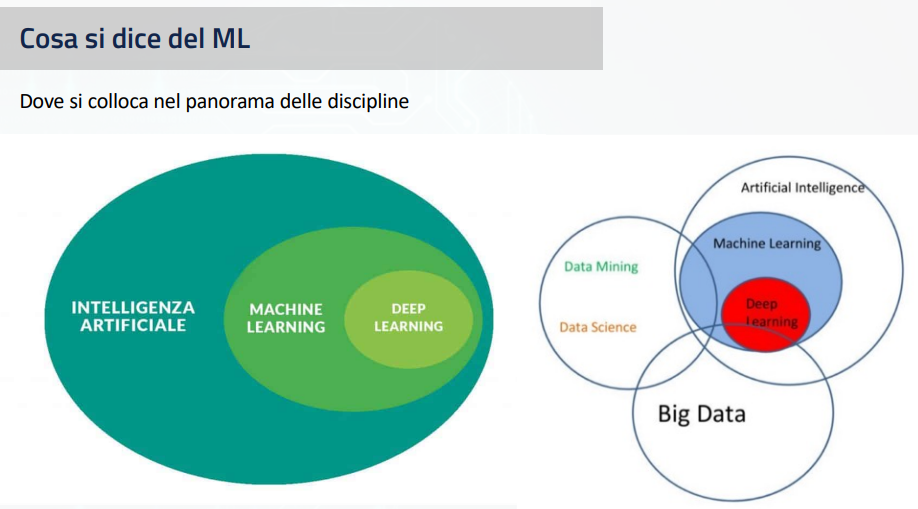

##Sistemi Top-Down e Bottom-Up

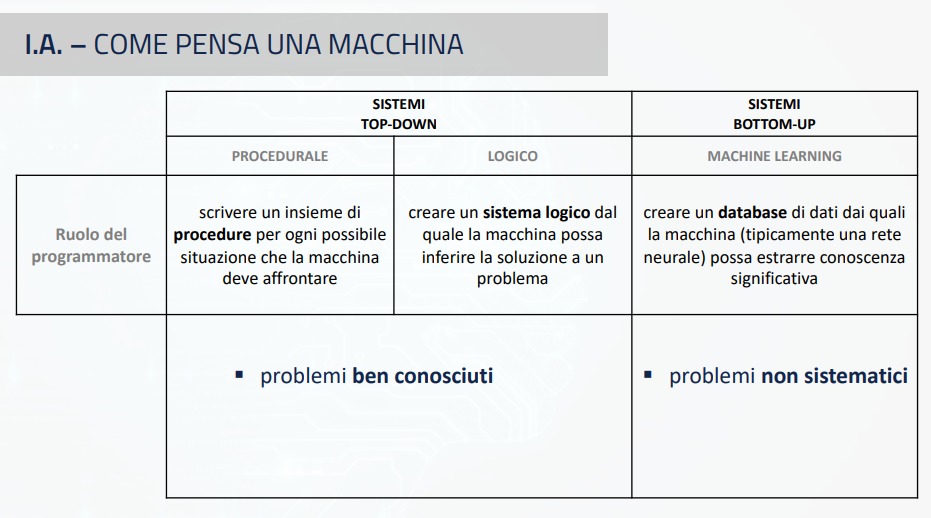

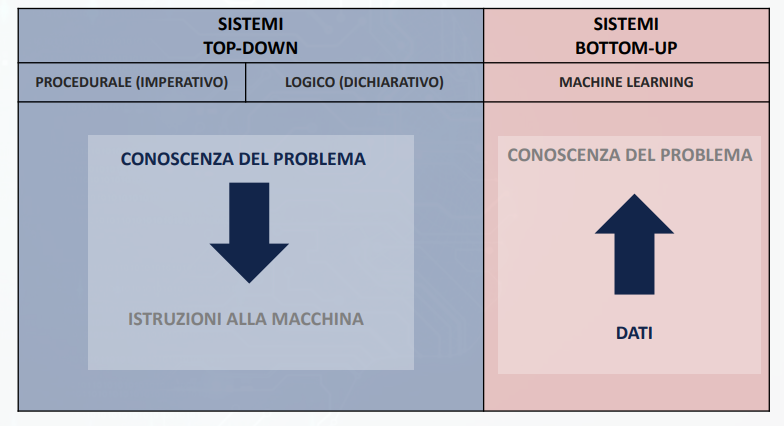

#ML Flow (ML Supervisionato)

**0.** Caricamento del dataset e definizione del tipo di problema (Classification o Regression?). Qual è il target?\
**1.** EDA ('Hue')\
**2.** Cleaning + features selection + label encoder\
**3.** X = feature\
   y = target
   \
Train Test -- Lo faccio su questo df perché ho il target per avere una validazione oggettiva del modello (non avrei delle label per avere una valut. oggettiva).\
Il modo in cui il modello ha possibilità di imparare è processare i dati, per quello è meglio avere un 75% di train model.\
Standardizzazione/Normalizzazione delle features (se i dati tra le diverse features hanno dei numeri molto\ diversi, e l'errore aumenta in maniera esponenziale, se vogliamo usare dei modelli lineari è sempre meglio standardizzare i dati, se invece utilizziamo metodi diversi, allora si può skippare).

**4.** Selezione dell'algoritmo di classificazione/regressione:

>Algoritmi di regression: regressione lineare, polim., random tree regressor, decision tree\
>Algoritmi di classificazione: random forest, logistic regression
ML map su scikit learn

**5.** Fit (model.fit)\
**6.** Evaluation (Ci da' la percentuale di misclassification sul totale dei casi)

##Caricamento del dataset e definizione del problema

Prima di tutto importazione delle librerie che utilizzerò, ad esempio:


```
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score #E' la nuova metrica
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

```



###Caricamento del dataset

####Da link



Si utilizza !wget e poi il link del dataset
```
!wget  https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/audit.csv

```



In questo modo avrò il dataset nel mio notebook e proseguirò a caricarlo!

####Da file path




```
path = 'percorsorelativodelfile'


```

E poi proseguirò a caricarlo inserendo path come parametro.


####Da file nel notebook




```
df = pd.read_csv('audit.csv')

```



###Classificazione o regressione?

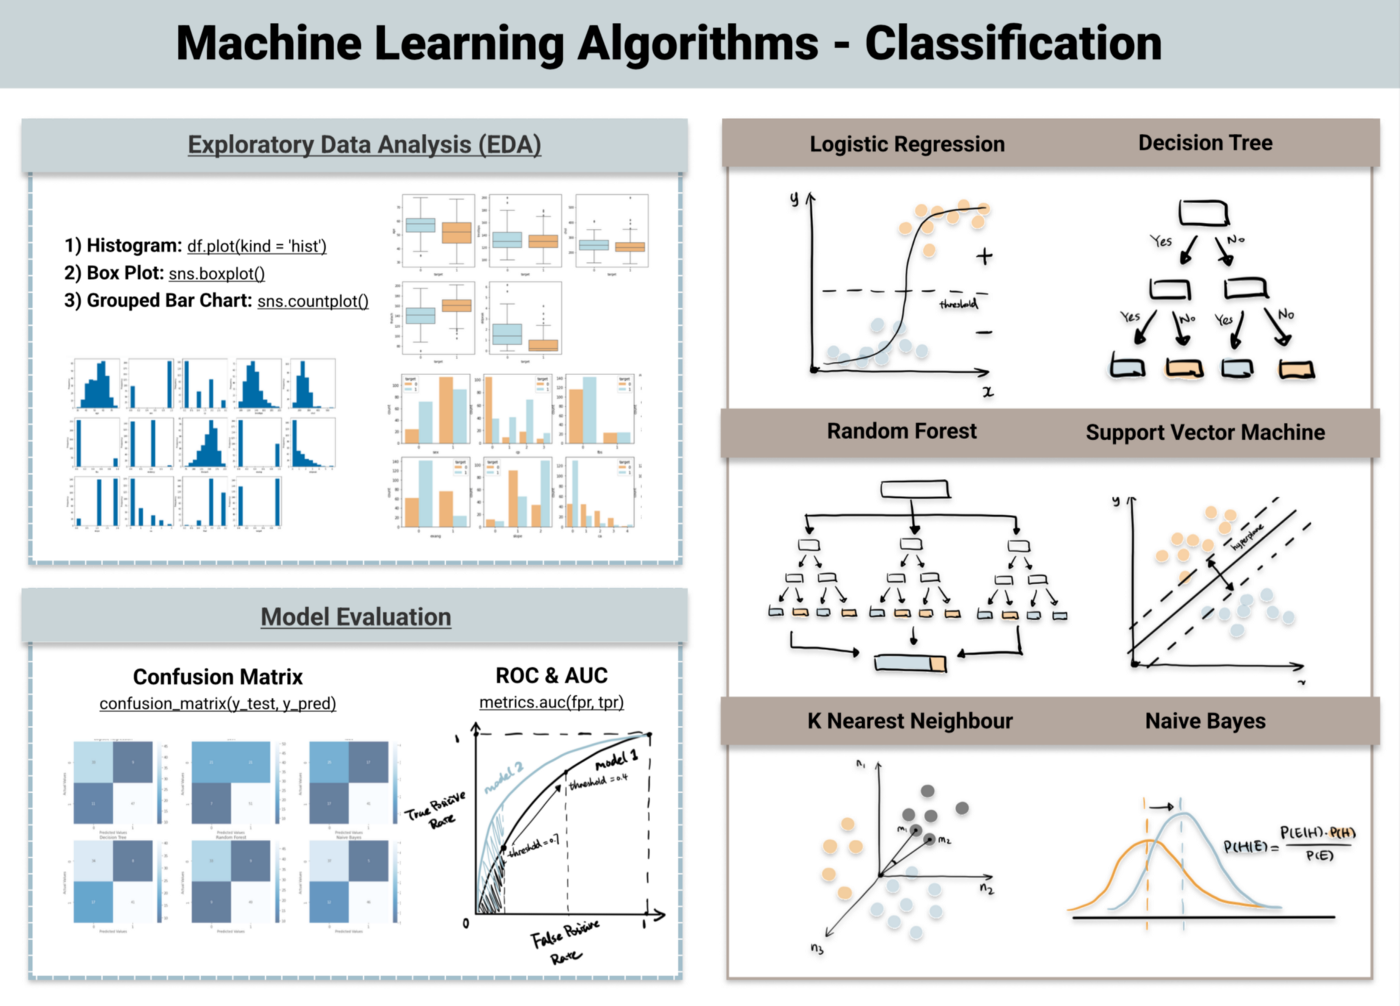

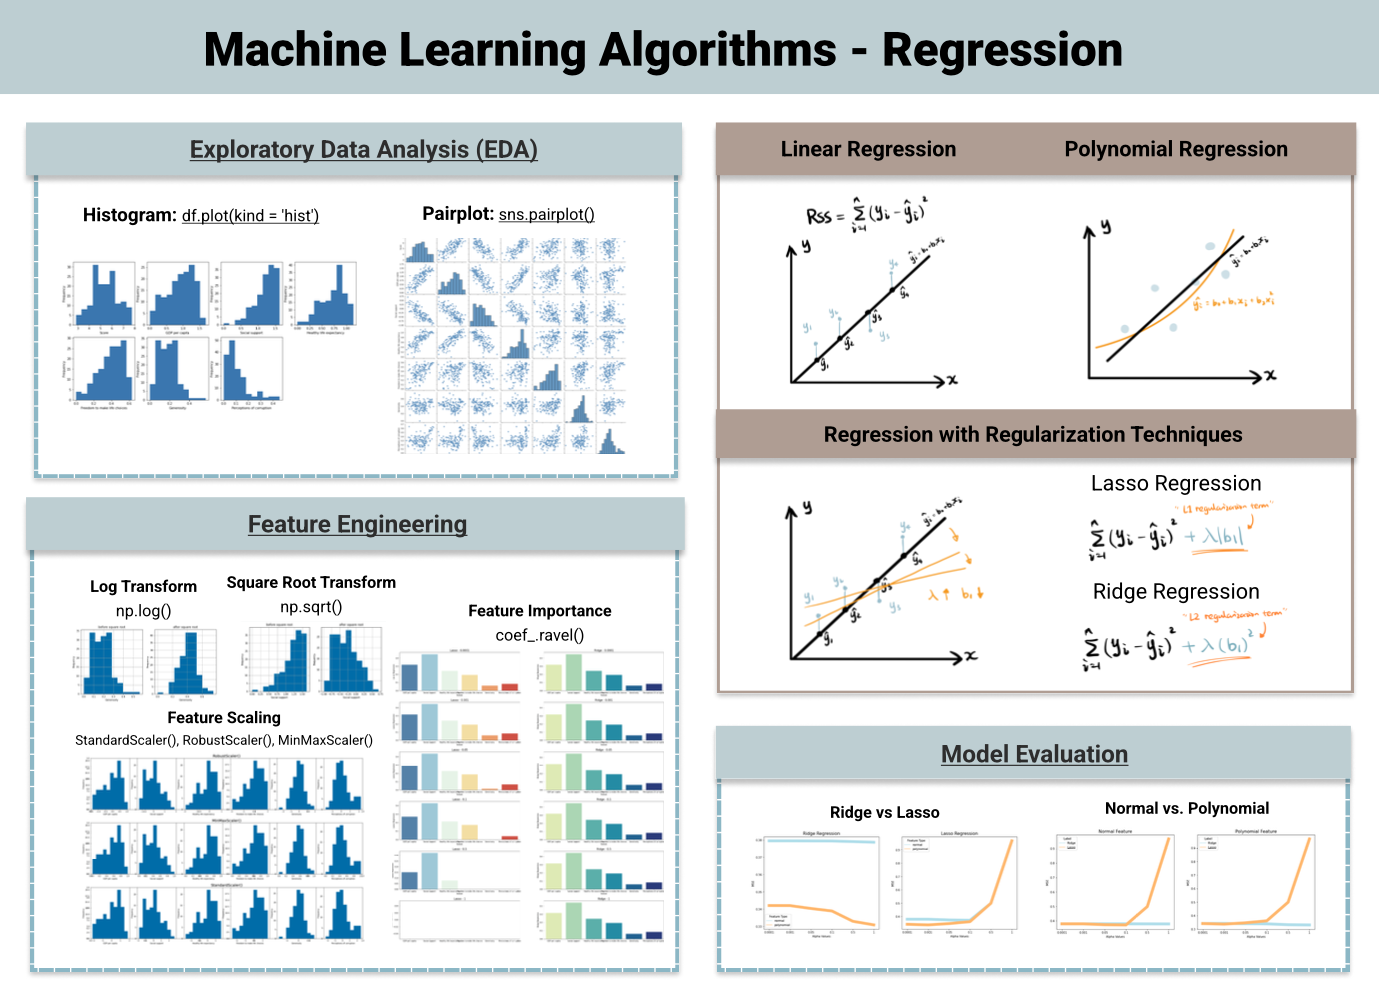

Devo definire il mio target, che potrà essere:
*  Un problema di classificazione binaria oppure multi classe
*  Un problema di regressione

####La classificazione binaria

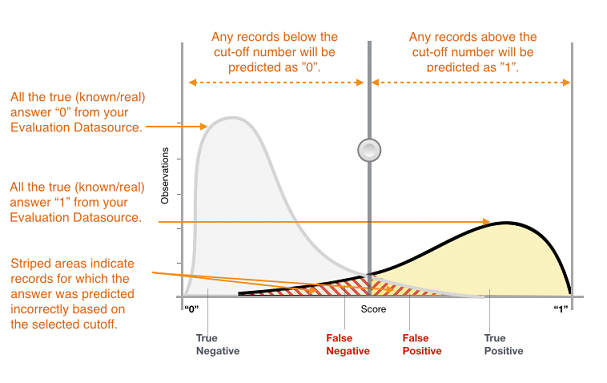

L'output effettivo di molti algoritmi di classificazione binaria è un punteggio di previsione. Il punteggio indica la certezza del sistema che una data osservazione appartenga alla classe positiva. Per decidere se l'osservazione debba essere classificata come positiva o negativa, in quanto consumatore di questo punteggio, si interpreterà il punteggio scegliendo una soglia di classificazione (interruzione) e si confronterà il punteggio con tale soglia. Qualsiasi osservazione con punteggi superiori alla soglia viene quindi prevista come classe positiva mentre i punteggi inferiori alla soglia vengono previsti come classe negativa.



Le previsioni ora rientrano in quattro gruppi basati sulla risposta effettiva nota e sulla risposta prevista: previsioni positive esatte (true positive), previsioni negative esatte (true negative), previsioni positive errate (false positive) e previsioni negative errate (false negative).

Il parametro di accuratezza della classificazione binaria quantifica i due tipi di previsioni corrette e i due tipi di errori. I parametri più comuni sono accuratezza (ACC), precisione, recall, percentuale di falsi positivi, misura F1. Ogni parametro misura un aspetto diverso del modello predittivo. L'accuratezza (ACC) misura la percentuale di previsioni corrette. La precisione misura la percentuale di positivi effettivi tra gli esempi previsti come positivi. Il recall misura quanti positivi effettivi sono stati previsti come positivi. La misura F1 è la media armonica tra precisione e recall.

L'AUC è un tipo diverso di parametro. Misura la capacità del modello ML di prevedere un punteggio più elevato per gli esempi positivi rispetto agli esempi negativi. Poiché l'AUC è indipendente dalla soglia selezionata, è possibile farsi un'idea delle prestazioni in termini di previsioni del modello attraverso il parametro AUC, senza selezionare una soglia.

A seconda del problema aziendale, si potrebbe essere più interessati a un modello che esegua correttamente uno specifico sottoinsieme di questi parametri. Ad esempio, due applicazioni aziendali potrebbe avere requisiti molto diversi per i loro modelli ML:

Un'applicazione potrebbe essere molto sicura che le previsioni positive siano effettivamente positive (elevata precisione) e potersi permettere di classificare erroneamente alcuni esempi positivi come negativi (recall moderato).

Un'altra applicazione potrebbe dover prevedere correttamente tutti gli esempi positivi possibile (recall elevato) e accetterà l'errata classificazione di alcuni esempi negativi come positivi (precisione moderata).

In Amazon ML, le osservazioni ottengono un punteggio previsto nell'intervallo [0,1]. La soglia del punteggio per prendere la decisione di classificare gli esempi come 0 o 1 è impostata per impostazione predefinita su 0,5. Amazon ML consente di esaminare le implicazioni legate alla scelta di soglie di punteggio differenti e consente di scegliere una soglia adeguata in grado di soddisfare le esigenze aziendali.

####La classificazione multiclasse

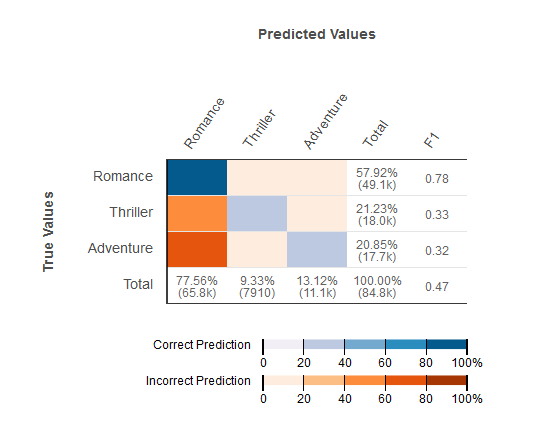

È utile esaminare la matrice di confusione per i problemi multiclasse. La matrice di confusione è una tabella che mostra ogni classe dei dati di valutazione e il numero o la percentuale di previsioni esatte e di previsioni errate.




Metriche:
- Confusion Matrix
- F1
- Se è binaria ROC & AUC

####Regressione

Che cos'è la regressione? 



---

La regressione è una semplificazione di un problema: ho una distribuzione di punti e cerco di descriverla con la retta.

---

\
Date due o più variabili, cerco con una funzione mono o multi dimensionale di descrivere la distribuzione dei dati.

---

\
Il modello genera in maniera random una retta, e poi fa la "calibrazione", **minimizza le distanze dei punti dalla retta**.
\
Crea n fasci di rette e fa il rank di quale retta è migliore.
\
Però essendo lineare non riesce a descrivere troppo bene se ho ad esempio i punti "a parabola".
\
Funziona bene quando i data point hanno distribuzioni lineari. Quando ho delle distribuzioni quadratiche molto complesse la regressione non ha buone performance.
\
Il valore è che una volta che abbiamo la retta possiamo implementarla anche su Excel.

Per le attività di regressione, i parametri abituali dell'accuratezza sono la radice dell'errore quadratico medio (RMSE - Root Mean Square Error) e l'errore assoluto medio percentuale (MAPE - Mean Absolute Percentage Error). Questi parametri misurano la distanza tra il target numerico previsto e la risposta numerica effettiva (dati acquisiti sul campo).



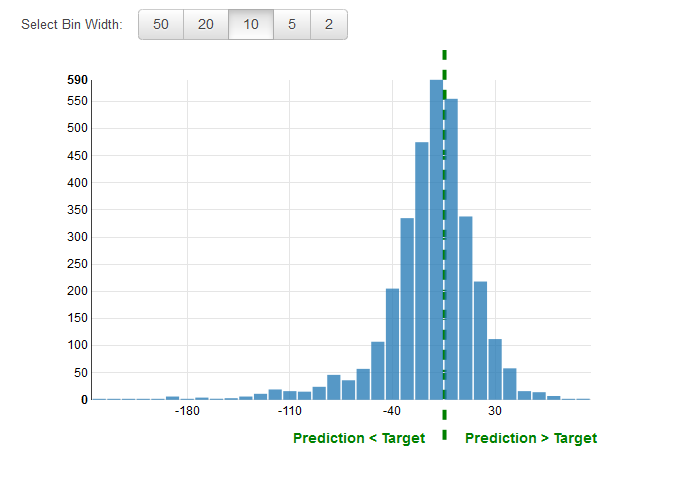

Metriche:
- r2
- MAE
- RMSE

#####Time Series

Le time series sono leggermente differenti dalla regressione, perché abbiamo il vincolo delle sequenza.

La data è l'index, non è né feature, né target. 
Il dato è sia target che features, dipende da quando voglio fare il taglio test/train. 


---

Tutto ciò che accade prima del taglio è features, tutto ciò che accade dopo è target.


**Quando facciamo lo slicing lo facciamo a mano!**

Si utilizza più il MAPE rispetto al MAE

##EDA

La dimensionalità di un dataset è il numero di features che usiamo

L'analisi esplorativa dei dati (o EDA, exploratory data analysis) viene utilizzata dai data scientist per analizzare i dataset e riepilogarne le caratteristiche principali, spesso adottando dei metodi di visualizzazione dei dati. Aiuta a determinare il modo ottimale per manipolare le origini dati per ottenere le risposte di cui hai bisogno, consentendo ai data scientist di rilevare i modelli, individuare le anomalie, testare un'ipotesi e verificare delle supposizioni più facilmente.\
Lo scopo principale dell'analisi esplorativa dei dati è quello di aiutare a guardare ai dati prima di fare qualsiasi supposizione. Può aiutare a identificare gli errori ovvi e a comprendere meglio i modelli all'interno dei dati, rilevare i valori e gli eventi anomali e a trovare interessanti relazioni tra le variabili.



Esistono quattro tipi primari di analisi esplorativa dei dati:

1. Univariata non grafica. Questa è la forma più semplice di analisi dei dati, in cui i dati analizzati consistono in una sola variabile. Poiché si tratta di una singola variabile, non ha a che fare con cause e relazioni. Lo scopo principale dell'analisi univariata è quello di descrivere i dati e trovare i modelli che esistono al loro interno.
2. Univariata grafica. I metodi non grafici non forniscono un quadro completo dei dati. Sono pertanto necessari i metodi grafici. I tipi comuni di grafica univariata includono:
- Grafici a stelo e foglie, che mostrano tutti i valori di dati e la forma della distribuzione.
- Istogrammi, una grafico a barre in cui ciascuna barra rappresenta la frequenza (conteggio) o la proporzione (conteggio/conteggio totale) di casi per un intervallo di valori.
- Box-plot, che graficamente rappresentano il riepilogo di cinque numeri di minimo, primo quartile, medio, terzo quartile e massimo.
- Multivariata non grafica: i dati multivariati derivano da più di una variabile. Le tecniche di analisi esplorativa dei dati multivariata non grafica di norma mostrano la relazione tra due o più variabili dei dati mediante tabulazione incrociata o statistiche.
3. Grafica multivariata: i dati multivariati utilizzano i grafici per visualizzare le relazioni tra due o più dataset. Il grafico più utilizzato è un grafico a barre raggruppate o un grafico a barre dove ciascun gruppo rappresenta un livello di una delle variabili e ciascuna barra all'interno del gruppo rappresenta i livelli dell'altra variabile.
Altri tipi comuni di grafici multivariati includono:

- Grafico a dispersione, che viene utilizzato per tracciare i punti dati su un asse orizzontale e uno verticale per mostrare in che misura una variabile è influenzata da un'altra.
- Grafico multivariato, che è una rappresentazione grafica delle relazioni tra i fattori e una risposta.
- Grafico di esecuzione, che è un grafico a linee di dati tracciati nel tempo.
- Grafico a bolle, che è una visualizzazione dei dati che visualizza più cerchi (bolle) in un grafico bidimensionale.
- Mappa termica, che è una rappresentazione grafica dei dati in cui i valori sono raffigurati mediante i colori.

###In caso di classificazione, controlliamo se il problema è sbilanciato

Per vedere quante classi ho, posso utilizzare il metodo unique nella colonna delle classi/target:\
`pd.unique(df['nomecolonna'])`

Per vedere se il problema è bilanciato:

```
df.groupby('class').count() 
```



Oppure posso usare:


```
df['Target'].value_counts()
```



###Seaborn per l'EDA


Color palettes:
```
‘Accent’, ‘Accent_r’, ‘Blues’, ‘Blues_r’, ‘BrBG’, ‘BrBG_r’, ‘BuGn’, ‘BuGn_r’, ‘BuPu’, ‘BuPu_r’, ‘CMRmap’, ‘CMRmap_r’, ‘Dark2’, ‘Dark2_r’, ‘GnBu’, ‘GnBu_r’,  ‘Greens’, ‘Greens_r’, ‘Greys’, ‘Greys_r’, ‘OrRd’, ‘OrRd_r’, ‘Oranges’, ‘Oranges_r’,  ‘PRGn’, ‘PRGn_r’, ‘Paired’, ‘Paired_r’, ‘Pastel1’, ‘Pastel1_r’, ‘Pastel2’,  ‘Pastel2_r’, ‘PiYG’, ‘PiYG_r’, ‘PuBu’, ‘PuBuGn’, ‘PuBuGn_r’, ‘PuBu_r’, ‘PuOr’, ‘PuOr_r’, ‘PuRd’, ‘PuRd_r’, ‘Purples’, ‘Purples_r’, ‘RdBu’, ‘RdBu_r’, ‘RdGy’, ‘RdGy_r’, ‘RdPu’, ‘RdPu_r’, ‘RdYlBu’, ‘RdYlBu_r’, ‘RdYlGn’, ‘RdYlGn_r’, ‘Reds’, ‘Reds_r’, ‘Set1’, ‘Set1_r’, ‘Set2’, ‘Set2_r’, ‘Set3’, ‘Set3_r’, ‘Spectral’, ‘Spectral_r’, ‘Wistia’, ‘Wistia_r’, ‘YlGn’, ‘YlGnBu’, ‘YlGnBu_r’, ‘YlGn_r’, ‘YlOrBr’, ‘YlOrBr_r’, ‘YlOrRd’, ‘YlOrRd_r’, ‘afmhot’, ‘afmhot_r’, ‘autumn’, ‘autumn_r’, ‘binary’, ‘binary_r’,  ‘bone’, ‘bone_r’, ‘brg’, ‘brg_r’, ‘bwr’, ‘bwr_r’, ‘cividis’, ‘cividis_r’, ‘cool’, ‘cool_r’,  ‘coolwarm’, ‘coolwarm_r’, ‘copper’, ‘copper_r’, ‘cubehelix’, ‘cubehelix_r’, ‘flag’, ‘flag_r’,  ‘gist_earth’, ‘gist_earth_r’, ‘gist_gray’, ‘gist_gray_r’, ‘gist_heat’, ‘gist_heat_r’, ‘gist_ncar’,  ‘gist_ncar_r’, ‘gist_rainbow’, ‘gist_rainbow_r’, ‘gist_stern’, ‘gist_stern_r’, ‘gist_yarg’,  ‘gist_yarg_r’, ‘gnuplot’, ‘gnuplot2’, ‘gnuplot2_r’, ‘gnuplot_r’, ‘gray’, ‘gray_r’, ‘hot’, ‘hot_r’,  ‘hsv’, ‘hsv_r’, ‘icefire’, ‘icefire_r’, ‘inferno’, ‘inferno_r’, ‘jet’, ‘jet_r’, ‘magma’, ‘magma_r’,  ‘mako’, ‘mako_r’, ‘nipy_spectral’, ‘nipy_spectral_r’, ‘ocean’, ‘ocean_r’, ‘pink’, ‘pink_r’,  ‘plasma’, ‘plasma_r’, ‘prism’, ‘prism_r’, ‘rainbow’, ‘rainbow_r’, ‘rocket’, ‘rocket_r’,  ‘seismic’, ‘seismic_r’, ‘spring’, ‘spring_r’, ‘summer’, ‘summer_r’, ‘tab10’, ‘tab10_r’,’tab20′, ‘tab20_r’, ‘tab20b’, ‘tab20b_r’, ‘tab20c’, ‘tab20c_r’, ‘terrain’, ‘terrain_r’, ‘turbo’,  ‘turbo_r’, ‘twilight’, ‘twilight_r’, ‘twilight_shifted’, ‘twilight_shifted_r’, ‘viridis’,  ‘viridis_r’, ‘vlag’, ‘vlag_r’, ‘winter’, ‘winter_r’

```



```
import seaborn as sns

sns.pairplot(df)

```
Questa matrice di plot è simmetrica, se guardo sotto ho la stessa rappresentazione al contrario di sopra, nella diagonale principale ho la frequenza ovvero la distribuzione reale di ogni grandezza ovvero delle features, ci fa vedere la correlazione delle variabili

####Alcuni plot

#####Plot per aggregazione (pivot)

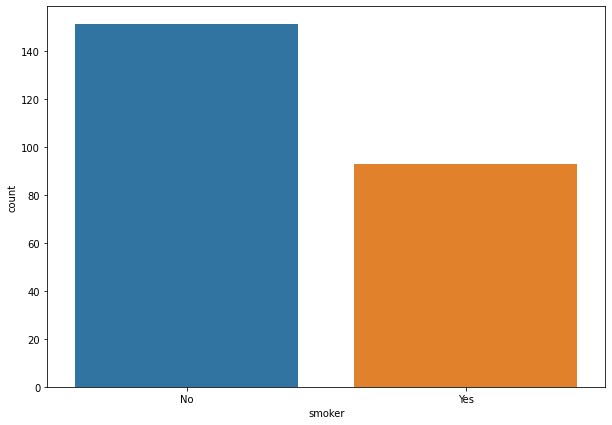

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x='smoker', data=df);

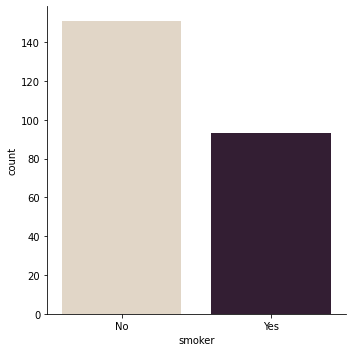

In [ ]:
sns.catplot(x="smoker", kind="count", palette="ch:.25", data=df);


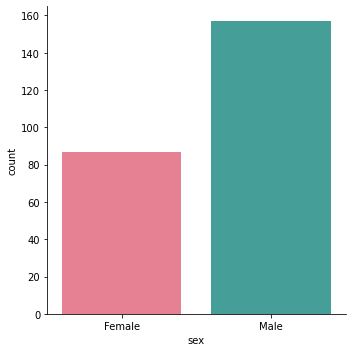

In [ ]:
sns.catplot(x="sex", kind="count", palette="husl", data=df);


<Figure size 720x504 with 0 Axes>

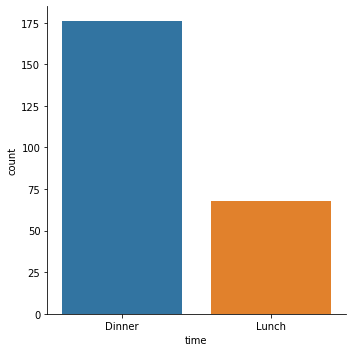

In [ ]:
plt.figure(figsize=(10,7))
sns.catplot(x='time', kind='count', data=df)

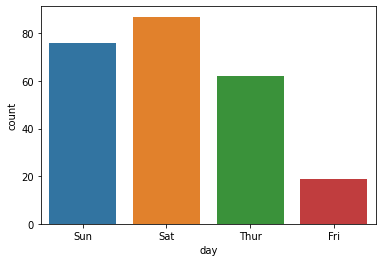

In [ ]:
sns.countplot(x='day', data=df)

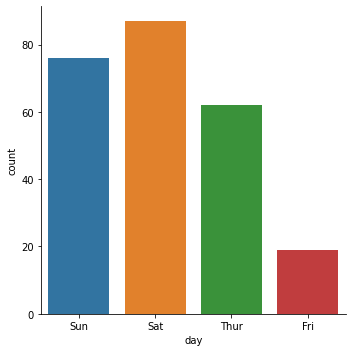

In [ ]:
sns.catplot(x='day', kind='count', data=df)

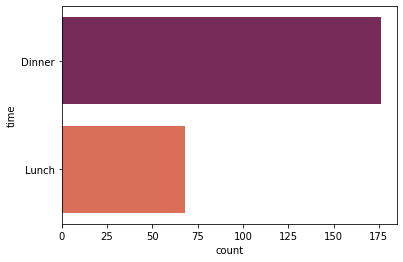

In [ ]:
sns.countplot(y="time", data=df, palette="rocket")
#scrivendo y il grafico si ruota di 90 gradi

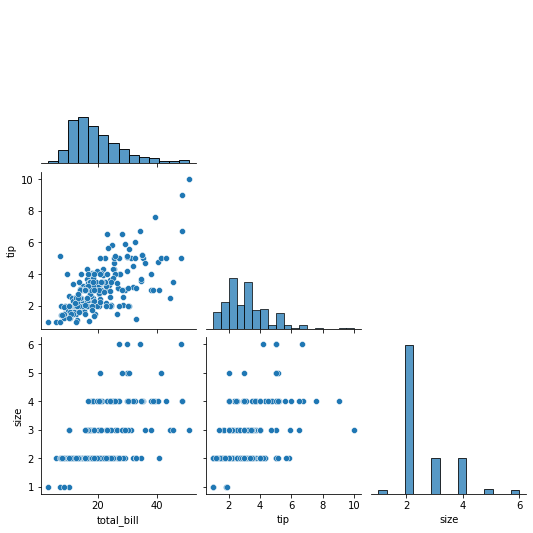

In [ ]:
sns.pairplot(data=df, corner=True, diag_kind="hist") #corner cancella l'informazione rindondante

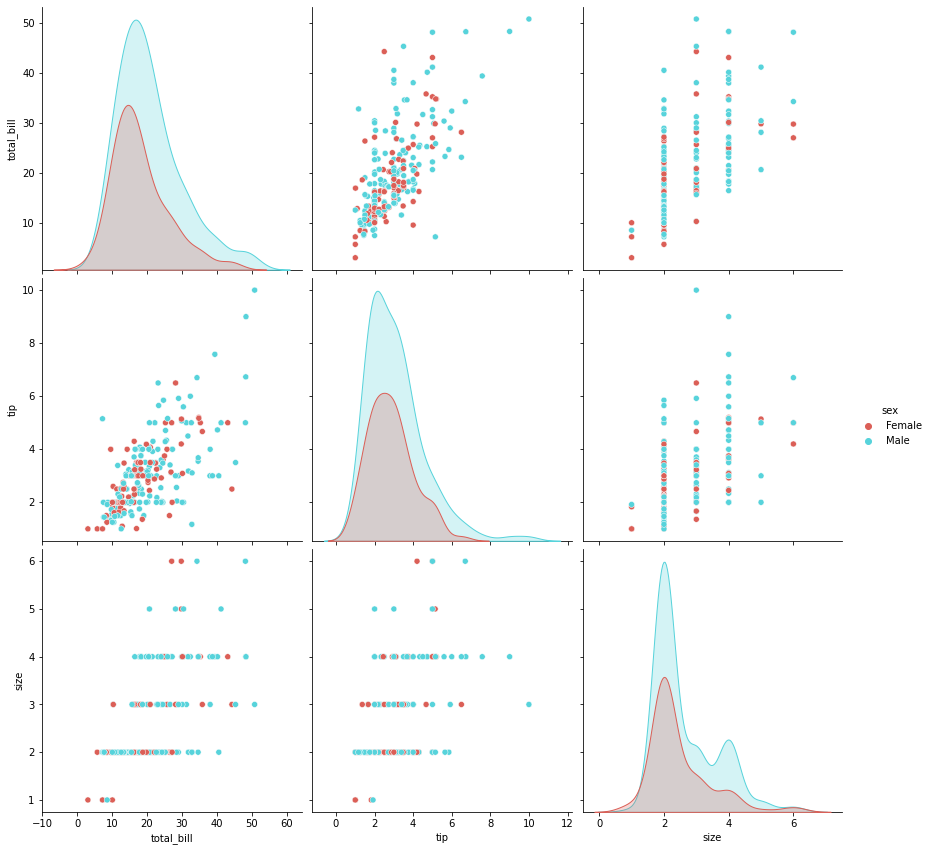

In [ ]:
sns.pairplot(df, hue='sex', palette='hls', height=4)

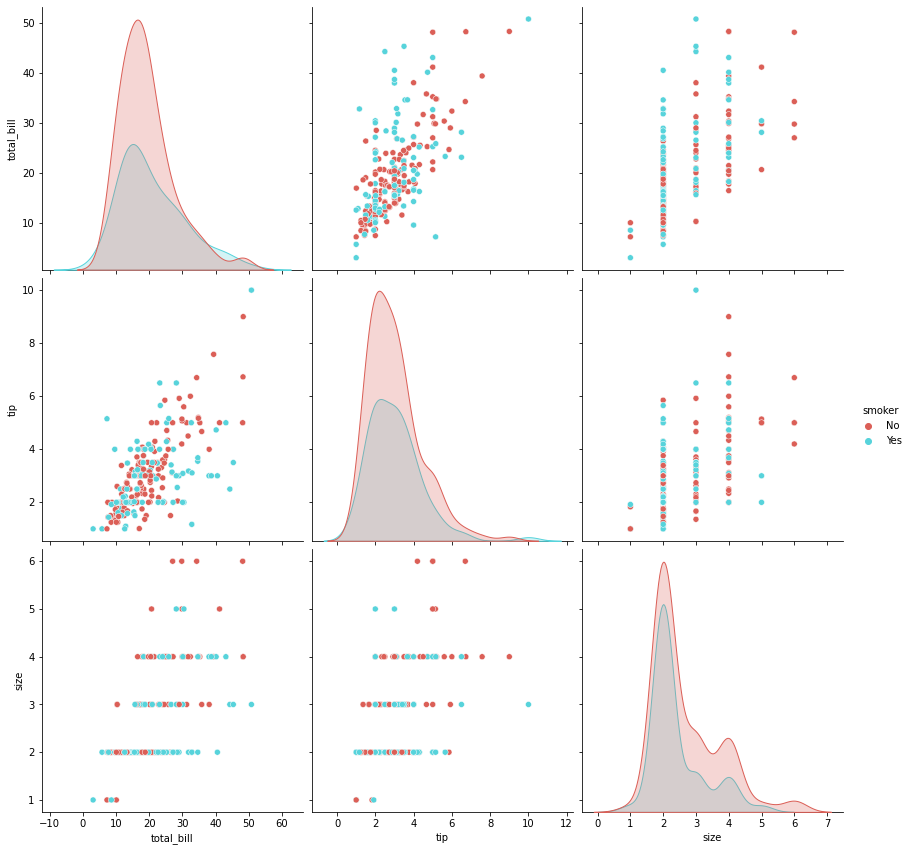

In [ ]:
sns.pairplot(df, hue='smoker', palette='hls', height=4)

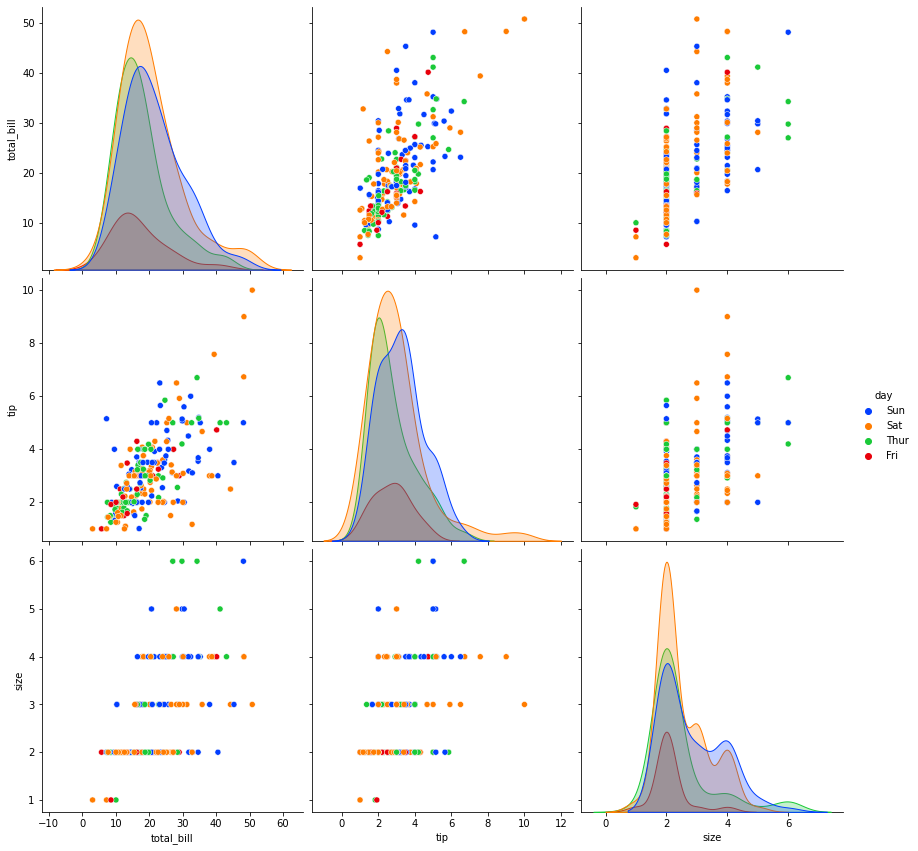

In [ ]:
sns.pairplot(df, hue='day', palette='bright',height=4);

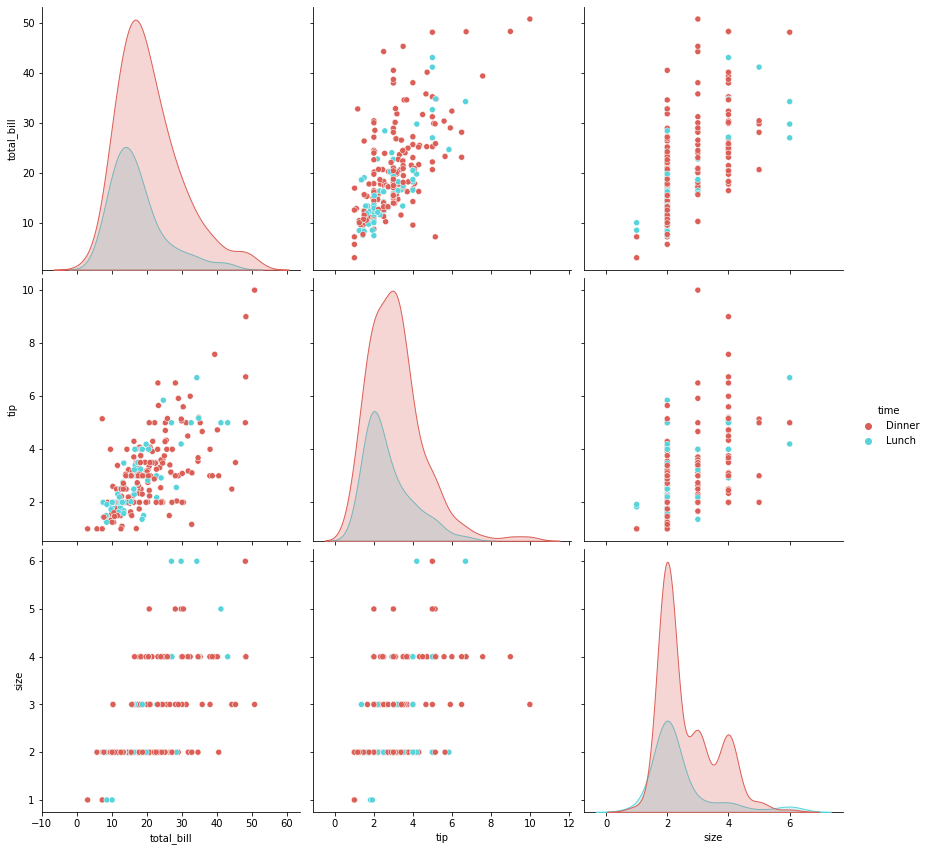

In [ ]:
sns.pairplot(df, hue='time', palette='hls', height=4);

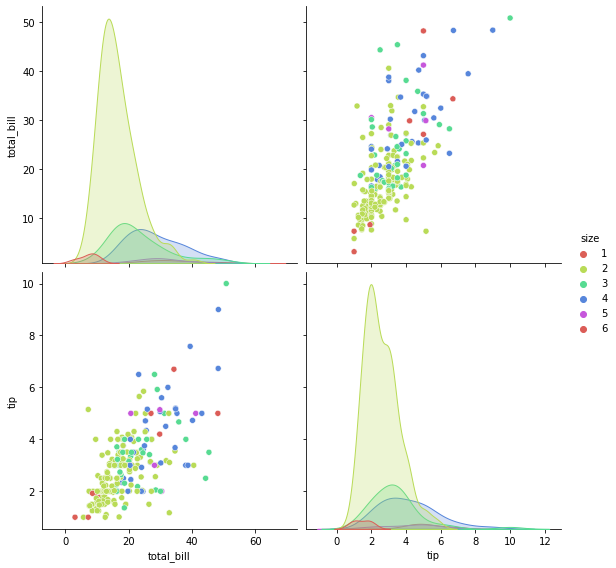

In [ ]:
sns.pairplot(df, hue="size", x_vars=["total_bill", "tip"], y_vars=["total_bill", "tip"], palette='hls', height=4)

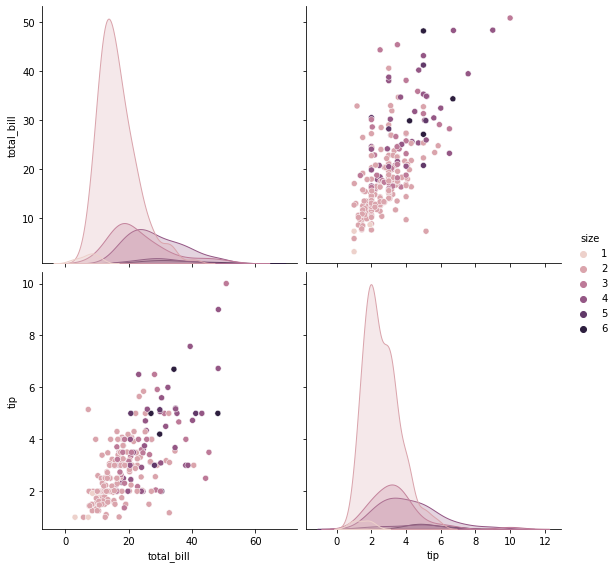

In [ ]:
sns.pairplot(df, hue="size", height=4)

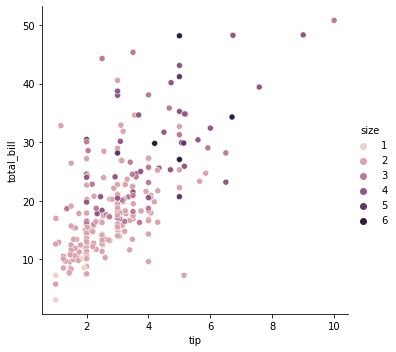

In [ ]:
sns.relplot(data=df, x="tip", y="total_bill", hue="size")




---

non corretto

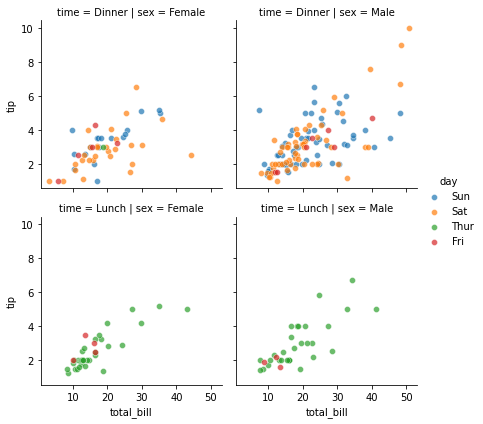

In [ ]:
g = sns.FacetGrid(df, col="sex", row="time", hue="day")
g1 = g.map(sns.scatterplot, "total_bill", "tip", alpha=.7)
g1.add_legend()



---

corretto

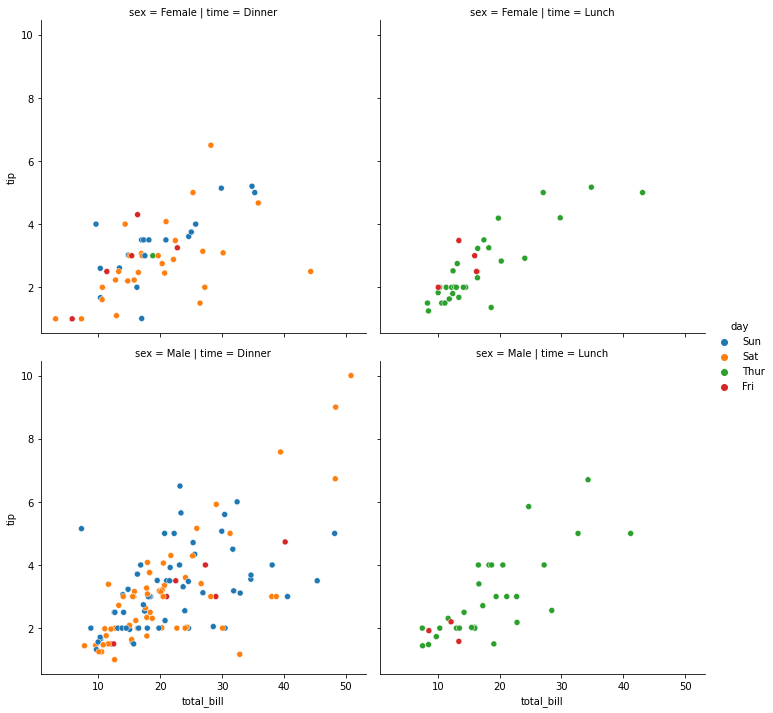

In [ ]:
sns.relplot(data=df, x="total_bill", y="tip", hue="day", col="time", row="sex")


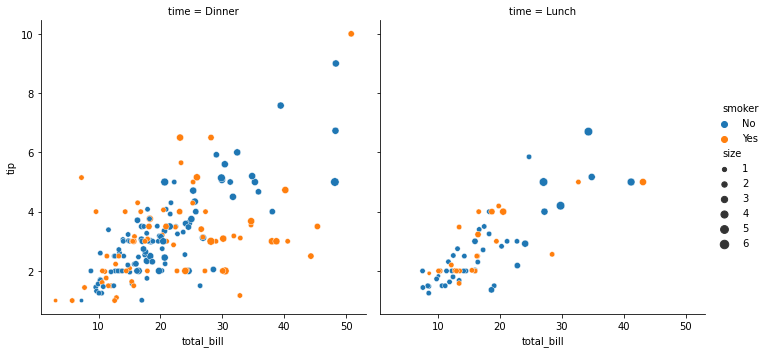

In [ ]:
sns.relplot(data=df, x="total_bill", y="tip", hue="smoker", col="time", size="size")


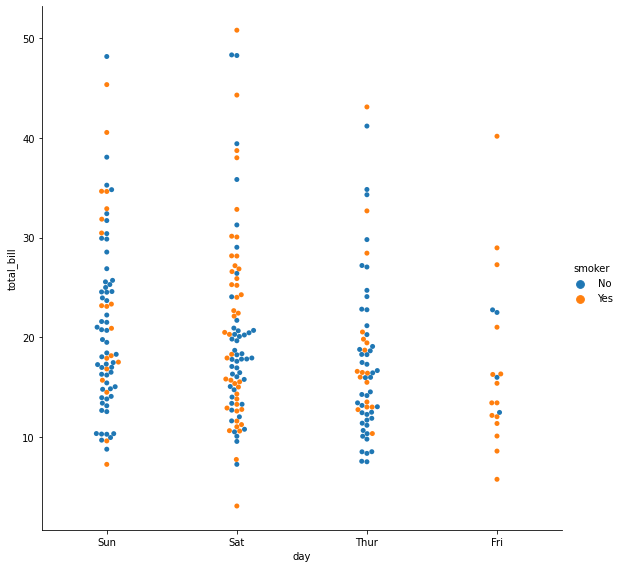

In [ ]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="swarm", data=df, height=8, aspect=1);

####correlazioni scatteplot/regr

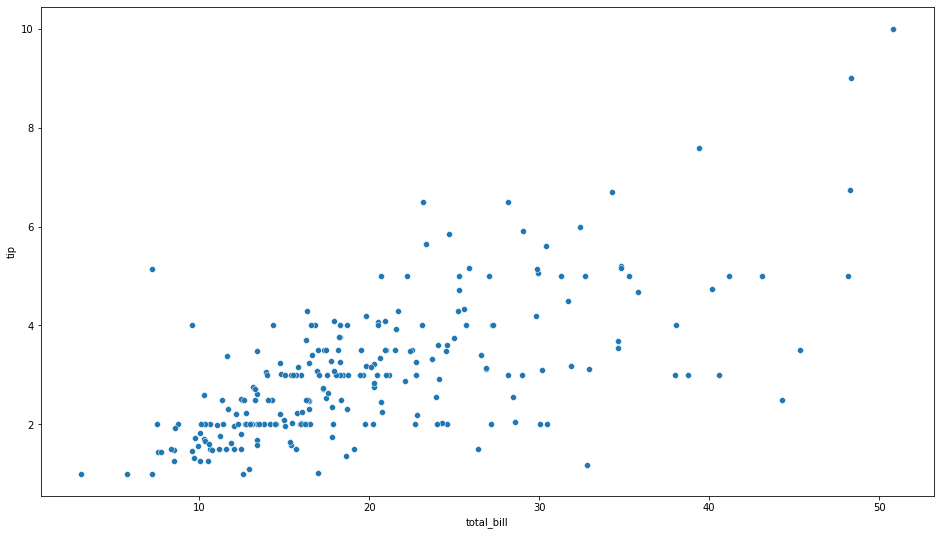

In [ ]:
plt.figure(figsize=(16,9))
sns.scatterplot(x="total_bill", y="tip", data=df)

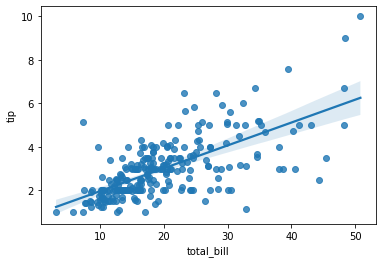

In [ ]:
sns.regplot(x="total_bill", y="tip",data=df)

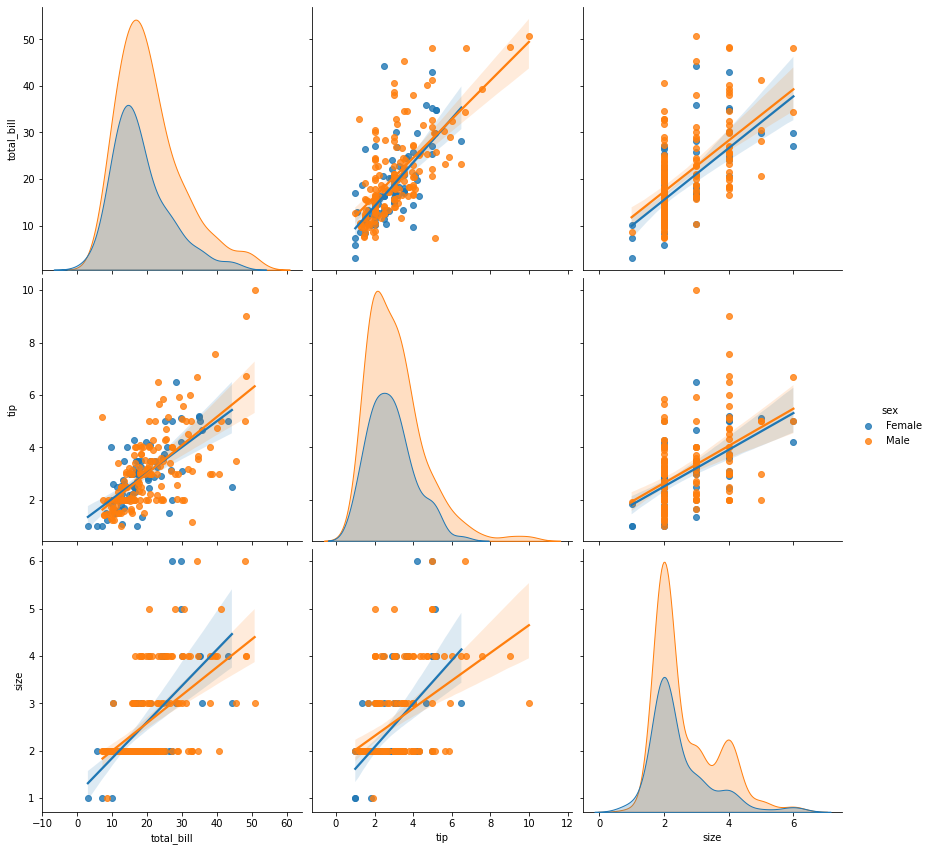

In [ ]:
sns.pairplot(data=df, kind="reg",height=4, hue="sex")

####Continuo Eda con seaborn

`sns.pairplot(df, hue='class')`

riusciamo a vedere anche che il problema è bilanciato grazie all'area occupata 

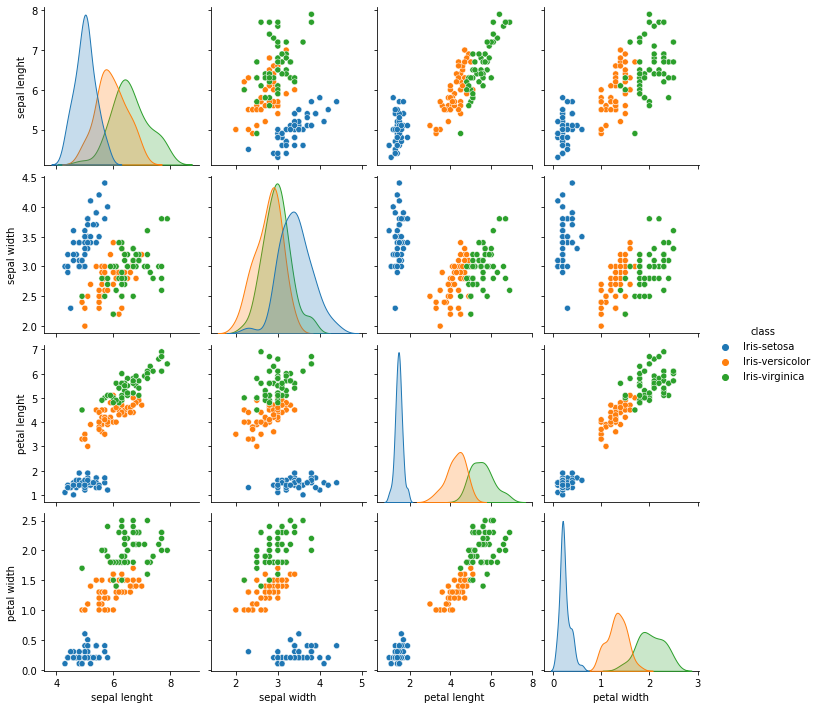

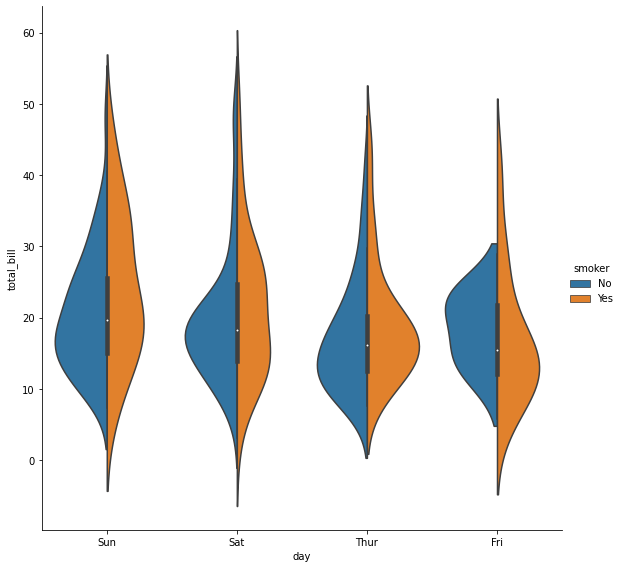

In [ ]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="violin", split=True, data=df, height=8, aspect=1);



---



---



`df.boxplot(figsize=(18,10))`\
per vedere la numerosità degli outliers

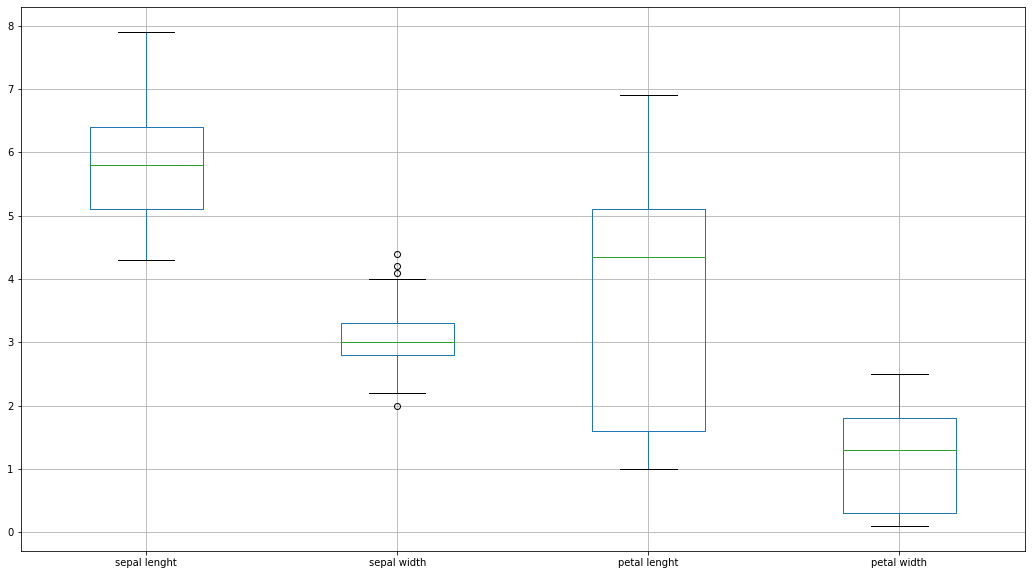

**Outlier**: tutti i data point che sono più distanti di 3 punti dalla deviazione standard. In verde vedo la mediana.



---



---



sns.violinplot(x='class', y='sepal lenght', data=df)

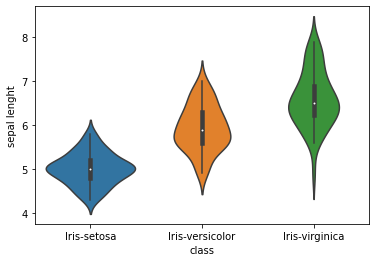



---



---



```
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.violinplot(x='class', y='sepal lenght', data=df)
plt.subplot(2,2,2)
sns.violinplot(x='class', y='petal lenght', data=df)
plt.subplot(2,2,3)
sns.violinplot(x='class', y='sepal width', data=df)
plt.subplot(2,2,4)
sns.violinplot(x='class', y='petal width', data=df)

```

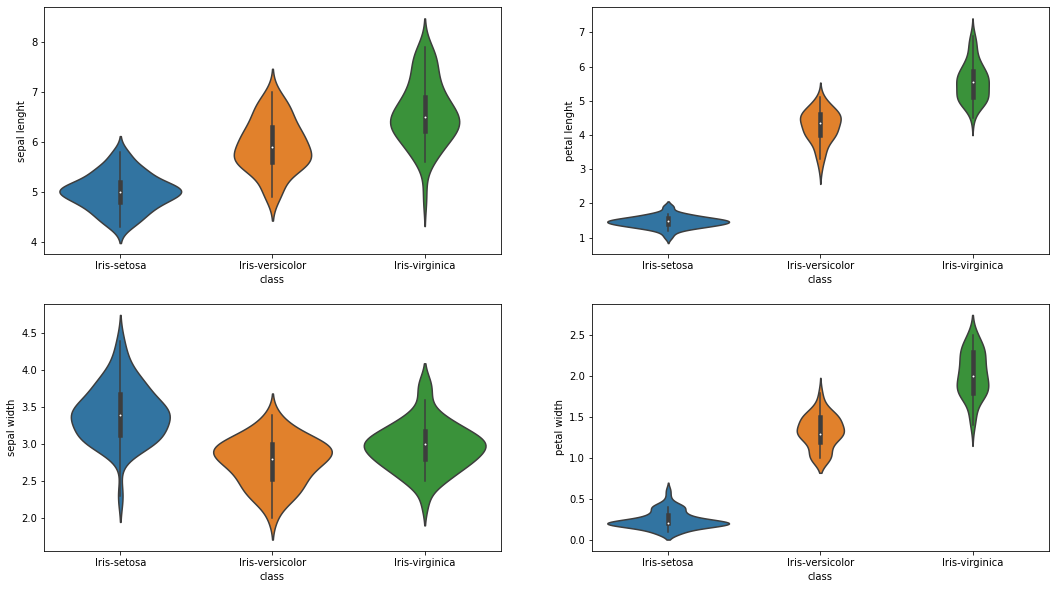



---



---



`sns.jointplot(x='sepal lenght', y='sepal width',data = df) ` \
se volessi  fare uno studio su un incrocio particolare

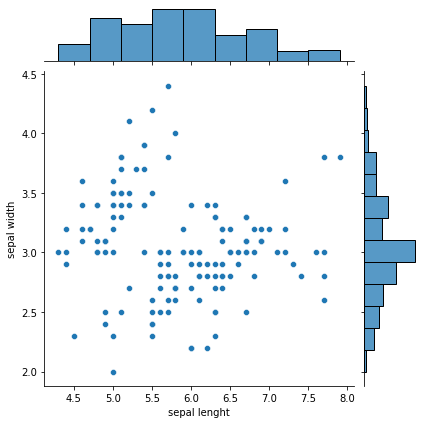



---



---



`sns.lmplot(x='sepal lenght', y='sepal width',hue = 'class', data = df, fit_reg=False); `

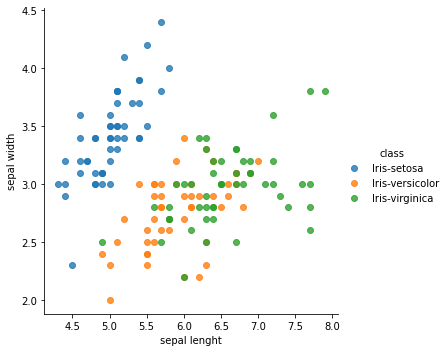



---

Se voglio vedere tramite parallel ogni riga del df:



`from pandas.plotting import parallel_coordinates`\
`parallel_coordinates(df, 'class', colormap='cool')`

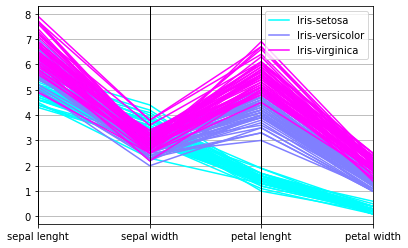

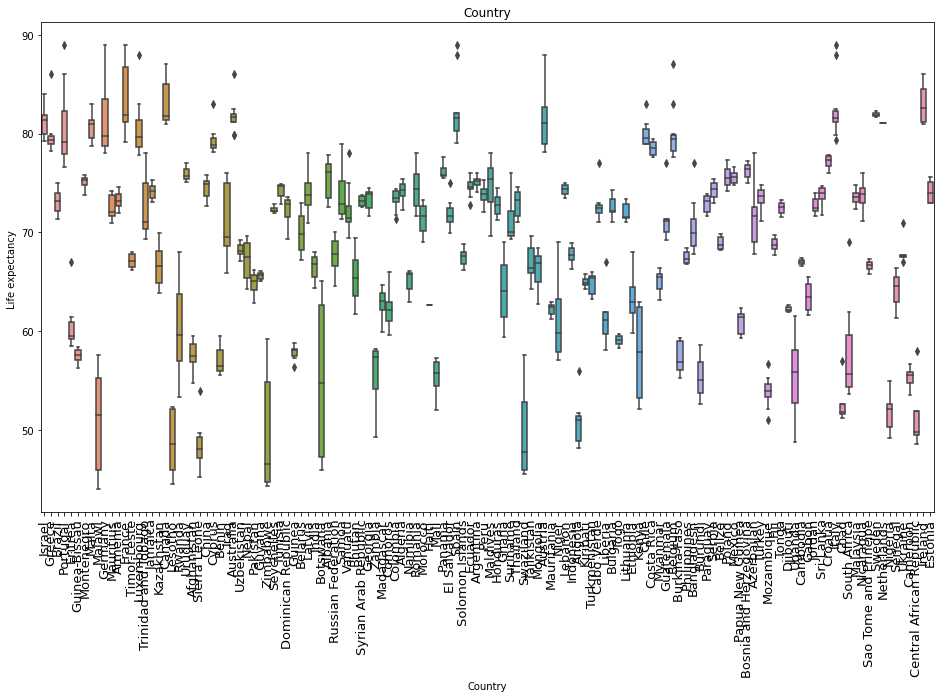

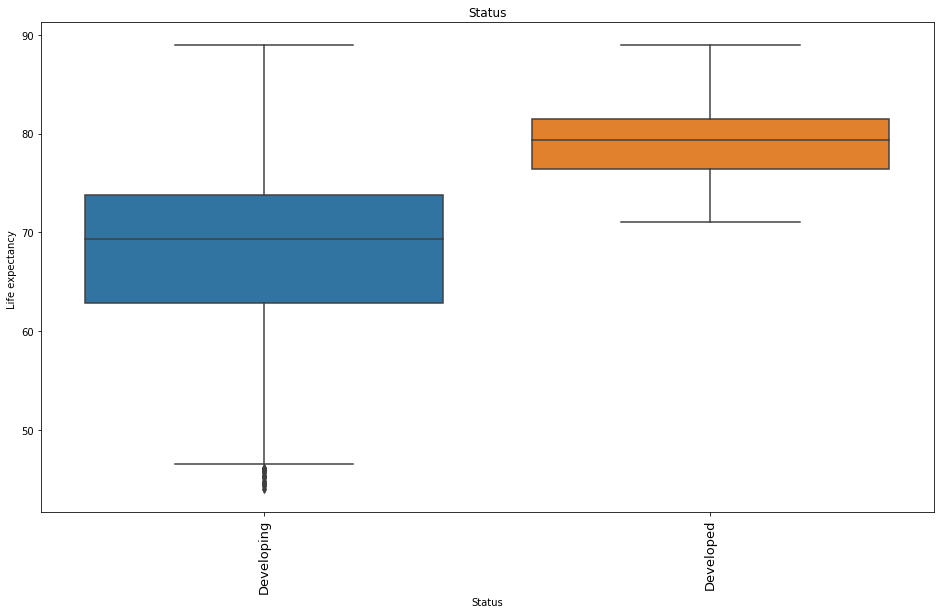

In [ ]:
### Per ogni colonna nelle categorical features (che sono due), fai il grafico con y come target name
#categorical_features è una lista
for feature in categorical_features:
  plt.figure(figsize=(16,9))
  sns.boxplot(x=feature, y=target_name, data=train_df)
  plt.title(feature)
  plt.xticks(rotation=90, fontsize=13);

###Cleaning/Features selection/Label Encoder

####Cleaning

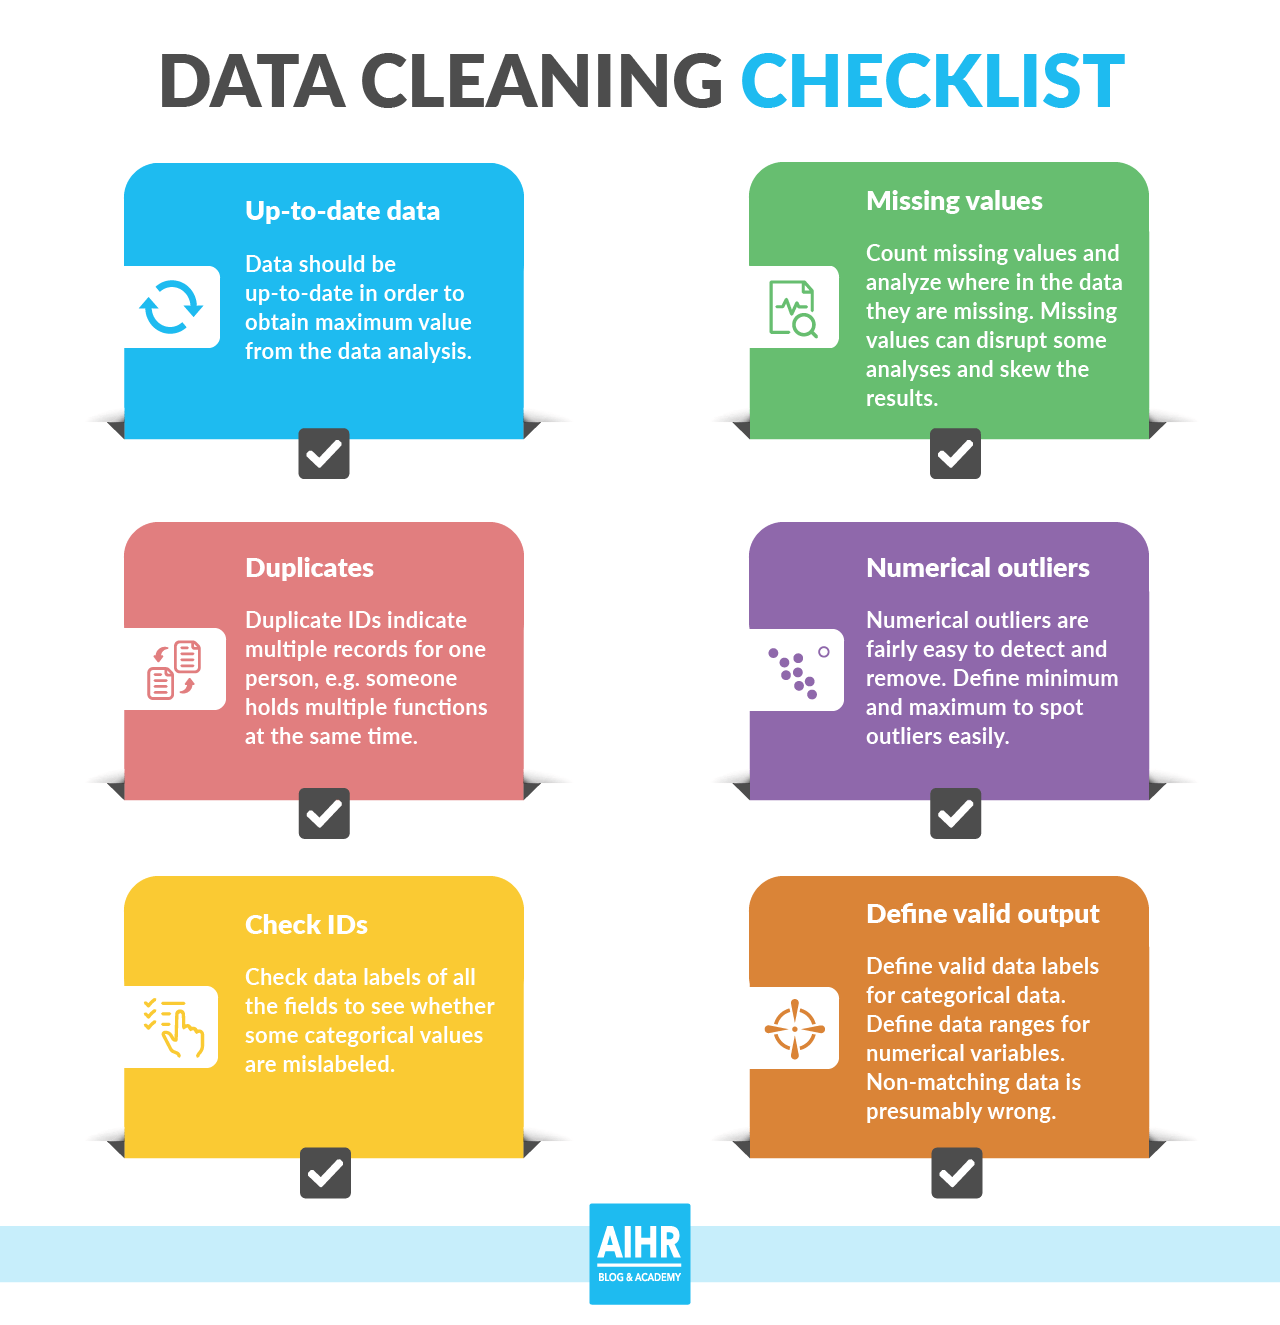

- Efficiency – Cleaning data helps you perform your analysis faster. This is because having clean data means you avoid multiple errors, and your results will be more accurate. Therefore, you won’t have to re-do the whole task due to false results.
-  Error Margin – Although you may be very eager to get results, if the data isn’t clean, the results won’t be accurate. That means when you present the work, the outcome may not be true. Therefore, getting used to cleaning data means that you adopt the practice of slowing down and fixing data before presenting it. Leaving less room for mistakes. 
-  Accuracy – As data cleaning takes up so much time, you will soon learn to be more accurate with the data entered in the first place. Of course, data cleaning will still be needed for other reasons, but doing it gets you used to being more precise in the first place.

**Remove Unwanted Observations**\
The first thing you need to do in setting up data cleaning is to remove unwanted observations. This includes removing duplicate or irrelevant observations. 

Duplicate observations will most likely arise during data collection. They usually happen when you scrape data or combine datasets from multiple places. They can also occur when you receive data from clients or other departments. For instance, a user may have accidentally entered their details twice. Duplicates will only increase the amount of data you have and can end up wasting time. 

Irrelevant observations are ones that don’t fit with the issues you are trying to solve. For example, say you are building a virtual office phone service. You will want anything to do with phone numbers in there. But you won’t want anything to do with social media. Focussing on this point first will prevent any problems that may pop up down the line. 

Make sure the data definitely is irrelevant and that you won’t need it further down the line, say for something like correlated values. Once you are sure of that, get rid of it!\


---



---


**Filter Unwanted Outliers**\
It’s important to get rid of unwanted outliers because they can cause problems with certain models. Linear regression models, for example, are less robust to outliers than decision tree models. 

Removing outliers will help with the model’s performance. But, there does have to be a legitimate reason to remove them. 

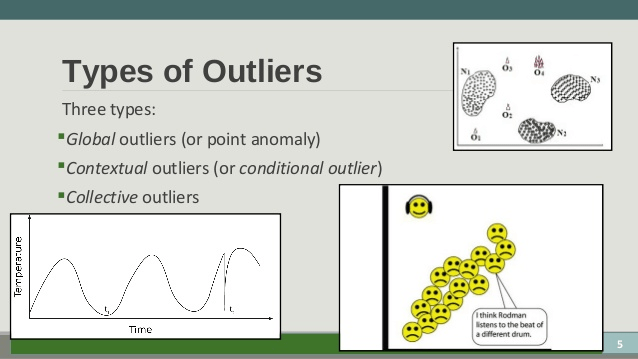

**Fix Typos**\
**Convert Numbers Stored as Text Into Numbers**


#####Valori Mancanti

Per controllare che non ci siano valori mancanti, posso fare:


- 
```
df.isnull().sum().sum() == 0
```

- 
```
df.info()
```

- 
```
df.isnull()
```




Oppure con una heatmap per vedere dove sono distribuiti
```
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull());
```




As we have seen, Pandas treats None and NaN as essentially interchangeable for indicating missing or null values. To facilitate this convention, there are several useful methods for detecting, removing, and replacing null values in Pandas data structures. They are:

- isnull(): Generate a boolean mask indicating missing values
- notnull(): Opposite of isnull()
- dropna(): Return a filtered version of the data
- fillna(): Return a copy of the data with missing values filled or imputed

[Per approfondire clicca qui!](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.04-Missing-Values.ipynb)



```

df1 = df.fillna(df.mean()) #con la media
df['numeri']=df['numeri'].fillna(0)
df['numeri']=df['numeri'].fillna(df['numeri'].mean())
df = df.dropna() #drop delle righe con valori nulli
```
Replace:



```
df = df.replace('simbolo da rimpiazzare', 0)
```





Interpolate
```
# To replace missing values with interpolated values, for example Age
df['Age'] = df['Age'].interpolate()
```



####Data types

#####Per vedere categorical e numerical features

In [ ]:
categorical_features = [col for col in train_df.columns if train_df[col].dtype==object] #per trovare le features con object come tipo di dato nelle colonne

In [ ]:
numerical_features = [col for col in train_df.columns if train_df[col].dtype!=object] #per le features numeriche

Prendi una colonna per ogni colonna nel mio train df se il tipo è oggetto

In [ ]:
[col for col in train_df.columns if train_df[col].dtype==object]

['Country', 'Status']

In [ ]:
#oppure 
train_df[categorical_features]

Country      Status
301             Israel  Developing
400             Greece  Developing
1224            Brazil  Developing
1113          Portugal   Developed
331            Eritrea  Developing
...                ...         ...
356            Croatia   Developed
960           Suriname  Developing
812           Maldives  Developing
132           Paraguay  Developing
885   Papua New Guinea  Developing

[1047 rows x 2 columns]

#####Data types

[Per approfondire i data types clicca qui](https://pbpython.com/pandas_dtypes.html)

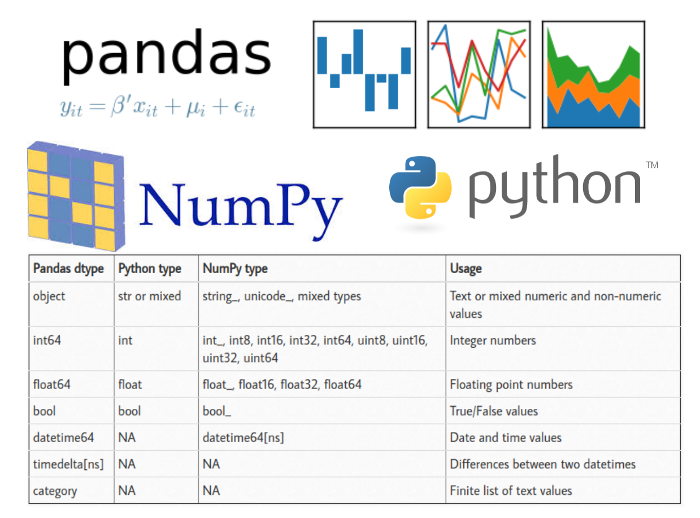

In [ ]:
df.dtypes
df.info()


Per convertire i dati:



```
df['Customer Number'].astype('int')
```



Ricorda sempre di assegnare nuovamente:\
**df["Customer Number"]** = df['Customer Number'].astype('int')


####Label Encoder

#####pd get dummies

In [ ]:
# First, create dummy series from the Embarked and Sex columns
EmbarkedColumnDummy = pd.get_dummies(df['Embarked']) #avrò C,Q,S i valori categorici  della colonna embarked
SexColumnDummy = pd.get_dummies(df['Sex'])

Note: the get_dummies() functions converts categorical variables into dummy indicator variables

Second, we add these dummy columns to the original dataset

In [ ]:
df = pd.concat((df, EmbarkedColumnDummy, SexColumnDummy), axis=1).drop(['Sex','Embarked'],axis=1)
df

Survived  Pclass    Age  SibSp  Parch     Fare  C  Q  S  female  male
0           0       3  22.00      1      0   7.2500  0  0  1       0     1
1           1       1  38.00      1      0  71.2833  1  0  0       1     0
2           1       3  26.00      0      0   7.9250  0  0  1       1     0
3           1       1  35.00      1      0  53.1000  0  0  1       1     0
4           0       3  35.00      0      0   8.0500  0  0  1       0     1
..        ...     ...    ...    ...    ...      ... .. .. ..     ...   ...
151         1       1  22.00      1      0  66.6000  0  0  1       1     0
152         0       3  55.50      0      0   8.0500  0  0  1       0     1
153         0       3  40.50      0      2  14.5000  0  0  1       0     1
154         0       3  45.75      0      0   7.3125  0  0  1       0     1
155         0       1  51.00      0      1  61.3792  1  0  0       0     1

[155 rows x 11 columns]

#####One hot encoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
#solo per algoritmi come linear regression, che ha problemi di collinareità

enc = OneHotEncoder()  #aggiungo (drop='first') se ho più di due colonne

dummies_array = enc.fit_transform(train_df['Status'].to_numpy().reshape(-1,1)).toarray()


In [ ]:
dummies_df = pd.DataFrame(dummies_array, index=train_df.index)

In [ ]:
dummies_df

0    1
301   0.0  1.0
400   0.0  1.0
1224  0.0  1.0
1113  1.0  0.0
331   0.0  1.0
...   ...  ...
356   1.0  0.0
960   0.0  1.0
812   0.0  1.0
132   0.0  1.0
885   0.0  1.0

[1047 rows x 2 columns]

In [ ]:
train_df = train_df[numerical_features+['Country']].join(dummies_df)

train_df

Year  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
301   2014              82.2              6.0              1     2.62   
400   2009              80.0             78.0              0     9.08   
1224  2003              71.8            172.0             88     6.95   
1113  2010              79.6             88.0              0    12.25   
331   2005              59.4             34.0              7     1.07   
...    ...               ...              ...            ...      ...   
356   2011              77.0             14.0              0    12.19   
960   2010              73.0             19.0              0     5.26   
812   2000              69.6            139.0              0     1.83   
132   2013              73.8            148.0              3     5.03   
885   2002              59.3            327.0             11     0.61   

      percentage expenditure  Hepatitis B  Measles    BMI   \
301              4348.335310         97.0         6   64.6   
400               372.685414         95.0         2   63.1   
1224               15.857812         97.0         2   46.1   
1113             3119.349824         97.0         5   58.1   
331                 5.064689         96.0        19   13.9   
...                      ...          ...       ...    ...   
356              1913.356642         97.0        12   61.3   
960                99.080954         86.0         0   54.8   
812               300.162103         96.0        20   15.2   
132               573.434698         86.0         0   48.6   
885               110.980306          6.0     17620   38.9   

      under-five deaths   ...   HIV/AIDS           GDP   Population  \
301                    1  ...        0.1  37582.846240      82157.0   
400                    0  ...        0.1   2971.973000     111717.0   
1224                 100  ...        0.1    359.587582  182482149.0   
1113                   0  ...        0.1  22538.654800      15731.0   
331                    9  ...        1.6    276.758960      39697.0   
...                  ...  ...        ...           ...          ...   
356                    0  ...        0.1  14539.184210     428622.0   
960                    0  ...        0.5    833.313320      52613.0   
812                    0  ...        0.1   2182.997110        286.0   
132                    3  ...        0.2   4479.958580     646574.0   
885                   14  ...        1.4    511.665773    5862316.0   

       thinness  1-19 years   thinness 5-9 years  \
301                     1.2                  1.1   
400                     0.8                  0.7   
1224                    3.3                  3.3   
1113                    0.7                  0.5   
331                     9.4                  9.5   
...                     ...                  ...   
356                     1.6                  1.5   
960                     3.5                  3.4   
812                    14.8                 14.8   
132                     2.0                  1.9   
885                     1.5                  1.5   

      Income composition of resources  Schooling  Country    0    1  
301                             0.895       16.0       58  0.0  1.0  
400                             0.857       16.2       47  0.0  1.0  
1224                            0.699       14.8       17  0.0  1.0  
1113                            0.812       16.0       98  1.0  0.0  
331                             0.000        5.4       38  0.0  1.0  
...                               ...        ...      ...  ...  ...  
356                             0.808       14.5       32  1.0  0.0  
960                             0.700       12.3      112  0.0  1.0  
812                             0.577       11.3       74  0.0  1.0  
132                             0.679       12.3       94  0.0  1.0  
885                             0.428        6.9       93  0.0  1.0  

[1047 rows x 23 columns]

In [ ]:
train_df.columns

Index([                           'Year',                'Life expectancy ',
                       'Adult Mortality',                   'infant deaths',
                               'Alcohol',          'percentage expenditure',
                           'Hepatitis B',                        'Measles ',
                                 ' BMI ',              'under-five deaths ',
                                 'Polio',               'Total expenditure',
                           'Diphtheria ',                       ' HIV/AIDS',
                                   'GDP',                      'Population',
                 ' thinness  1-19 years',             ' thinness 5-9 years',
       'Income composition of resources',                       'Schooling',
                               'Country',                                 0,
                                       1],
      dtype='object')

#####Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
enc = LabelEncoder()

train_df['Country'] = enc.fit_transform(train_df['Country']) #fit il modello sulla colonna country

#dopo bisogna fare l'inverse transformer 

In [ ]:
# enc_name_mapping = dict(zip(enc.classes_, enc.transform(enc.classes_)))
# print(enc_name_mapping) #dizionario di tutti i countries ed il numero a cui corrispondono

#####Metodo map

In [ ]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df['class']= df['class'].map({'Iris-setosa':0, 'Iris-versicolor':1,'Iris-virginica':2 }) 
df

sepal lenght  sepal width  petal lenght  petal width  class
0             5.1          3.5           1.4          0.2      0
1             4.9          3.0           1.4          0.2      0
2             4.7          3.2           1.3          0.2      0
3             4.6          3.1           1.5          0.2      0
4             5.0          3.6           1.4          0.2      0
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      2
146           6.3          2.5           5.0          1.9      2
147           6.5          3.0           5.2          2.0      2
148           6.2          3.4           5.4          2.3      2
149           5.9          3.0           5.1          1.8      2

[150 rows x 5 columns]

###Describe

In [ ]:
# getting the statistical measures of the data
df.describe().T #T per transporre 

##FEATURES

Per le features, posso utilizzare:
-  decision tree (vai al capitolo)
-  random forest (vai al capitolo)
-  correlazione Pearson
-  heatmap

Heatmap:

```
import seaborn as sns

plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)
```



Corr Pearson

```
corr = df.corr()
corr['Risk'].abs().sort_values(ascending=False)
```



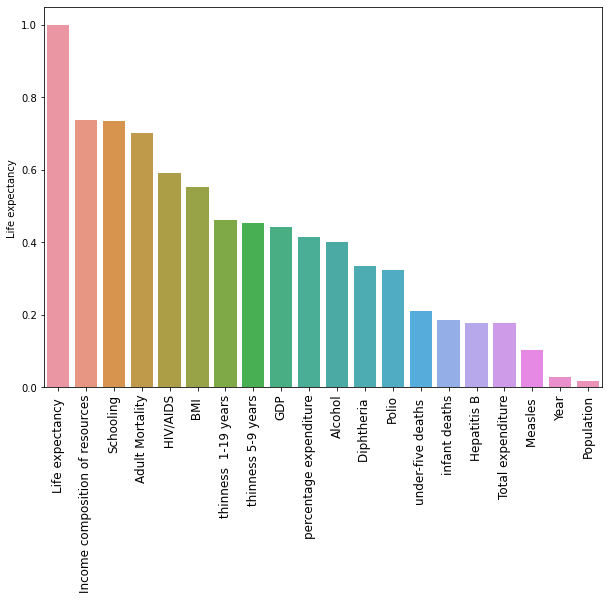

In [ ]:
corr_matrix = train_df.corr()
target_corr = corr_matrix[target_name].abs().sort_values(ascending=False)

plt.figure(figsize=(10,7))
sns.barplot(x=target_corr.index, y=target_corr)
plt.xticks(rotation=90, fontsize=12)
plt.show()

##Separare features & target

### Separate the Features and the Classes con iloc

We would separate the features (X) and the classes (y). The classes is the target variable we want to predict. In this case, it is the ‘Survived’ column

In [ ]:
## Move target variable to the end of the dataframe
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S',
       'female', 'male'],
      dtype='object')

In [ ]:
df = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'C', 'Q', 'S', 'female', 'male','Survived']] #Il target è l'ultima colonna

In [ ]:
X_ = df.iloc[:,0:-1]#tutte le colonne dalla 0 alla penultima (l'ultima è il target)
y = df.iloc[:,-1]#prendo l'ultima colonna
X_

Pclass    Age  SibSp  Parch     Fare  C  Q  S  female  male
0         3  22.00      1      0   7.2500  0  0  1       0     1
1         1  38.00      1      0  71.2833  1  0  0       1     0
2         3  26.00      0      0   7.9250  0  0  1       1     0
3         1  35.00      1      0  53.1000  0  0  1       1     0
4         3  35.00      0      0   8.0500  0  0  1       0     1
..      ...    ...    ...    ...      ... .. .. ..     ...   ...
151       1  22.00      1      0  66.6000  0  0  1       1     0
152       3  55.50      0      0   8.0500  0  0  1       0     1
153       3  40.50      0      2  14.5000  0  0  1       0     1
154       3  45.75      0      0   7.3125  0  0  1       0     1
155       1  51.00      0      1  61.3792  1  0  0       0     1

[155 rows x 10 columns]

###Separarle senza iloc

In [ ]:
# separating the data and labels
X_ = df.drop(['class'], axis=1)
y = df['class']

##OVERFITTING

[AMAZON](https://docs.aws.amazon.com/it_it/machine-learning/latest/dg/model-fit-underfitting-vs-overfitting.html)

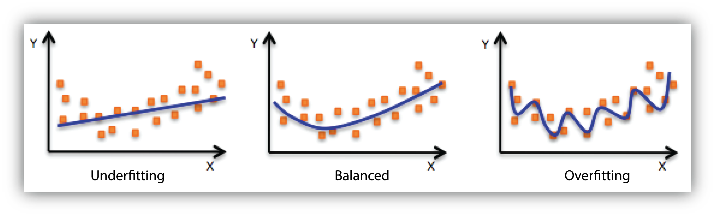

Underfitting:
Il modello non riesce a spiegare la variazione, è troppo semplice ( il modello). Il modello è "grossolano".\
Overfitting: 
L'accuracy è troppo specifica, il modello farà poi fatica a performare in maniera adeguata. Accettiamo che gli outlier vengano sbagliati.\
La differenza tra **train** accuracy e **test** accuracy, se è positiva è over fitting, se è negativa è underfitting, però per la best fit devo guardare l'**errore**!

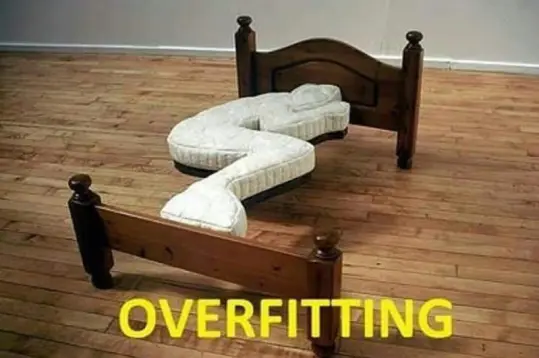

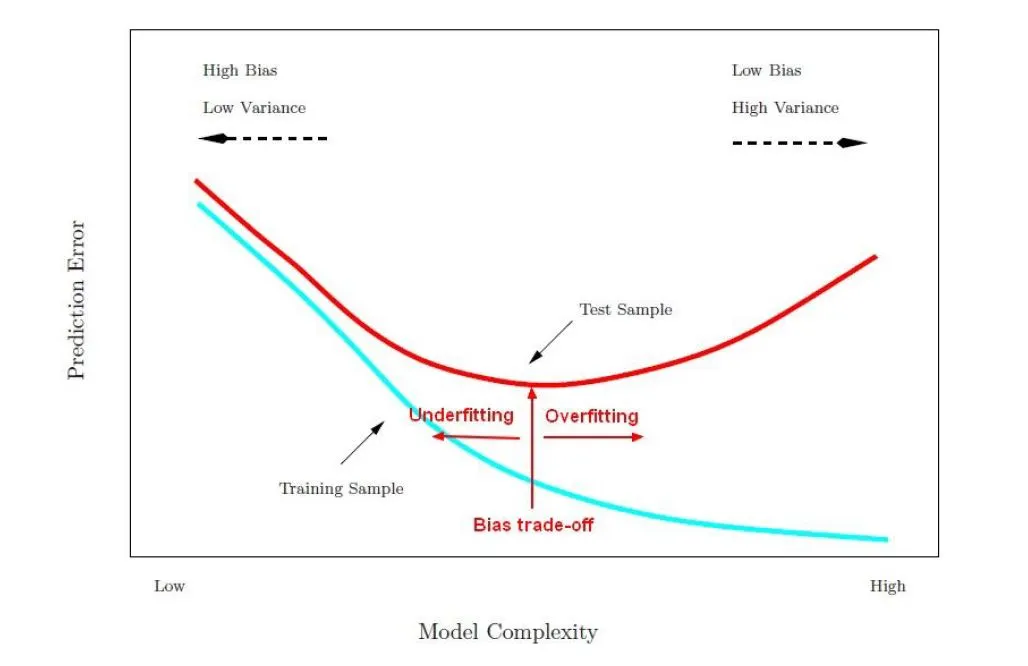

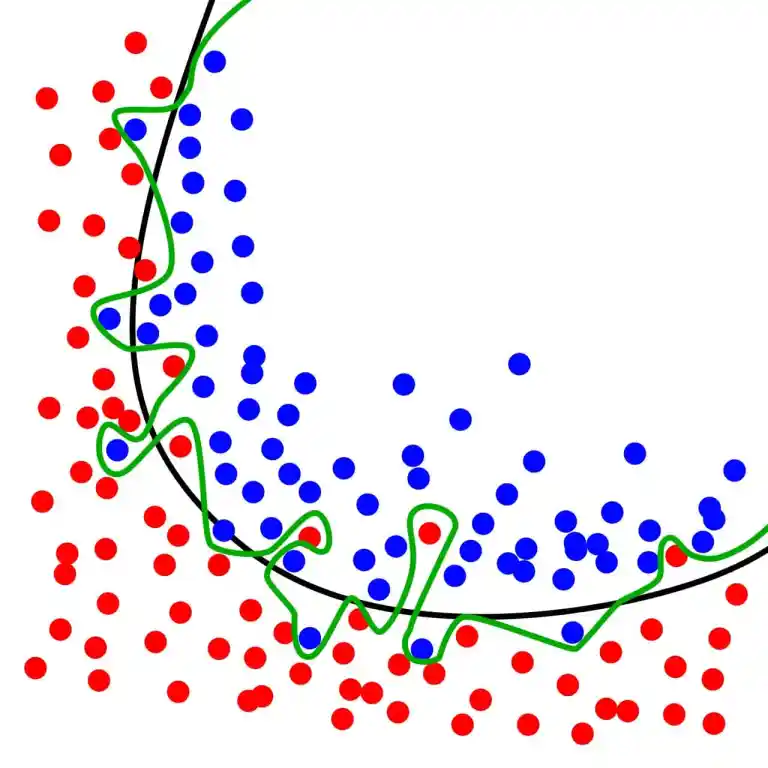

[Per approfondire l'overfitting clicca qui](https://ravedata.in/machine-learning/the-overfitting-problem/)

###Bias e Variance

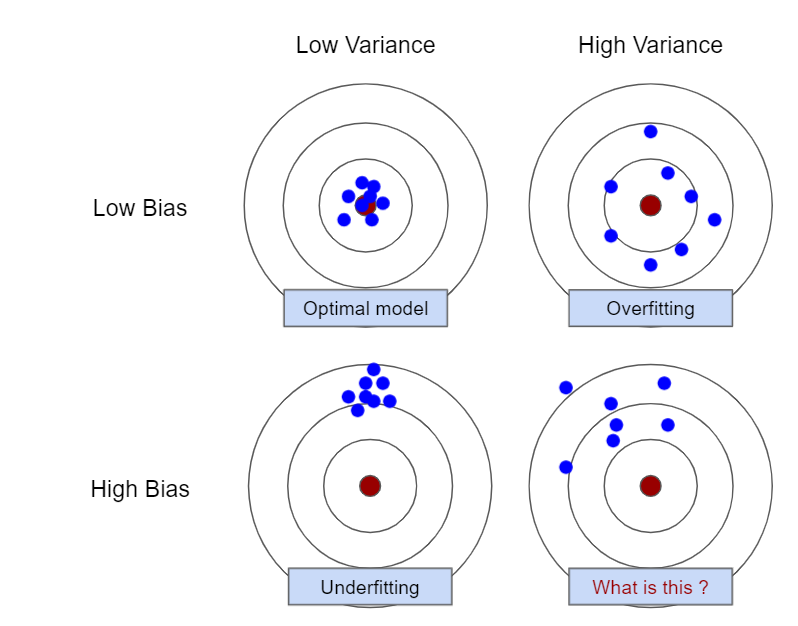

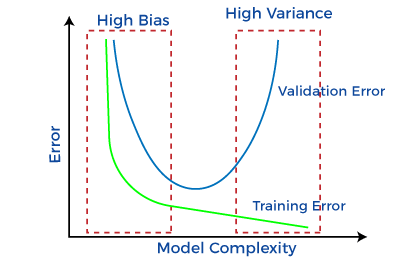

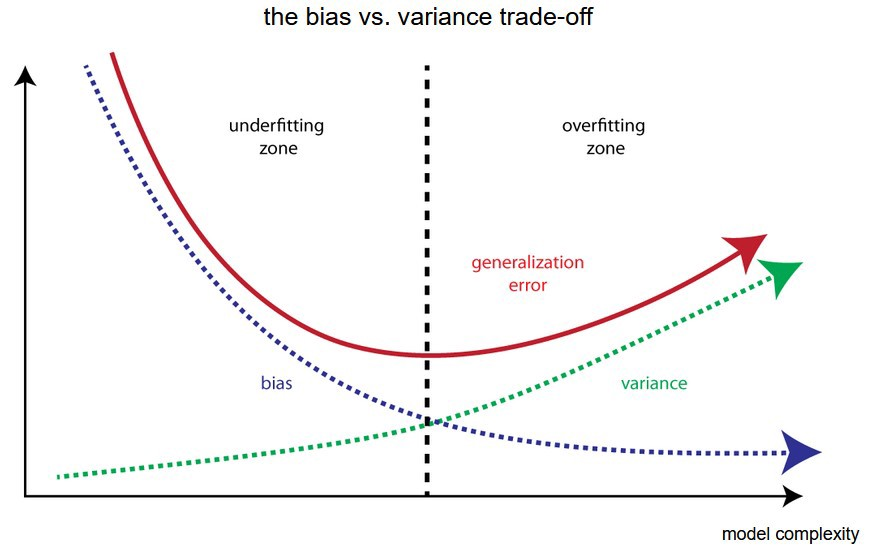

**Un modello troppo semplice fa underfitting, troppo complesso diventa over fitting.**

La complessità del modello varia in base ai **parametri**! 



####Bias

Proprietà intrinsica di un modello di catturare la varianza

F complessità

Significa che un modello molto semplice avrà un bias molto alto.

####Variance

##STANDARDIZZAZIONE

###StandardScaler



```
sc = StandardScaler()
standardized_data = sc.fit_transform(X_)
print(standardized_data)
```





```
X = standardized_data
y = df['class']
```



#### StandardScaler()

Lo standard scaler si basa sulle deviazioni standard  di ogni feature, e come si vede facilmente, le centra tutte attorno allo zero.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
sns.displot(X_train_scaled)
plt.show()

###MinMax

In [ ]:
from sklearn.preprocessing import MinMaxScaler #è più intuitivo, ma tipicamente si usa standard scaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) #faccio solo questo
#X_test_scaled = scaler.transform(X_test) #lo scaler è già fittato, posso fare fitting solo sul train set, non test se

Lo scaler mi restituisce un array quindi lo trasformo in un dataFrame

In [ ]:
pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [ ]:
sns.displot(X_train_scaled)
plt.show() 

Si sono persi i nomi delle feature perchè lo scaler dà in output un numpy.array multidimensionale. Per recuperarle basta ritrasformarlo in un DataFrame:

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns) #DataFrame normalizzato
sns.displot(X_train_scaled)
plt.show()

Come si vede il MinMaxScaler, basandosi sul massimo e sul minimo di ongi feature, ha il vantaggio di rendere ben paragonabili le scale delle features tra di loro. Potrebbe essere una buona scelta in questo caso, ma non è detto però che sia la scelta migliore in ogni caso. Queste features sono tutte positive, cioè non sono mai minori di zero. Ci sono spesso innvece contesti in cui alcune feature hanno anche valori minori di zero, e potrebbe essere una buona scelta quella di avere tutte le feature centrate sullo zero. A questo scopo per esempio si può usare lo StandardScaler.

##TRAIN TEST SPLIT


Uso X_ per dati non standardizzati, X per dati standardizzati
```
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state=667
                                                    )
                                                    
```



##RESHAPE

Per sapere se devo utilizzare il values.reshape(-1,1) utilizzo:
```
X.ndim
```

Se è più di 1 non ho bisogno di usarlo


##FUNZIONE EVALUATE

In [ ]:
### definisco già prima la funzione di evaluation

def evaluate(targets, preds, title, plots=True, verbose=True):

    from sklearn.metrics import mean_absolute_error, r2_score
    
    mae = mean_absolute_error(targets, preds)
    r2 = r2_score(targets, preds)
    
    if verbose:
        print(title)
        print('MAE: ', mae)
        print('R2: ', r2)
    
    if plots:
        ###### previsioni VS targets
        sns.scatterplot(x=targets, y=preds)
        ###### retta di perfect fit
        plt.plot(range(0,targets.max()), range(0,targets.max()), label='perfect fit')
        plt.title(title)
        plt.legend()
        plt.show()
    
    return {'mae':mae, 'r2':r2}

##ALGORITMI DI REGRESSIONE

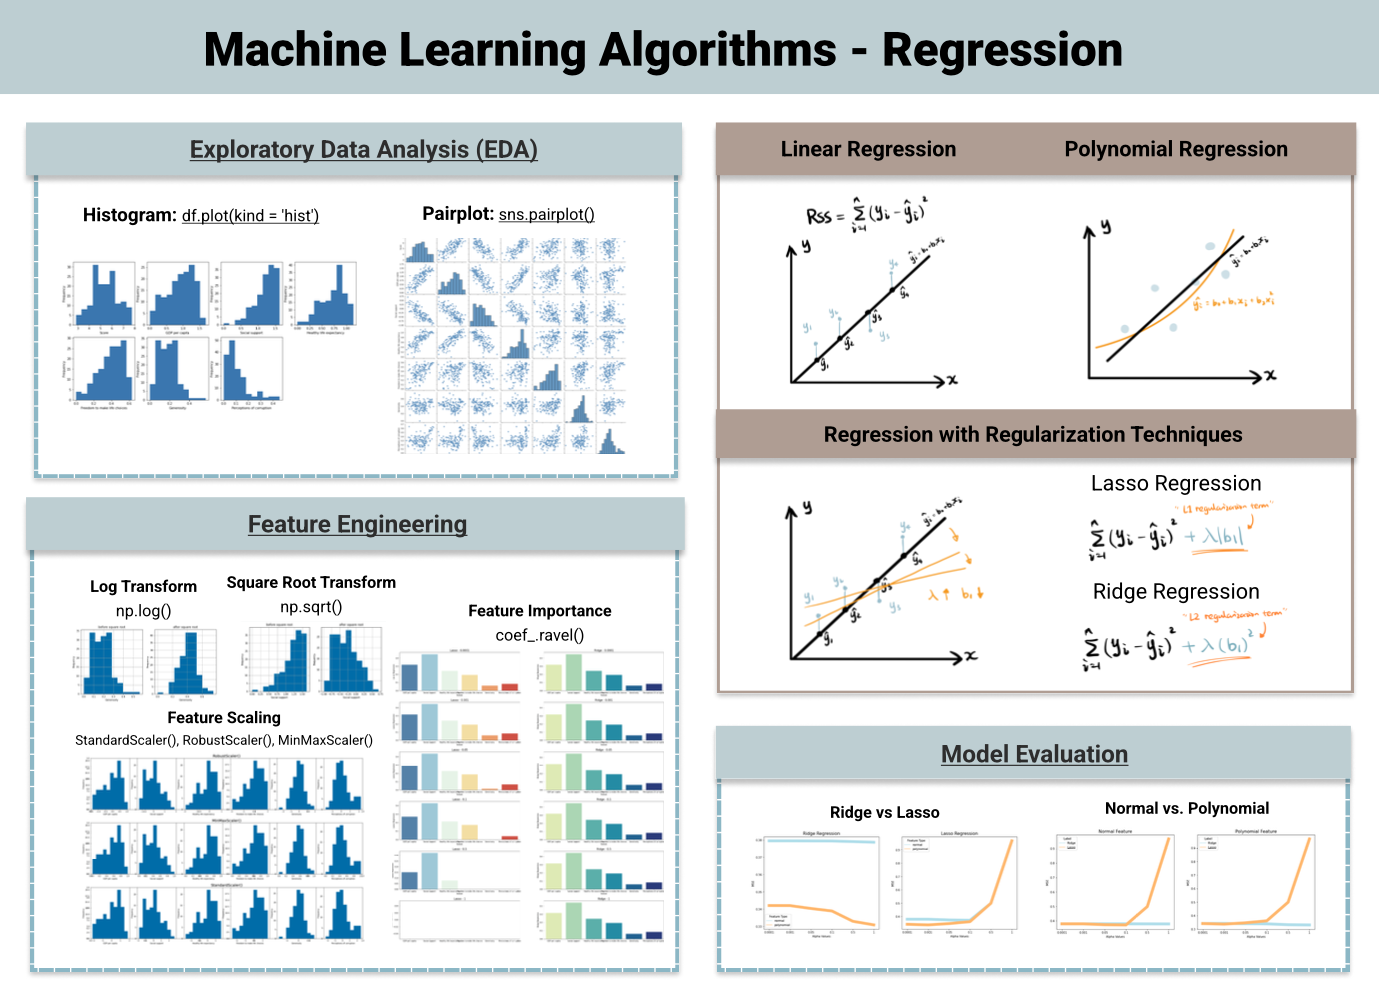

###LINEAR REGRESSION

In una regressione, mi basta utilizzare:
```
model.coef_
```

per sapere quali sono i **coefficienti.**

Per stampare l'intercetta vado a stamparla con 


```
model.intercept_
```





Con la linear regression possiamo utilizzare il foglio di calcolo attraverso una semplice funzione, copio i model.coef_ che saranno b1 e b2, mentre model.intercept_ è b0 .\
La formula sarà b0+b1 * X1 (X1 è la prima variabile, ad esempio total_bill)+B2 * x2(x2 è la seconda variabile, ad esempio size)

###DECISION TREE

###RANDOM FOREST

In [ ]:
### Provare a trovare un buon valore di max_depth
depth_list = range(2,13,1)

train_r2_list = list()
test_r2_list = list()

for n in depth_list:
    print('\nMax_depth:',n)
    model = RandomForestRegressor(max_depth=n, random_state=22)
    model = model.fit(X=X_train, y=y_train)
    
    
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    
    train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET', plots=False, verbose=True)
    test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET', plots=False, verbose=True)
    over = train_metrics['r2']-test_metrics['r2']
    print('La differenza è: ' , over)
    train_r2_list += [train_metrics['r2']]

##ALGORITMI DI CLASSIFICAZIONE

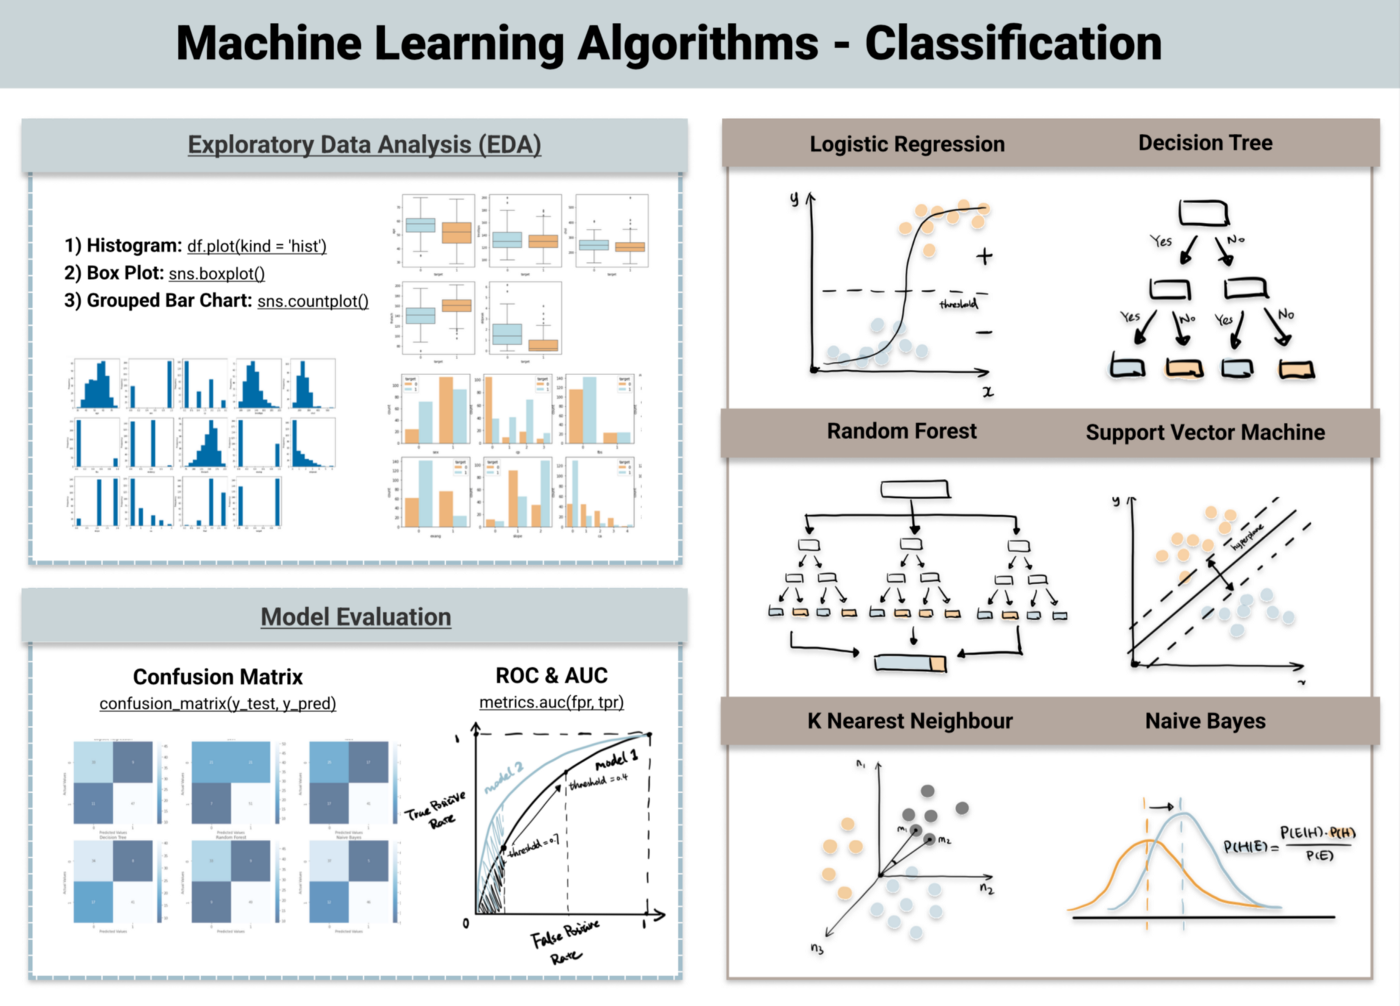

###LOGISTIC REGRESSION

Logistic Regression
Logistic regression is a calculation used to predict a binary outcome: either something happens, or does not. This can be exhibited as Yes/No, Pass/Fail, Alive/Dead, etc. \
Independent variables are analyzed to determine the binary outcome with the results falling into one of two categories. The independent variables can be categorical or numeric, but the dependent variable is always categorical. Written like this:

>**P(Y=1|X) or P(Y=0|X)**

It calculates the probability of dependent variable Y, given independent variable X. 

This can be used to calculate the probability of a word having a positive or negative connotation (0, 1, or on a scale between). Or it can be used to determine the object contained in a photo (tree, flower, grass, etc.), with each object given a probability between 0 and 1. 

[Algoritmi di classificazione ](https://towardsdatascience.com/top-machine-learning-algorithms-for-classification-2197870ff501)

###k-NN

K-nearest Neighbors
K-nearest neighbors (k-NN) is a pattern recognition algorithm that uses training datasets to find the k closest relatives in future examples. 

When k-NN is used in classification, you calculate to place data within the category of its nearest neighbor. If k = 1, then it would be placed in the class nearest 1. K is classified by a plurality poll of its neighbors.

###DECISION TREE

Proviamo a evitare l'overfitting limitando la max_depth dell'albero decisionale. Facciamo un ciclo su più valori. 
NB ci sarebbero tanti altri parametri su cui andare a lavorare ma noi ci limiteremo solo a max_depth

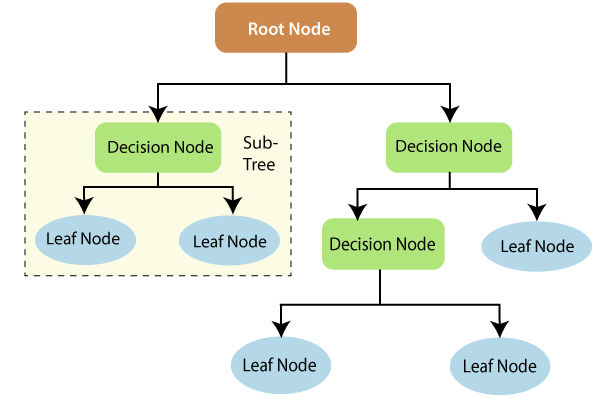

[Decision Trees clicca qui](https://chirag-sehra.medium.com/decision-trees-explained-easily-28f23241248)



Per calcolare cosa scegliere come root, calcolo la Gini impurity per ogni foglia, una volta ottenuto i dati, farò una media ponderata.
In questo modo trovo il Gini index per feature.
L'impurità è tipo un errore, voglio selezionare il nodo che mi da' meno errore.

####Features importance

In [ ]:
pd.Series(model.feature_importances_, index=X_train.columns ) #mi da' le importante relative ad ogni feature 

#model.feature_importances_ riporta un array con i pesi senza la categoria 

OverallQual     0.595716
GrLivArea       0.191720
GarageCars      0.028725
TotalBsmtSF     0.132969
FullBath        0.003936
TotRmsAbvGrd    0.046933
dtype: float64

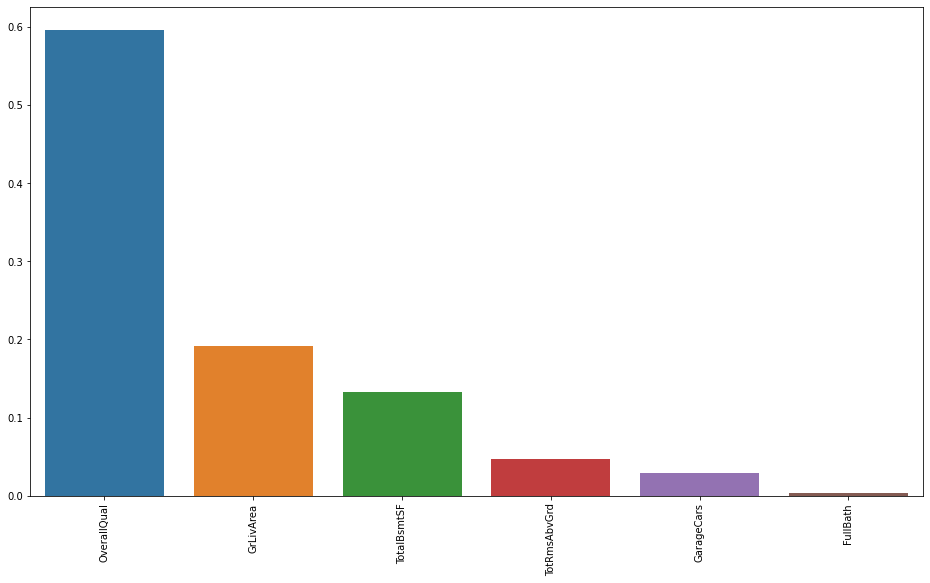

In [ ]:
#posso creare un barplot per vedere come sono distribuiti i pesi 
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(16,9))
sns.barplot(x=importances.index, y=importances)
plt.xticks(rotation=90)
plt.show()

###RANDOM FOREST

####Features importance

Possiamo utilizzare la features importance per fare il pruning del mio algoritmo, così diminuisco la variance ed abbasso il bias.
Dovrei sempre cercare di utilizzare un modello il più semplice possibile, utilizzando un numero limitato di features.


Non soffre di collinareità e **vede le relazioni non lineari** (perché è un modello non parametrico)!

In [ ]:
### fitting
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model = model.fit(train_df.drop([target_name]+list(categorical_features), axis=1), train_df[target_name]) #categorical_features non da' errore perché le ignora, se avessimo fatto le dummies me le avrebbe messe nel calcolo

In [ ]:
importances = pd.Series(model.feature_importances_, index=model.feature_names_in_).sort_values(ascending=False)

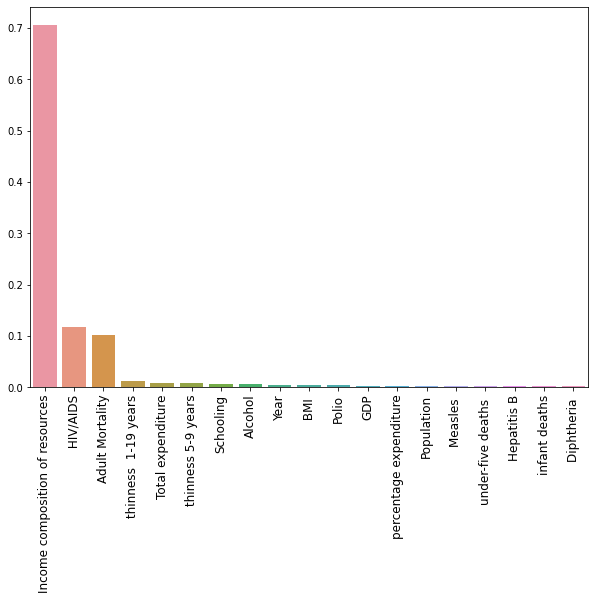

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x=importances.index, y=importances)
plt.xticks(rotation=90, fontsize=12)
plt.show()



---
Per poi vedere le più correlate:



In [ ]:
importances #è una serie di pandas con nomi sull'indice ed i rispettivi valori

Income composition of resources    0.706134
 HIV/AIDS                          0.116323
Adult Mortality                    0.102065
 thinness  1-19 years              0.012282
Total expenditure                  0.007958
 thinness 5-9 years                0.007450
Schooling                          0.007079
Alcohol                            0.007076
Year                               0.004807
 BMI                               0.004758
Polio                              0.003527
GDP                                0.003231
percentage expenditure             0.003035
Population                         0.002735
Measles                            0.002634
under-five deaths                  0.002489
Hepatitis B                        0.002179
infant deaths                      0.002136
Diphtheria                         0.002102
dtype: float64

In [ ]:
features = list(importances[:3].index) #il tre è escluso, fa 0,1,2

In [ ]:
X_train = train_df[features].copy()
X_test = test_df[features].copy()

y_train = train_df[target_name].copy()
y_test = test_df[target_name].copy()

###Accuracy (solo per la classificazione)

###CONFUSION MATRIX

https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62
\
https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
\
https://www.sciencedirect.com/topics/engineering/confusion-matrix

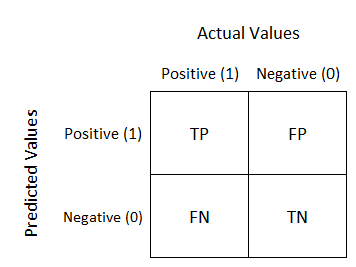

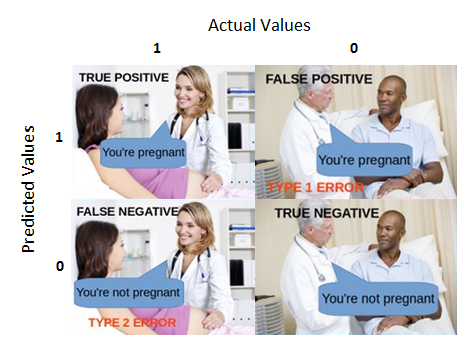

It is extremely useful for measuring Recall, Precision, Specificity, Accuracy, and most importantly AUC-ROC curves.

True Positive:
Interpretation: You predicted positive and it’s true.
You predicted that a woman is pregnant and she actually is.

True Negative:
Interpretation: You predicted negative and it’s true.
You predicted that a man is not pregnant and he actually is not.

False Positive: (Type 1 Error)
Interpretation: You predicted positive and it’s false.
You predicted that a man is pregnant but he actually is not.

False Negative: (Type 2 Error)
Interpretation: You predicted negative and it’s false.
You predicted that a woman is not pregnant but she actually is.

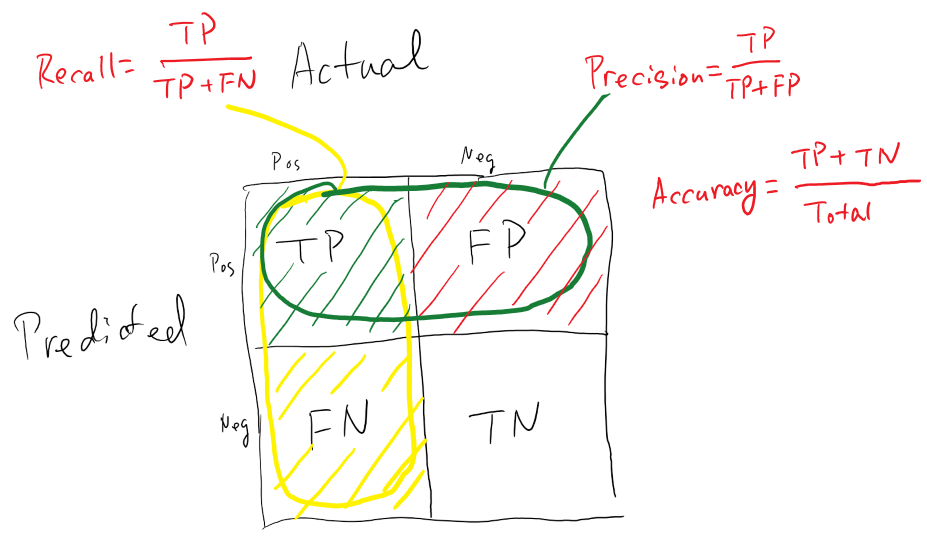



---

**Recall**


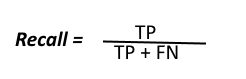

The above equation can be explained by saying, from all the positive classes, how many we predicted correctly.
Recall should be high as possible.



---
**Precision**


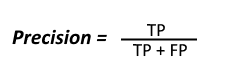

The above equation can be explained by saying, from all the classes we have predicted as positive, how many are actually positive.
Precision should be high as possible.



---
**Accuracy**



From all the classes (positive and negative), how many of them we have predicted correctly.
Accuracy should be high as possible.



---

**F-Score**\
It is difficult to compare two models with low precision and high recall or vice versa. So to make them comparable, we use F-Score. F-score helps to measure Recall and Precision at the same time. It uses Harmonic Mean in place of Arithmetic Mean by punishing the extreme values more.

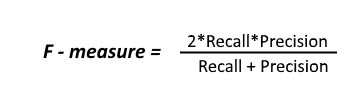

* Step 1: definire le labels



```
labels = ['No Risk', 'Risk']

```

* Step 2: creare il confusion matrix



```
from sklearn.metrics import ConfusionMatrixDisplay


cm = ConfusionMatrixDisplay.from_estimator(classifierL, 
                                      X_test, 
                                      y_test,
                                      cmap='Blues',
                                      display_labels=labels,
                                      xticks_rotation=45,
                                      )
cm;
```




####Make all confusion matrix

In [ ]:
classifiers = [DecisionTreeClassifier(max_depth=4), 
               RandomForestClassifier(n_estimators=200),
               GradientBoostingClassifier(n_estimators=100),
               LogisticRegression(max_iter=1000),
               GaussianNB(),
               KNeighborsClassifier(n_neighbors=2),
               SVC(probability=True),
               XGBClassifier()
               ]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=667)

for cls in classifiers:
    cls.fit(X_train, y_train)
    cls.predict(X_test)

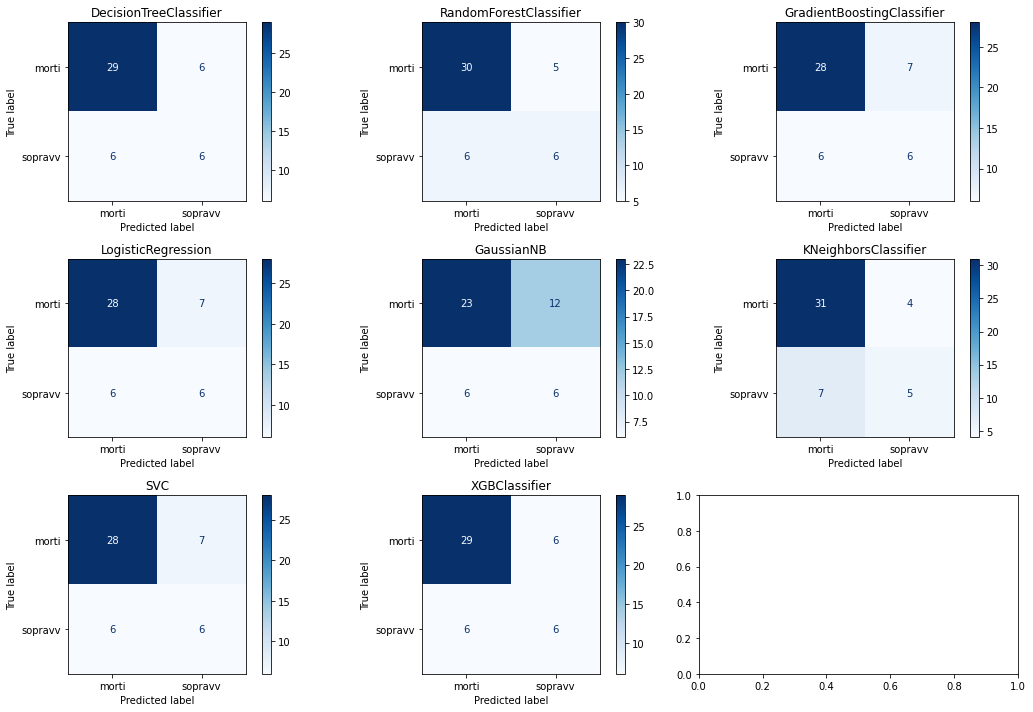

In [ ]:
from sklearn.metrics import plot_confusion_matrix

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                         display_labels=['morti','sopravv'])
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
#plt.show()

In [ ]:
from sklearn.metrics import classification_report
for cls, ax in zip(classifiers, axes.flatten()):
    print(cls)
    print(classification_report(y_test,cls.predict(X_test)))

DecisionTreeClassifier(max_depth=4)
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        35
           1       0.50      0.50      0.50        12

    accuracy                           0.74        47
   macro avg       0.66      0.66      0.66        47
weighted avg       0.74      0.74      0.74        47

RandomForestClassifier(n_estimators=200)
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        35
           1       0.55      0.50      0.52        12

    accuracy                           0.77        47
   macro avg       0.69      0.68      0.68        47
weighted avg       0.76      0.77      0.76        47

GradientBoostingClassifier()
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        35
           1       0.46      0.50      0.48        12

    accuracy                           0.72        47
   macro avg       0.6

####ROC Curve, AUC 

Se voglio fare la ROC curve dopo aver definito tutti i classifiers:

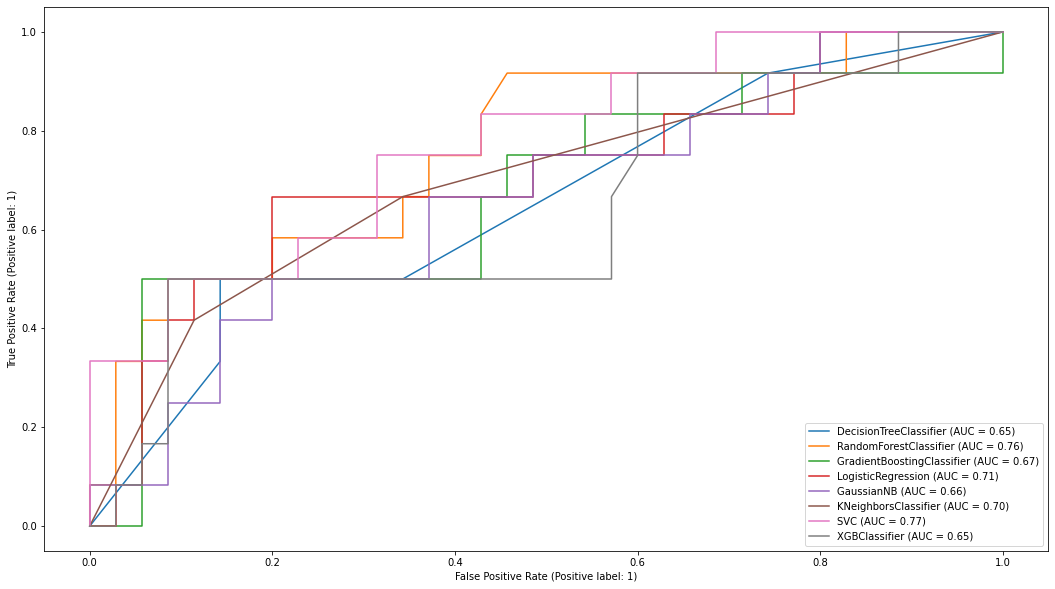

In [ ]:
from sklearn.metrics import plot_roc_curve

plt.figure(figsize=(18,10))
ax = plt.gca()

for cls in classifiers:
    cls.fit(X_train, y_train)
    plot_roc_curve(cls, X_test, y_test, ax=ax)

##PREDICT

model.predict([*parametri/features])

##CROSS VALIDATION

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

# Define dictionary with performance metrics
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

# Import required libraries for machine learning classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Instantiate the machine learning classifiers
log_model = LogisticRegression(max_iter=10000)
svc_model = LinearSVC(dual=False)
dtr_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()
gnb_model = GaussianNB()

# Define the models evaluation function
def models_evaluation(X, y, folds): #folds tra 5-10
    
    '''
    X : data set features
    y : data set target
    folds : number of cross-validation folds
    
    '''
    
    # Perform cross-validation to each machine learning classifier
    log = cross_validate(log_model, X, y, cv=folds, scoring=scoring)
    svc = cross_validate(svc_model, X, y, cv=folds, scoring=scoring)
    dtr = cross_validate(dtr_model, X, y, cv=folds, scoring=scoring)
    rfc = cross_validate(rfc_model, X, y, cv=folds, scoring=scoring)
    gnb = cross_validate(gnb_model, X, y, cv=folds, scoring=scoring)

    # Create a data frame with the models perfoamnce metrics scores
    models_scores_table = pd.DataFrame({'Logistic Regression':[log['test_accuracy'].mean(),
                                                               log['test_precision'].mean(),
                                                               log['test_recall'].mean(),
                                                               log['test_f1_score'].mean()],
                                       
                                      'Support Vector Classifier':[svc['test_accuracy'].mean(),
                                                                   svc['test_precision'].mean(),
                                                                   svc['test_recall'].mean(),
                                                                   svc['test_f1_score'].mean()],
                                       
                                      'Decision Tree':[dtr['test_accuracy'].mean(),
                                                       dtr['test_precision'].mean(),
                                                       dtr['test_recall'].mean(),
                                                       dtr['test_f1_score'].mean()],
                                       
                                      'Random Forest':[rfc['test_accuracy'].mean(),
                                                       rfc['test_precision'].mean(),
                                                       rfc['test_recall'].mean(),
                                                       rfc['test_f1_score'].mean()],
                                       
                                      'Gaussian Naive Bayes':[gnb['test_accuracy'].mean(),
                                                              gnb['test_precision'].mean(),
                                                              gnb['test_recall'].mean(),
                                                              gnb['test_f1_score'].mean()]},
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    # Add 'Best Score' column
    #models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table.T)
  
# Run models_evaluation function
models_evaluation(X, y, 10)

Accuracy  Precision    Recall  F1 Score
Logistic Regression        0.811667   0.766429  0.676667  0.705303
Support Vector Classifier  0.798750   0.741905  0.676667  0.692576
Decision Tree              0.702917   0.578690  0.570000  0.559735
Random Forest              0.786667   0.760476  0.620000  0.668333
Gaussian Naive Bayes       0.735000   0.630000  0.680000  0.635175

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

featu=[]
for i in range(2,len(X_.columns)):
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
    classifier = LogisticRegression(max_iter=10000)
    pipe = Pipeline([
                    ('scaler', StandardScaler()),
                    ('featureselection',rfe),
                    ('classifier',classifier)
                    ])
    pipe.fit(X_train,y_train)
    test_y_pred = pipe.predict(X_test)
    test_acc = accuracy_score(y_test, test_y_pred)
    f1 = f1_score(y_test, test_y_pred,average='macro')
    featu.append(f1)
    # summarize progress
    print('feature selected %d, Acc.Test: %.3f, F1: %.3f' % (i, test_acc, f1 ))

print('\n Best number of feature selection is: %d' % (np.argmax(featu) +2))

feature selected 2, Acc.Test: 0.723, F1: 0.646
feature selected 3, Acc.Test: 0.723, F1: 0.646
feature selected 4, Acc.Test: 0.723, F1: 0.646
feature selected 5, Acc.Test: 0.723, F1: 0.646
feature selected 6, Acc.Test: 0.723, F1: 0.646
feature selected 7, Acc.Test: 0.723, F1: 0.646
feature selected 8, Acc.Test: 0.723, F1: 0.646
feature selected 9, Acc.Test: 0.723, F1: 0.646

 Best number of feature selection is: 2


##GRID CV

##PIPELINE



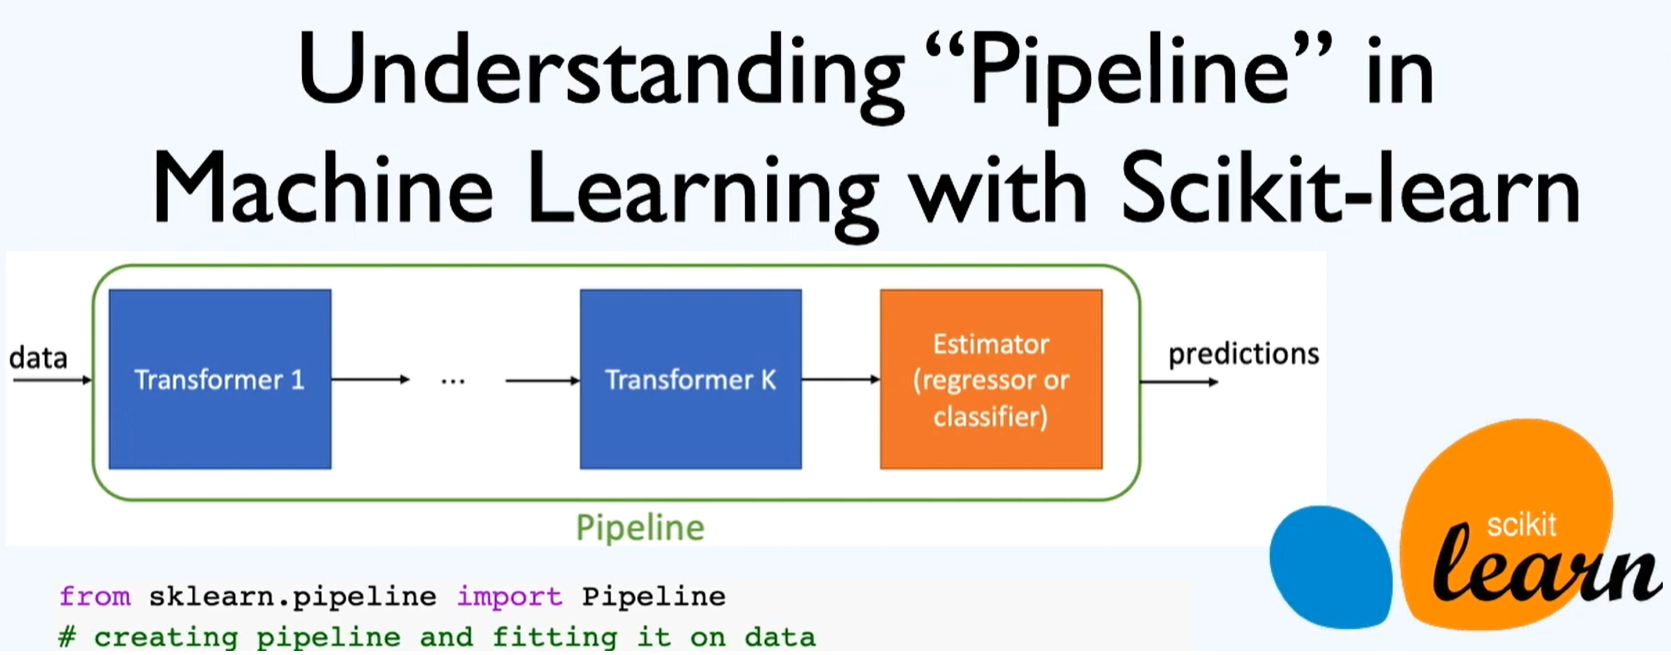

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
X_train = 10*np.random.normal(0,1,70)
y_train = 10*(-X_train**2) + np.random.normal(-100,100,70)

X_train = X_train.reshape(-1,1)
X_train.shape

(70, 1)

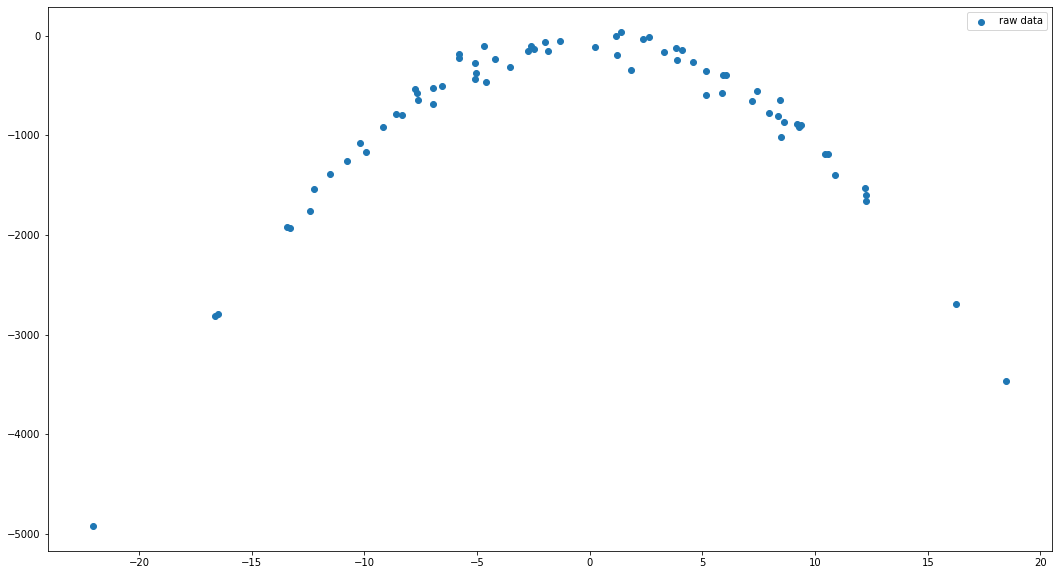

In [3]:
plt.figure(figsize=(18,10))
plt.scatter(X_train,y_train,label='raw data');
plt.legend();

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train,y_train)  # always target must be ndim==2!!!

X_test = np.linspace(-30,30,100).reshape(-1,1)

#Prediction
y_pred = lr.predict(X_test)  

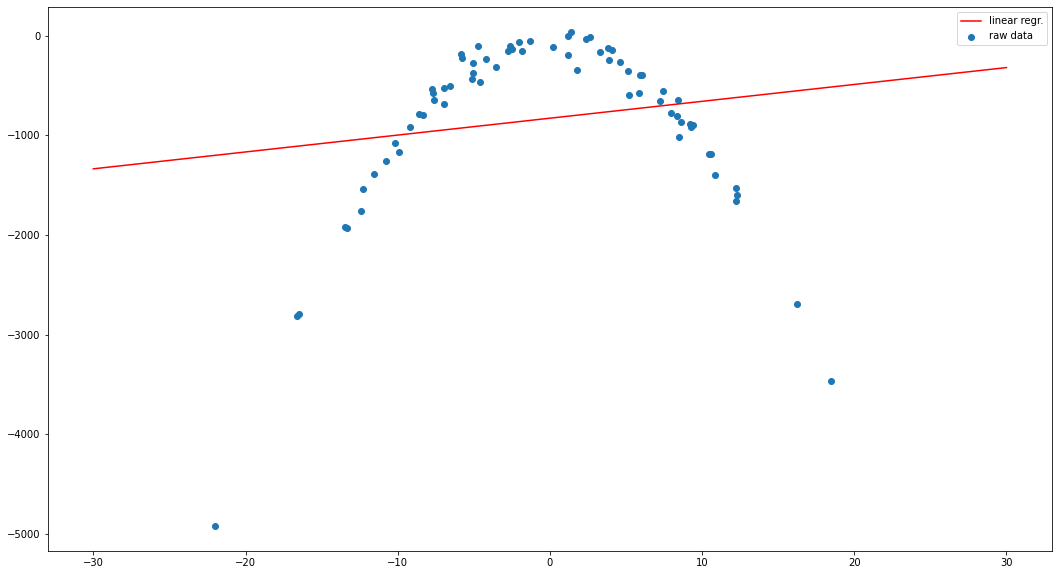

In [5]:
plt.figure(figsize=(18,10))
plt.scatter(X_train,y_train,label='raw data');
plt.plot(X_test,y_pred, color='red',label="linear regr.");
plt.legend();

###Polynomial Features

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

In [6]:
## Using Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

pipe = Pipeline ([
                  ('transform_data',PolynomialFeatures(degree=2)),
                  ('estimator',LinearRegression()),
                  ])

pipe.fit(X_train,y_train)  # always target must be ndim==2!!!

#pipeline Prediction
poly_pred = pipe.predict(X_test) 

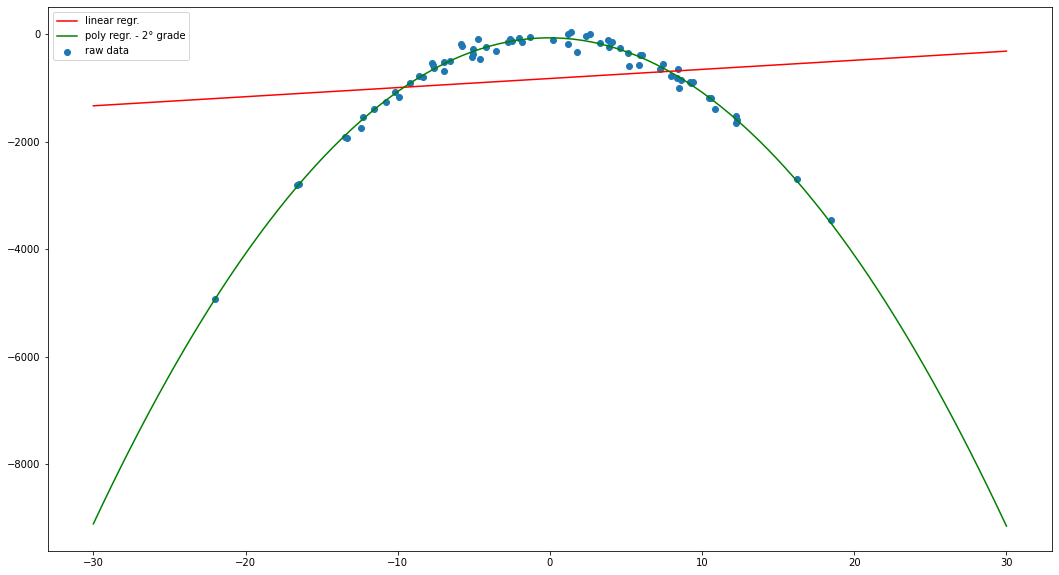

In [7]:
plt.figure(figsize=(18,10))
plt.scatter(X_train,y_train,label='raw data');
plt.plot(X_test,y_pred, color='red',label="linear regr.");
plt.plot(X_test,poly_pred, color='green',label="poly regr. - 2° grade");
plt.legend();

###Polynomial Features Iterators

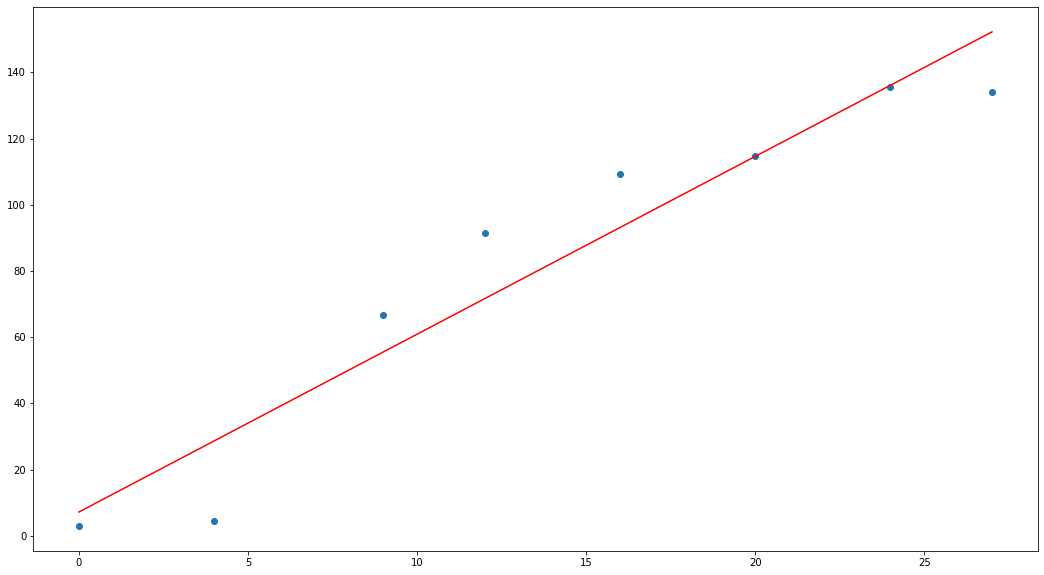

In [8]:
x = np.array([0., 4., 9., 12., 16., 20., 24., 27.])
y = np.array([2.9,4.3,66.7,91.4,109.2,114.8,135.5,134.2])

lr = LinearRegression()
x = x.reshape(-1,1)
lr.fit(x,y)  # always target must be ndim==2!!!

#Prediction
y_pred = lr.predict(x)  

plt.figure(figsize=(18,10))
plt.scatter(x, y, label="sample data");
plt.plot(x, y_pred,'-r')

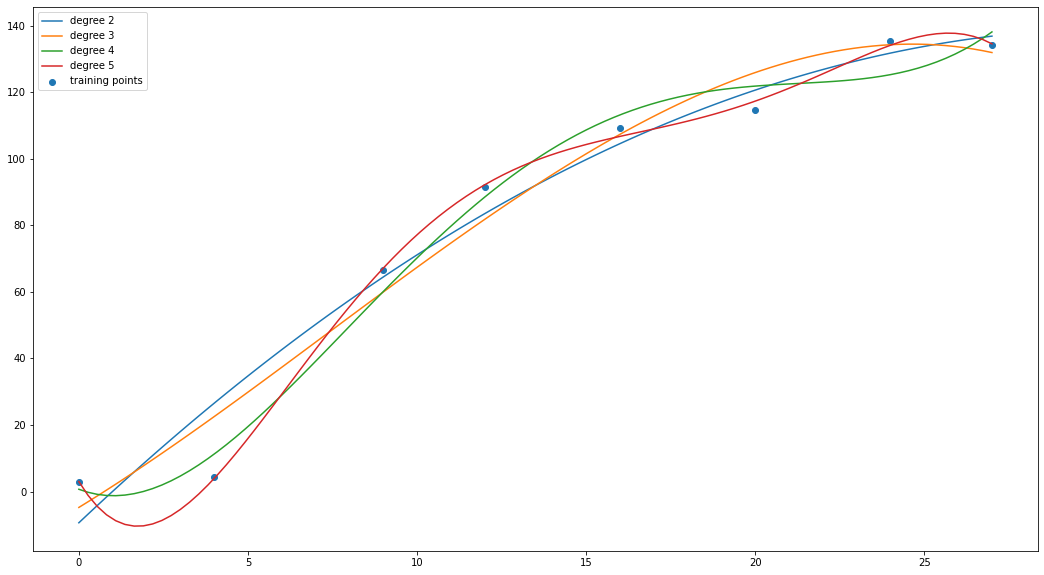

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

x = np.array([0., 4., 9., 12., 16., 20., 24., 27.])
y = np.array([2.9,4.3,66.7,91.4,109.2,114.8,135.5,134.2])

x_plot = np.linspace(0, max(x), 100)

# create matrix versions of these arrays
X = x[:, np.newaxis]            # equal to .reshape(-1,1)
X_plot = x_plot[:, np.newaxis]  # equal to .reshape(-1,1)

plt.figure(figsize=(18,10))
plt.scatter(x, y, label="training points")

for degree in np.arange(2, 6, 1):
    model = make_pipeline(PolynomialFeatures(degree), #faccio il polinomia features al degreesimo e poi plotto
                          LinearRegression())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, label="degree %d" % degree)

plt.legend(loc=2);

Il degree 5 è chiaramente overfitted, se voglio posso andare a stamparmi l'r2 score per vedere qual è il migliore tra questi.


###Pipeline Classification KBest

In [10]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

x, y = make_classification( #generatore di datapoint casuali
    n_features=22,
    n_informative=5,
    n_redundant=0,
    n_classes=4,
    n_clusters_per_class=4,
    random_state=44,
)

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=667)

anova_filter = SelectKBest(f_classif, k=3)
classifier = LogisticRegression()
pipe = Pipeline([                                 #questa è la pipeline
        ('scaler', StandardScaler()),               #standardizza i dati
        ('featureselection',anova_filter),          #seleziona le migliori
        ('classifier', classifier)                  #una volta che le hai selezionate utilizza il classifier
        ])

#training the pipeline 
pipe.fit(X_train, y_train)
# accuracy score on the test data
y_pred = pipe.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.44


###Pipeline in production

In [11]:
import pandas as pd
import numpy as npf
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

data = load_boston()
X_train, X_test, y_train, y_test = train_test_split(data['data'], #X
                                                    data['target'], #y
                                                    test_size=0.3,
                                                    random_state=667
                                                    )

In [12]:
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge

The pipeline we are going to setup is composed of the following tasks:

- Data Normalization: in this tutorial we have selected three different normalization methods, including the QuantileTransformer (check out the documentation)..
- Dimensionality Reduction: we selected Principal Component Analysis (PCA) and a univariate feature selection algorithm as possible candidates.
- Regression: we apply a simple regularized linear method, although the method is easily extendable to other learning algorithms.

In [13]:
scaler = StandardScaler()
pca = PCA()
ridge = Ridge()

In [14]:
X_train = scaler.fit_transform(X_train)
X_train = pca.fit_transform(X_train)
ridge.fit(X_train, y_train)

Ridge()

In [15]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reduce_dim', PCA()),
        ('regressor', Ridge())
        ])

In [16]:
pipe = pipe.fit(X_train, y_train)
print('Testing score: ', pipe.score(X_test, y_test))

Testing score:  -1055.397951032578


In [17]:
print(pipe.steps[1][1].explained_variance_)

[1.00283286 1.00283286 1.00283286 1.00283286 1.00283286 1.00283286
 1.00283286 1.00283286 1.00283286 1.00283286 1.00283286 1.00283286
 1.00283286]


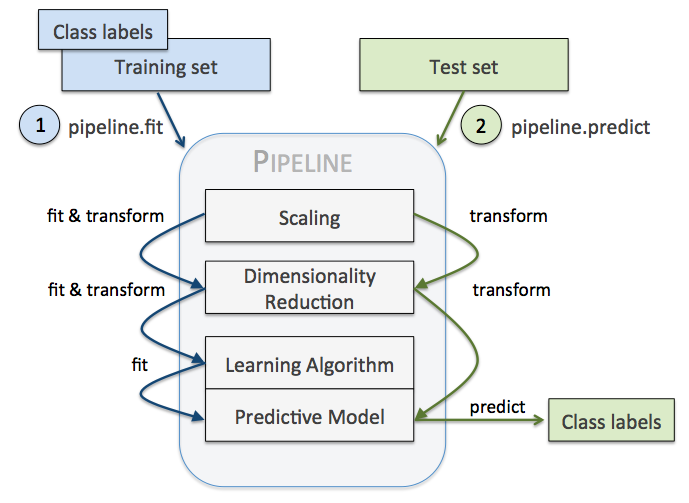

### PIPELINE TUNING (BASE VERSION)



In [18]:
import numpy as np
n_features_to_test = np.arange(1, 11)

In [19]:
alpha_to_test = 2.0**np.arange(-6, +6)

In [20]:
params = {'reduce_dim__n_components': n_features_to_test,\
              'regressor__alpha': alpha_to_test}

In [21]:
from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(pipe, params, verbose=1).fit(X_train, y_train)
print('Final score is: ', gridsearch.score(X_test, y_test))

Fitting 5 folds for each of 120 candidates, totalling 600 fits


KeyboardInterrupt: ignored

In [ ]:
gridsearch.best_params_

### PIPELINE TUNING (ADVANCED VERSION)


In [ ]:
scalers_to_test = [StandardScaler(), RobustScaler(), QuantileTransformer()]


In [ ]:
params = [
        {'scaler': scalers_to_test,
         'reduce_dim': [PCA()],
         'reduce_dim__n_components': n_features_to_test,\
         'regressor__alpha': alpha_to_test},

        {'scaler': scalers_to_test,
         'reduce_dim': [SelectKBest(f_regression)],
         'reduce_dim__k': n_features_to_test,\
         'regressor__alpha': alpha_to_test}
        ]

In [ ]:
gridsearch = GridSearchCV(pipe, params, verbose=1).fit(X_train, y_train)
print('Final score is: ', gridsearch.score(X_test, y_test))

In [ ]:
gridsearch.best_params_

###Codice per la pipeline 

####Features Importance

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score

featu=[]
for i in range(2,len(X_.columns)): #lunghezza delle colonne
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
    classifier = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=8) #utilizzando il random forest con un max depth di 8 
    pipe = Pipeline([
                    ('scaler', StandardScaler()),
                    ('featureselection',rfe),
                    ('classifier',classifier)
                    ])
    pipe.fit(X_train,y_train)
    test_y_pred = pipe.predict(X_test)
    test_acc = accuracy_score(y_test, test_y_pred)
    y_pred_proba = pipe.predict_proba(X_test)[::,1]
    roc_auc = roc_auc_score(y_test,y_pred_proba)
    featu.append(roc_auc)
    # summarize progress
    print('feature selected %d, Acc.Test: %.3f, AUC: %.3f' % (i, test_acc, roc_auc ))

print('\n Best number of feature selection is: %d' % (np.argmax(featu) +2))

####Creazione della Pipeline

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=59)
classifier = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=2)

pipe = Pipeline([
                ('scaler', StandardScaler()),
                ('featureselection',rfe),
                ('classifier',classifier)
                ])
pipe.fit(X_train,y_train)

In [ ]:
input_data = [0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339]

prediction = pipe.predict([input_data])
print(prediction[0])

### Binary Classification ###
if (prediction[0]==1):
  print('Risk')
else:
  print('No Risk')

###Salvataggio pipeline

In [ ]:
#save pipeline model
import joblib
joblib.dump(pipe,'pipe_sonar.pkl')

In [ ]:
#Load model
uploaded_model = joblib.load('pipe_sonar.pkl')

uploaded_model.predict([input_data])[0] #0 The object is a Mine

##Salvataggio del modello

In [ ]:
import joblib

In [ ]:
joblib.dump(model, 'nomedelmodello.pkl')

##NLP

###Regex- regular expression

Insieme di caratteri che definisce un pattern di ricerca, ad esempio la ricerca degli indirizzi e-mail:\
il pattern è una serie di caratteri minuscoli seguiti da una chiocciola, seguita da una serie di caratteri minuscoli, più un punto seguito da 2/3 caratteri.

Le regex sono molto comode per la data cleaning! 

###Tokenizzazione

E' un processo che ci permette di dividere la frase nei suoi componenti, chiamati Tokens.


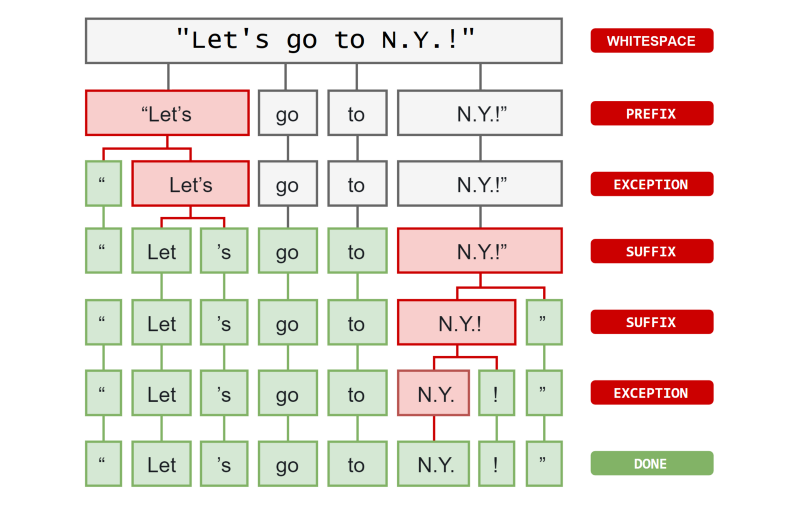

###Stop Words

Stop Words, sono le parole di uso comune che non portano nessuna informazione utile al testo. \
Ad esempio, le **congiunzioni** (e, anche, quindi, dunque, ma, o, altrimenti), avverbi (ora, prima , sempre , no, non , forse, dove, quando, come), preposizioni, pronomi.

**Le Stop Words vanno rimosse, perché sono superflue.**

###Stemming

Non viene quasi mai utilizzata

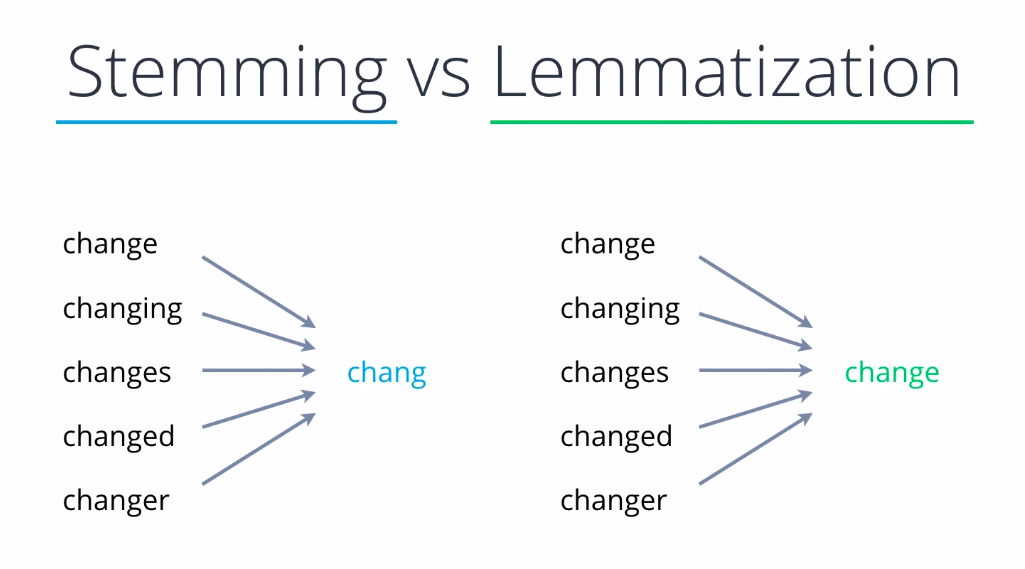

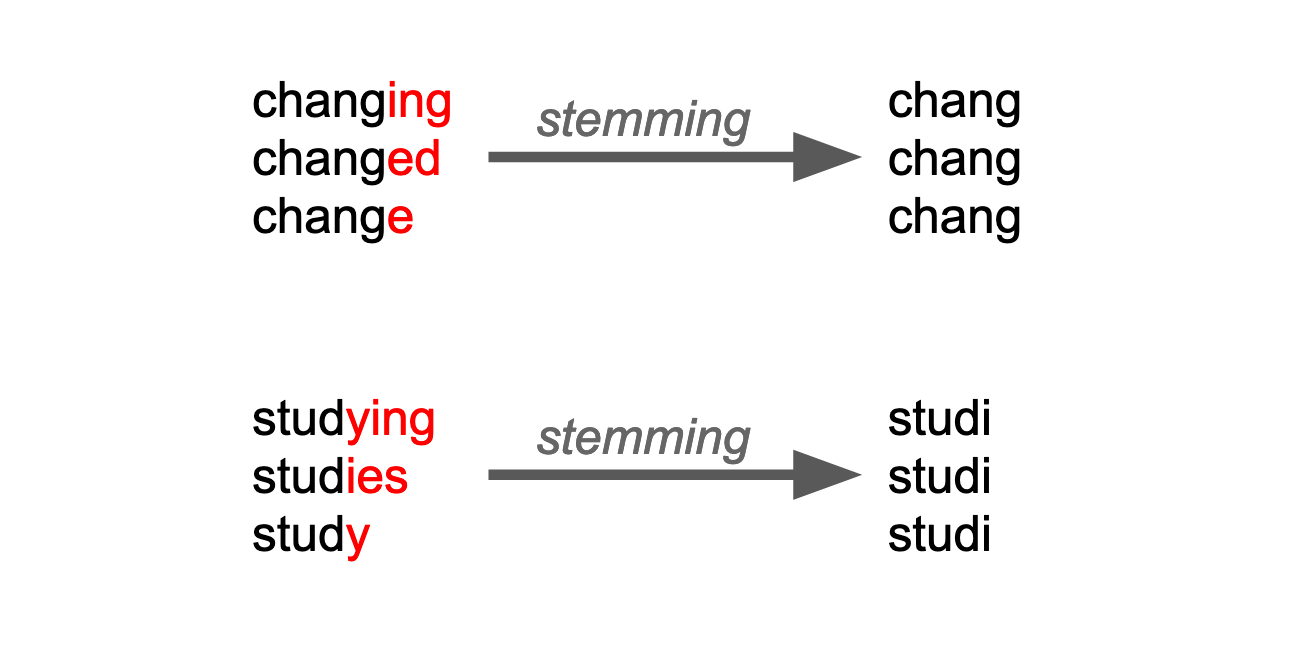

E' un processo che riduce le parole alla loro forma base.
\
La radice è fissa mentre la desinenza può variare! 

###Lemmatizzazione

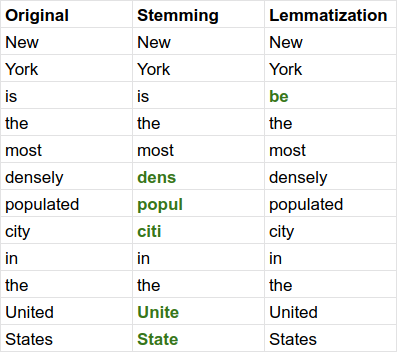

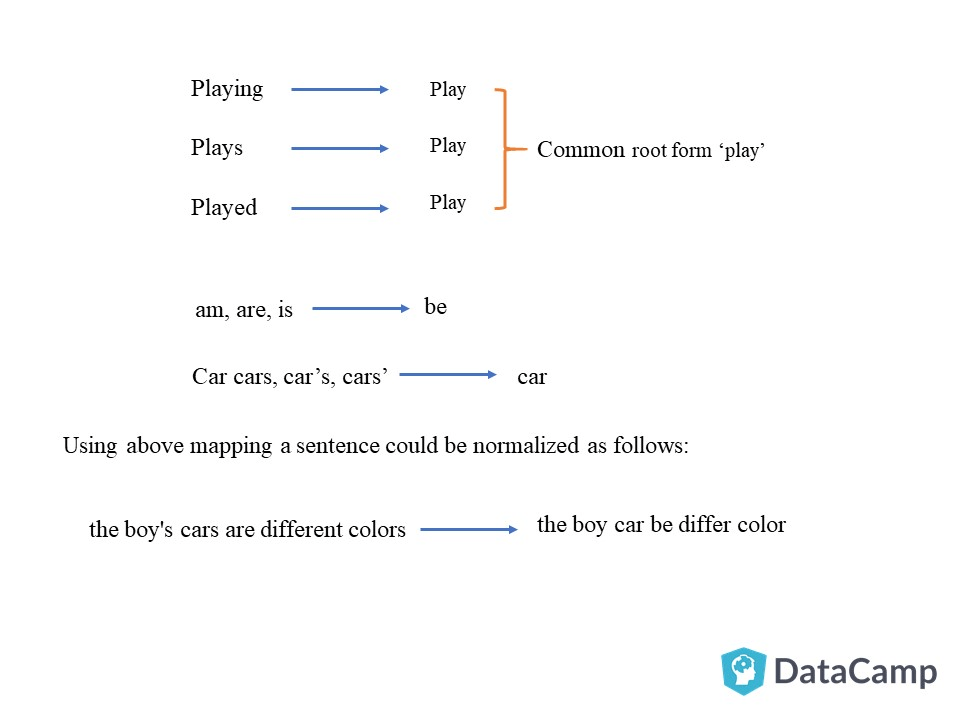

###Librerie

In Python ci sono:
* NLTK (Natural language toolkit) (la prima libreria di ml per nlp)
* spaCy

[Link di spaCy](https://spacy.io/)

###Bag of Words

Vogliamo strutturare il problema da un punto di vista matematico, e vogliamo portarlo dai token a tabellare. 

-  Tokenizzazione: prendiamo il corpus del testo e le verifichiamo con il vocabolario
-  Rimozione delle stop words
-  Lemmatizzazione (se voglio)
-  Rappresento la mia frase nella bag of words, e conto quante volte la parola si ripete, e faccio così per ogni frase

In un problema di ML normale abbiamo poche features ma pochi dati, mentre nella nlp avremo un sacco di numero di features ma non sempre un numero così alto di valori.

Così creo una **matrice sparsa**, enorme ma con pochi valori. 

In questo modo perdo l'ordine delle parole, e perdo il valore della concatenazione nel momento in cui faccio il counting.

###Frequenza (TF*IDF)

La rarità di alcuni token 

#UNSUPERVISED MACHINE LEARNING

Iper parametri: iper perché se ne cambio uno, cambio il modello in sè.

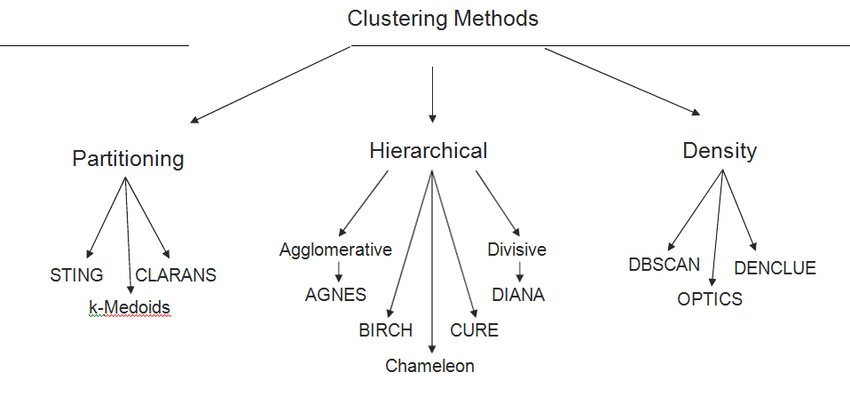

Principali tipi di clustering si differenziano per il modo:
-  **Partizione**
-  **Gerarchici**
-  **Densità** 

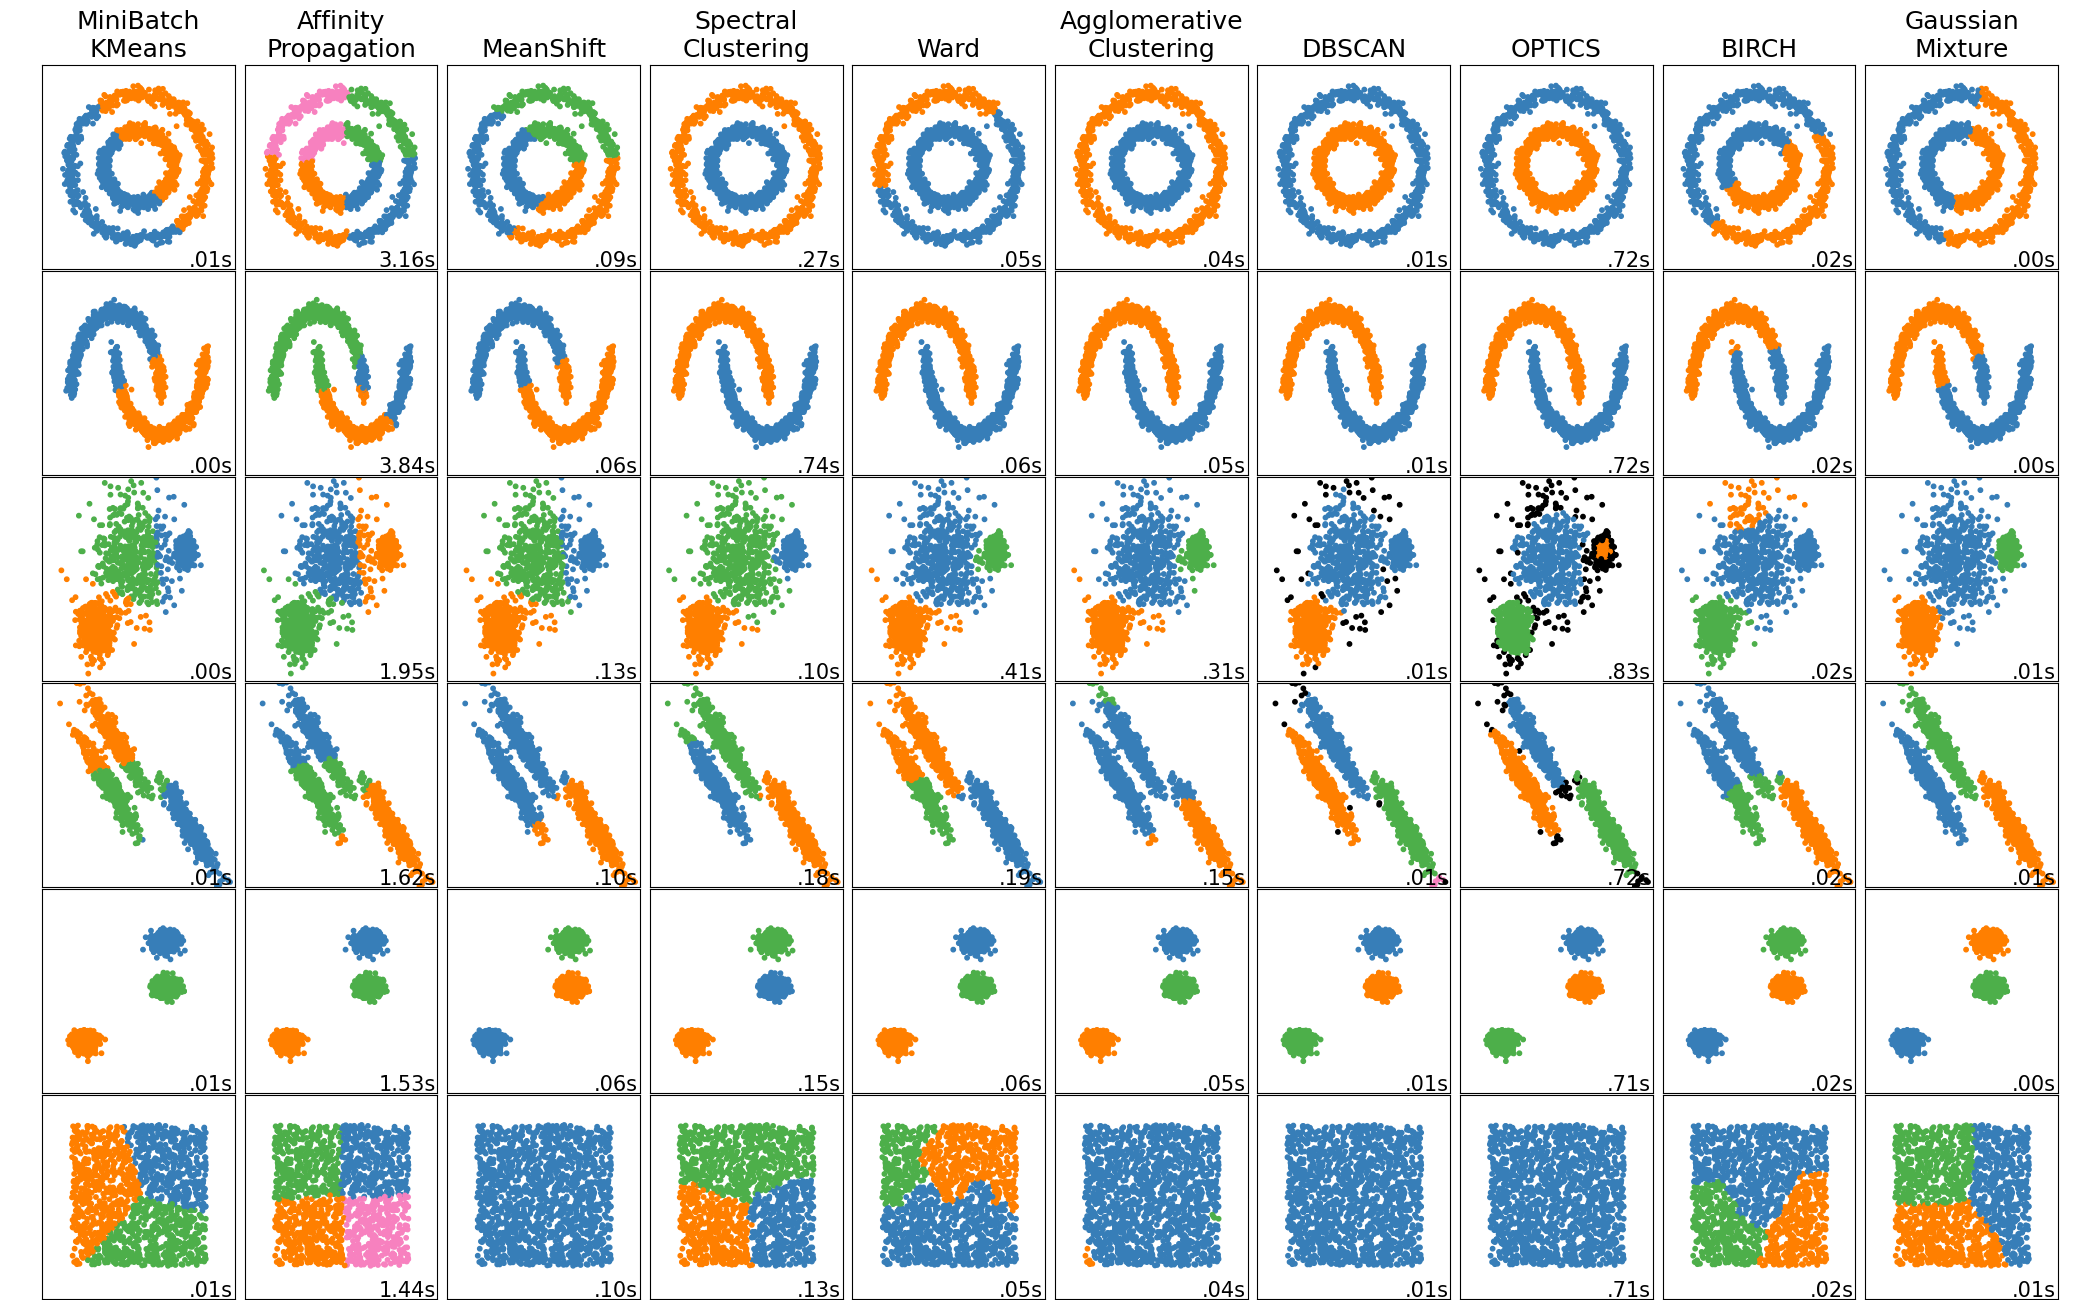

##PARTIZIONE

[Algoritmi di clustering ](https://scikit-learn.org/stable/modules/clustering.html)

* Dati messi in forma sferica
* Sono generalmente efficienti
* Funzionano bene con dataset medi grandi
* Funzionano in base alla distanza dei punti da ogni cluster

###Clustering K Means




K= numero di cluster

- dati divisi in cluster
- l'algoritmo mette dei cerchi random inizialmente
- misura la distanza di ogni punto dal centro del cerchio a cui appartiene (r2)



**Ricordati di fare prima describe e decidere se scalare!**

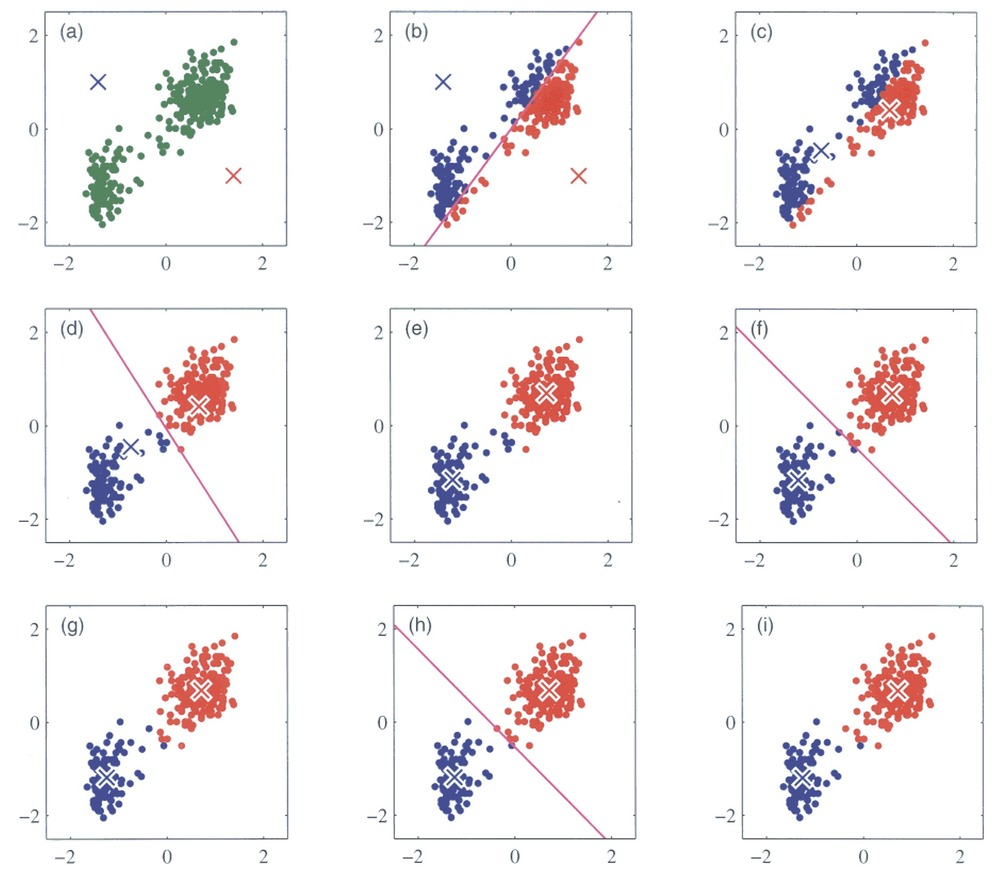

####K-MEANS

Il train_test_split per il clustering è un argomento discusso.
\
Non avendo un target in un certo senso non avremmo modo di valutare la bontà del modello, e quindi di valutare un possibile overfitting, quindi sembrerebbe non necessario. 
\
Allo stesso tempo di fatto ci troviamo sempre a valutare un algoritmo di clustering utilizzando metriche specifiche (come l'inerzia e il sihlouette score) valutate sul set di dati su cui abbiamo fittato il modello.
\
Quindi le scelte che facciamo sul modello (per esempio il numero di cluster) sono di fatto guidate da queste metriche, e possono essere soggette a overfitting. Una possibile soluzione è come sempre fare una crosso validation. 
\
Ad ogni modo per i nostri scopi attuali non ci preoccuperemo di questo e useremo tutto il set di dati.

In [ ]:
X = df[['sepal length (cm)', 'petal width (cm)']].copy()

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(random_state=22)
model.fit(X)

KMeans(random_state=22)

In [ ]:
### parametri che ha utilizzato il modello in automatico
model.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'random_state': 22,
 'tol': 0.0001,
 'verbose': 0}

In questo caso l'algoritmo individua in automatico 8 cluster, in cui centro vengono individuati in questi punti (in questo caso abbiamo 2 features, quindi i centri saranno punti in uno spazio a 2 dimensioni):

In [ ]:
### centri dei cluster
model.cluster_centers_

array([[5.01666667, 1.2       ],
       [5.97777778, 1.8       ],
       [7.475     , 2.05      ],
       [5.64      , 1.22      ],
       [6.585     , 2.205     ],
       [4.67      , 0.195     ],
       [5.23      , 0.28      ],
       [6.42916667, 1.45416667]])

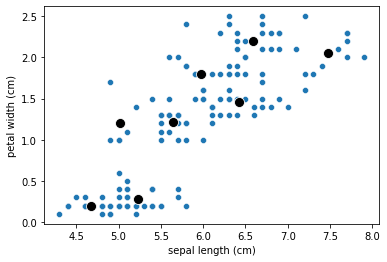

In [ ]:
sns.scatterplot(x='sepal length (cm)', y='petal width (cm)', data=X)
sns.scatterplot(x=model.cluster_centers_[:,0], y=model.cluster_centers_[:,1], color='k', s=100)
plt.show()

model.cluster_centers_[:,0]
\
[: significa prendi tutte le righe, 0 significa prendi la colonna zero]

Volendo però possiamo anche specificare il numero di cluster nell'inizializzazione del modello:
\
con n_cluster possiamo specificare il numero di parametri

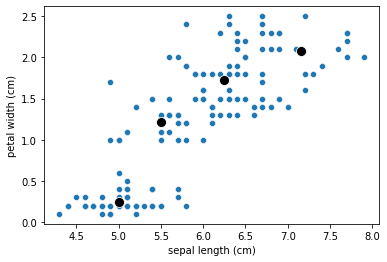

In [ ]:
model = KMeans(n_clusters=4, random_state=22) 
model.fit(X)
sns.scatterplot(x='sepal length (cm)', y='petal width (cm)', data=X)
sns.scatterplot(x=model.cluster_centers_[:,0], y=model.cluster_centers_[:,1], color='k', s=100)
plt.show()

Se voglio vedere a quali cluster il modello assegna ogni punto, mi basta fare farmi printare model.labels_ (NB. ovviamente non è detto che corrispondano a quelle di IRIS, in quanto qui non stiamo cercando di predire una specifica specie, ma di dividere le specie tra loro)

In [ ]:
print(model.labels_) #iris è particolare perché ho i dati ordinati, all'inizio l'algoritmo ha tutti i dati appartenenti ad un solo cluster, e quindi è meglio fare uno shuffling per scambiarli di posto 

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 0 2 0 1 2 1 2 1 2 1 1 2 1 2 1 2 1 1 2 1 2 2 2 2
 2 2 2 2 2 1 1 1 1 2 1 2 2 2 1 1 1 2 1 1 1 1 1 2 1 1 2 2 0 2 2 0 1 0 2 0 2
 2 0 2 2 2 2 0 0 2 0 2 0 2 0 0 2 2 2 0 0 0 2 2 2 0 2 2 2 0 0 0 2 0 0 0 2 2
 2 2]


In [ ]:
labels = pd.Series(model.labels_, index=X.index, name='labels')
labels_df = X.join(labels)
display(labels_df)

sepal length (cm)  petal width (cm)  labels
0                  5.1               0.2       3
1                  4.9               0.2       3
2                  4.7               0.2       3
3                  4.6               0.2       3
4                  5.0               0.2       3
..                 ...               ...     ...
145                6.7               2.3       0
146                6.3               1.9       2
147                6.5               2.0       2
148                6.2               2.3       2
149                5.9               1.8       2

[150 rows x 3 columns]

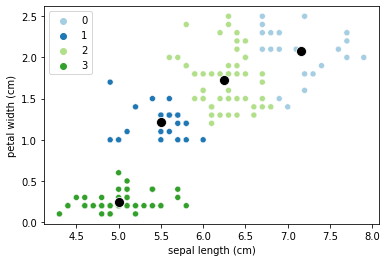

In [ ]:
sns.scatterplot(x='sepal length (cm)', y='petal width (cm)', hue='labels', data=labels_df, palette='Paired')
sns.scatterplot(x=model.cluster_centers_[:,0], y=model.cluster_centers_[:,1], color='k', s=100)
plt.show()

######METRICHE DI VALUTAZIONE

Possiamo chiederci quanto bene il nostro modello stia clusterizzando i dati. Ricordiamoci che anche se in questo in teoria caso avremmo i target (cioè sappiamo a che fiore corrisponde ogni sample), solitamente non li abbiamo a disposizione. Dobbiamo quindi usare metriche indipendenti dai target.

######INERTIA

In [ ]:
### centri dei cluster
model.inertia_ #somma della distanza di ogni punto dal proprio centro e poi fa la media

24.69231507639845

L'inerzia è una misura della 'compattezza' dei vari cluster. Si calcola sulla base delle distanze di ogni dato dal centro del suo cluster. E' da tenere in mente che all'aumentare del numero di cluster l'inertia diminuirà sempre. In generale infatti in un insieme con 2 cluster le distanze dei punti dai centri sarà più alta di come sarebbe se dividessimo l'insime con 20 cluster, in quanto i punti sarebbero mediamente più vicini ai propri centri. Si tratta qui di trovare un compromesso tra numero di cluster e inertia. In generale si usa il metodo 'elbow' (gomito), per cui si plotta l'inertia per ogni numero di cluster, e si sceglie quello in cui la linea di inerzia si piega, cominciando a scendere in modo più lento (intuitivamente significa che la compatezza dei cluster non aumenterebbe in modo significativo aumentando ancora il numero di cluster)

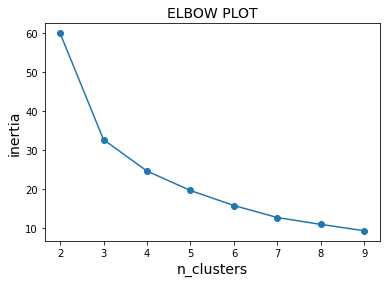

In [ ]:
inertia_list = list()
for n in range(2, 10):
    model = KMeans(n_clusters=n)
    model.fit(X)
    inertia_list += [model.inertia_]

plt.scatter(range(2, 10), inertia_list)
plt.plot(range(2, 10), inertia_list)
plt.title('ELBOW PLOT', fontsize=14)
plt.xlabel('n_clusters', fontsize=14)
plt.ylabel('inertia', fontsize=14)
plt.show()


In realta esiste una libreria molto molto comoda per valutare i modelli di clustering, e generare plot tipici come l'Elbow plot: yellobrick. Il visualizer di yellobrick funziona come un vero e proprio modello, quindi bisogna dargli un range per il parametro k e fittarlo sui dati

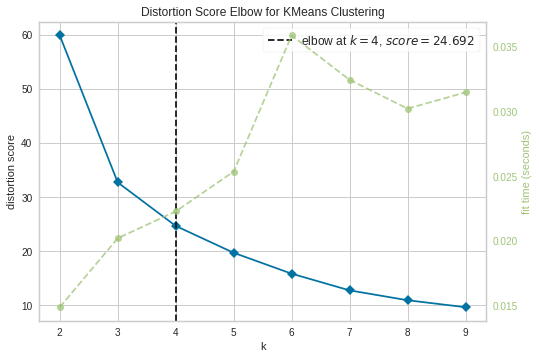

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

In questo caso individua l'elbow a k=4. Noi sappiamo già che il k giusto sarebbe 3, in quanto sappiamo che i tipi di fiori sono 3

###### SILHOUETTE SCORE

Il Silhoutte Score va da -1 a 1, dove:
1 significa che abbiamo cluster ben divisi e coerenti

*   1 significa che abbiamo cluster ben divisi e coerenti
*   0 significa che i cluster non sono ben distinguibili tra loro
*   -1 significa che abbiamo probabilmente delle mis-classificazioni

Quando il silhouette score è minore di zero è misclassified!

A differenza dell'inerzia (che usa la distanza dai centri dei cluster), è calcolato utilizzando sia la distanza **intra-cluster** (cioè la distanza di un sample dagli altri samples dello stesso cluster), sia la distanza **inter-cluster** (cioè la distanza di un sample dai cluster cui non appartiene). Quindi ci dà un informazione diversa dall'inerzia, che tiene conto anche delle relazioni tra i diversi cluster.

In [ ]:
from sklearn.metrics import silhouette_score

for n in range(2,7):

    model = KMeans(n_clusters=n)
    model.fit(X)
    labels = model.labels_
    print('Avg Sihlouette Score (k={}): {} '.format(n,silhouette_score(X, labels)))


Avg Sihlouette Score (k=2): 0.5645716498947053 
Avg Sihlouette Score (k=3): 0.5052738291206261 
Avg Sihlouette Score (k=4): 0.4634141452435154 
Avg Sihlouette Score (k=5): 0.47194733868606115 
Avg Sihlouette Score (k=6): 0.42372079782745486 


Si può generare un grafico del Silhouette Score (sempre con yellowbrick), dove ogni cluster è identificato da un colore, e la forma della figura che lo rappresenta sono gli score calcolati per ogni punto del cluster, e ordinati in modo crescente (sull'asse x ho proprio il valore degli Score). La linea tratteggiata è la media di tutti i Sihlouette Score di ogni sample ( che poi è il vero e proprio sihloutte_score sintetico che fornisce anche sklearn)


Avg Sihlouette Score:  0.5645716498947053


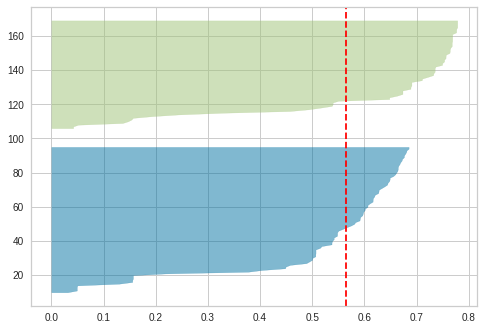


Avg Sihlouette Score:  0.5039558227584355


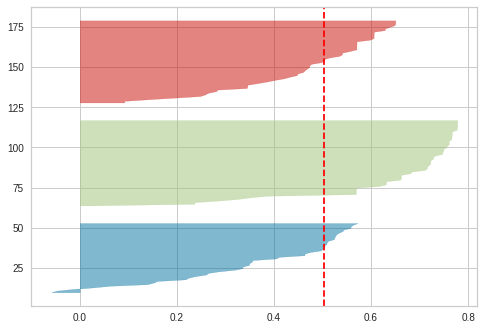


Avg Sihlouette Score:  0.4634141452435154


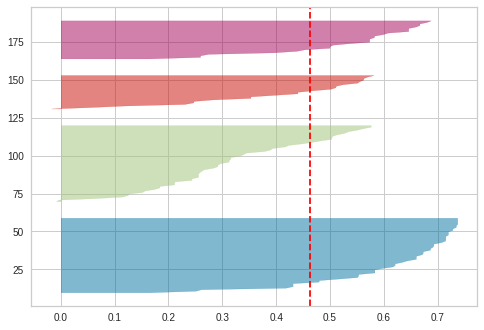


Avg Sihlouette Score:  0.47391474154300983


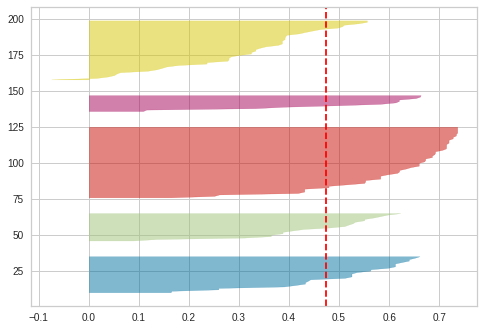


Avg Sihlouette Score:  0.42240232998321353


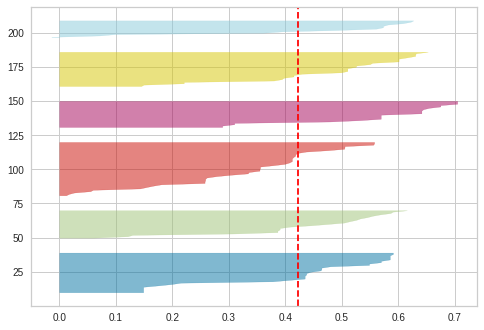

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

for n in range(2,7):

    model = KMeans(n_clusters=n)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(X)
    print('\nAvg Sihlouette Score: ', visualizer.silhouette_score_)
    plt.show()

    


Per valutare quale numero di cluster scegliere, questi plot ci possono dare qualche indicazione. 
\
**Sono da scartare quei k per i quali** :
*   c'è qualche cluster interamente sotto la linea di media
*   i cluster sono popolati molto diversamente
*   le forme dei cluster sono molto diverse
*   ci sono molti score negativi

In [ ]:
model = KMeans(n_clusters=3)
model.fit(X)
labels = model.labels_
labels = pd.Series(labels, name='labels')

sepal length (cm)  petal width (cm)  labels
0                  5.1               0.2       2
1                  4.9               0.2       2
2                  4.7               0.2       2
3                  4.6               0.2       2
4                  5.0               0.2       2
..                 ...               ...     ...
145                6.7               2.3       0
146                6.3               1.9       0
147                6.5               2.0       0
148                6.2               2.3       0
149                5.9               1.8       1

[150 rows x 3 columns]

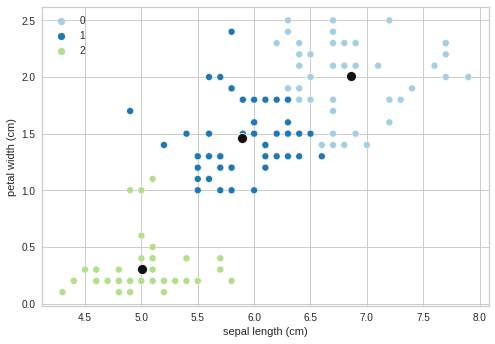

In [ ]:
labels_df = X.join(labels)
display(labels_df)

sns.scatterplot(x='sepal length (cm)', y='petal width (cm)', hue='labels', data=labels_df, palette='Paired')
sns.scatterplot(x=model.cluster_centers_[:,0], y=model.cluster_centers_[:,1], color='k', s=100)
plt.show()

######CLASSIFICATION METRICS (solo se abbiamo i target, cioè mai nella realtà)

Per confronto con classi vere:

In [ ]:
y = pd.Series(iris.target, index=X.index, name='targets')
target_df = X.join(y)

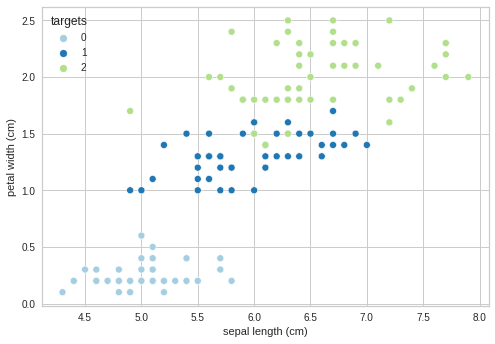

In [ ]:
sns.scatterplot(x='sepal length (cm)', y='petal width (cm)', hue='targets', data=target_df, palette='Paired')
plt.show()

In [ ]:
labels = model.labels_
labels = pd.Series(labels, name='labels')

In [ ]:
y = y.replace({0:iris.target_names[0], 1:iris.target_names[1], 2:iris.target_names[2]}) #Dovresti cercare il replace del numero dei target al nome del num del cluster
labels = labels.replace({0:iris.target_names[1], 1:iris.target_names[0], 2:iris.target_names[2]})

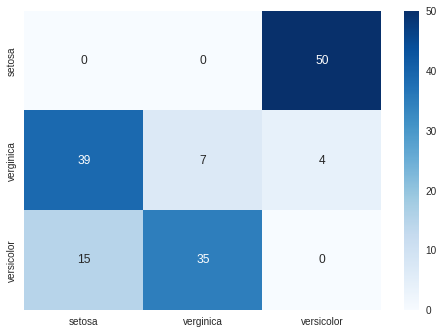

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y, labels)
labels = ['setosa','verginica','versicolor']
sns.heatmap(cm, xticklabels=labels, yticklabels=labels, annot=True, fmt=".0f", cmap='Blues');

######Tabella con tutti i parametri per cluster

In [ ]:
pd.set_option('display.max_rows',None) #per togliere il limite di righe che si vedono
df1= labels_df.groupby("labels").describe().T

In [ ]:
df1

labels                  0            1           2            3
Alcohol count   59.000000    23.000000   57.000000    39.000000
        mean    12.870000    13.860000   12.475088    13.459487
        std      0.750051     0.366246    0.632430     0.663487
        min     11.450000    13.160000   11.030000    11.960000
        25%     12.330000    13.675000   12.080000    13.050000
...                   ...          ...         ...          ...
Proline min    550.000000  1185.000000  278.000000   830.000000
        25%    611.000000  1267.500000  380.000000   882.500000
        50%    660.000000  1285.000000  450.000000  1015.000000
        75%    712.000000  1412.500000  495.000000  1062.500000
        max    795.000000  1680.000000  530.000000  1150.000000

[104 rows x 4 columns]

Prendendo solo il label 0

In [ ]:
labels_df[labels_df['labels']==0]

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
4      13.24        2.59  2.87          21.0        118           2.80   
20     14.06        1.63  2.28          16.0        126           3.00   
21     12.93        3.80  2.65          18.6        102           2.41   
39     14.22        3.99  2.51          13.2        128           3.00   
40     13.56        1.71  2.31          16.2        117           3.15   
43     13.24        3.98  2.29          17.5        103           2.64   
60     12.33        1.10  2.28          16.0        101           2.05   
62     13.67        1.25  1.92          18.0         94           2.10   
65     12.37        1.21  2.56          18.1         98           2.42   
68     13.34        0.94  2.36          17.0        110           2.53   
69     12.21        1.19  1.75          16.8        151           1.85   
78     12.33        0.99  1.95          14.8        136           1.90   
81     12.72        1.81  2.20          18.8         86           2.20   
82     12.08        1.13  2.51          24.0         78           2.00   
87     11.65        1.67  2.62          26.0         88           1.92   
88     11.64        2.06  2.46          21.6         84           1.95   
89     12.08        1.33  2.30          23.6         70           2.20   
96     11.81        2.12  2.74          21.5        134           1.60   
98     12.37        1.07  2.10          18.5         88           3.52   
100    12.08        2.08  1.70          17.5         97           2.23   
101    12.60        1.34  1.90          18.5         88           1.45   
104    12.51        1.73  1.98          20.5         85           2.20   
109    11.61        1.35  2.70          20.0         94           2.74   
110    11.46        3.74  1.82          19.5        107           3.18   
112    11.76        2.68  2.92          20.0        103           1.75   
119    12.00        3.43  2.00          19.0         87           2.00   
120    11.45        2.40  2.42          20.0         96           2.90   
129    12.04        4.30  2.38          22.0         80           2.10   
130    12.86        1.35  2.32          18.0        122           1.51   
132    12.81        2.31  2.40          24.0         98           1.15   
133    12.70        3.55  2.36          21.5        106           1.70   
134    12.51        1.24  2.25          17.5         85           2.00   
135    12.60        2.46  2.20          18.5         94           1.62   
136    12.25        4.72  2.54          21.0         89           1.38   
138    13.49        3.59  2.19          19.5         88           1.62   
139    12.84        2.96  2.61          24.0        101           2.32   
140    12.93        2.81  2.70          21.0         96           1.54   
141    13.36        2.56  2.35          20.0         89           1.40   
143    13.62        4.95  2.35          20.0         92           2.00   
147    12.87        4.61  2.48          21.5         86           1.70   
148    13.32        3.24  2.38          21.5         92           1.93   
149    13.08        3.90  2.36          21.5        113           1.41   
153    13.23        3.30  2.28          18.5         98           1.80   
154    12.58        1.29  2.10          20.0        103           1.48   
155    13.17        5.19  2.32          22.0         93           1.74   
158    14.34        1.68  2.70          25.0         98           2.80   
159    13.48        1.67  2.64          22.5         89           2.60   
161    13.69        3.26  2.54          20.0        107           1.83   
162    12.85        3.27  2.58          22.0        106           1.65   
163    12.96        3.45  2.35          18.5        106           1.39   
164    13.78        2.76  2.30          22.0         90           1.35   
166    13.45        3.70  2.60          23.0        111           1.70   
167    12.82        3.37  2.30          19.5         88           1.48   
168    13

Per la label 0 questi sono tutti i dati

In [ ]:
labels_df[labels_df['labels']==0].describe() 

Alcohol  Malic_Acid        Ash  Ash_Alcanity   Magnesium  \
count  59.000000   59.000000  59.000000     59.000000   59.000000   
mean   12.870000    2.697627   2.379322     20.240678   99.830508   
std     0.750051    1.246264   0.274703      2.714337   15.033471   
min    11.450000    0.940000   1.700000     13.200000   70.000000   
25%    12.330000    1.650000   2.280000     18.500000   89.000000   
50%    12.860000    2.580000   2.360000     20.000000   97.000000   
75%    13.425000    3.645000   2.570000     22.000000  106.000000   
max    14.340000    5.650000   2.920000     26.000000  151.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count      59.000000   59.000000             59.000000        59.000000   
mean        2.027627    1.427288              0.404237         1.434915   
std         0.537428    0.868830              0.133819         0.627805   
min         1.150000    0.470000              0.140000         0.410000   
25%         1.635000    0.690000              0.305000         0.950000   
50%         1.930000    1.200000              0.400000         1.350000   
75%         2.275000    1.885000              0.525000         1.825000   
max         3.520000    3.750000              0.630000         3.580000   

       Color_Intensity        Hue      OD280     Proline  labels  
count        59.000000  59.000000  59.000000   59.000000    59.0  
mean          5.551525   0.870508   2.270169  659.220339     0.0  
std           2.774268   0.226155   0.714759   67.832722     0.0  
min           1.280000   0.540000   1.270000  550.000000     0.0  
25%           3.285000   0.700000   1.675000  611.000000     0.0  
50%           4.920000   0.820000   2.110000  660.000000     0.0  
75%           7.625000   1.040000   2.870000  712.000000     0.0  
max          13.000000   1.360000   3.710000  795.000000     0.0

Posso farci un displot ( ho chiamato quel df come dflabel0)

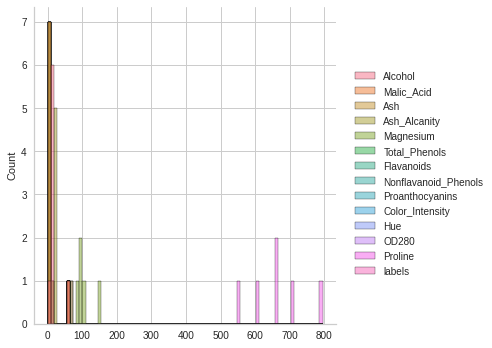

In [ ]:
sns.displot(dflabel0)

Posso fare un ciclo for

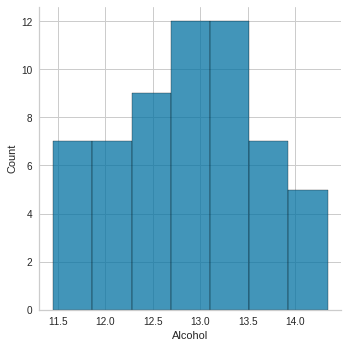

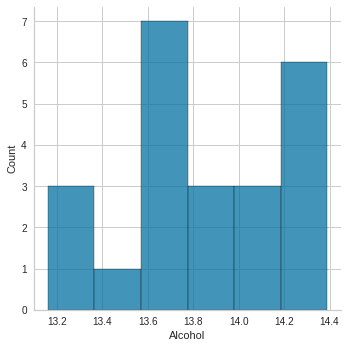

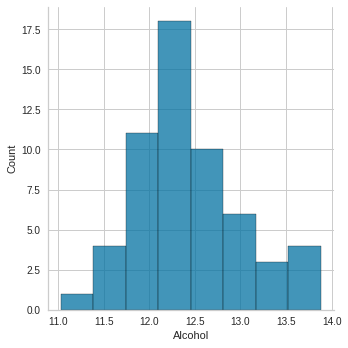

In [ ]:
for cluster in [0,1,2]:
  cond = labels_df['labels']==cluster
  new_df = labels_df[cond].copy()
  sns.displot(new_df['Alcohol'])

Posso anche fare tutto insieme con pandas:

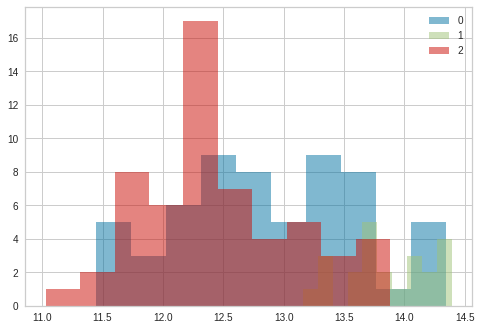

In [ ]:
for cluster in [0,1,2]:
  cond = labels_df['labels']==cluster
  new_df = labels_df[cond].copy()
  new_df['Alcohol'].hist(label=cluster, alpha=0.5)

plt.legend()

Per fare un ciclo for per ogni features per label:

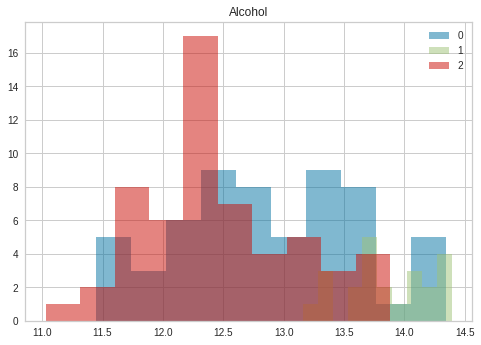

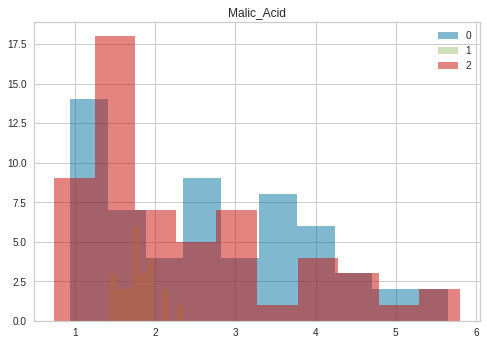

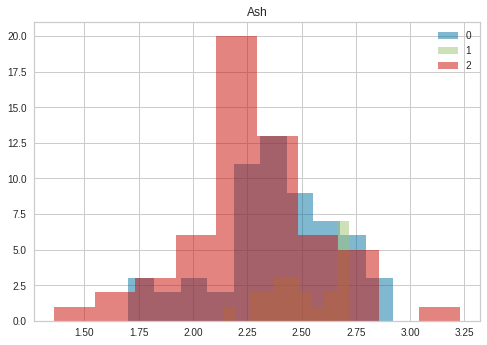

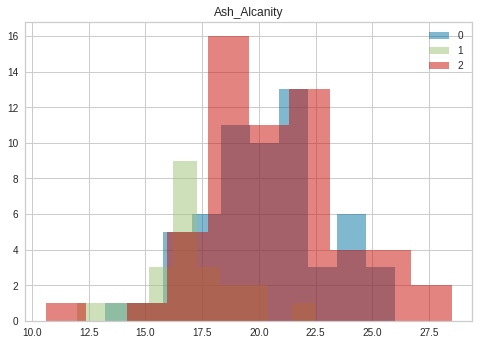

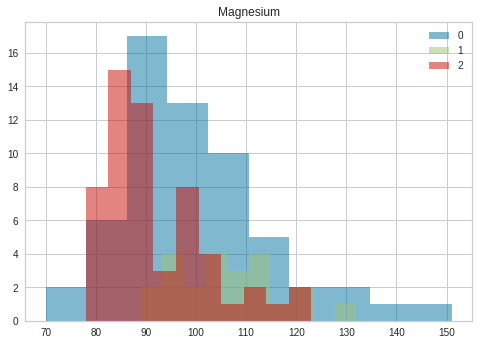

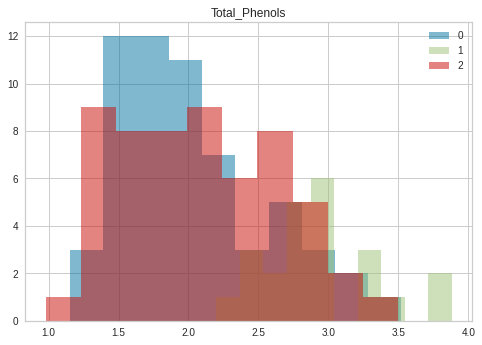

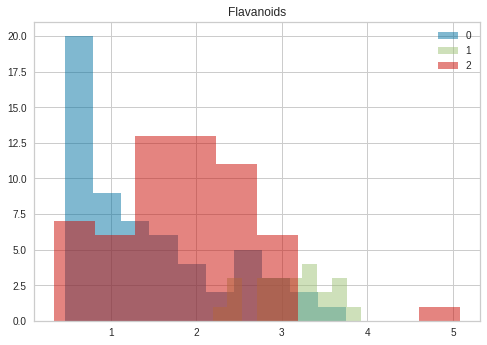

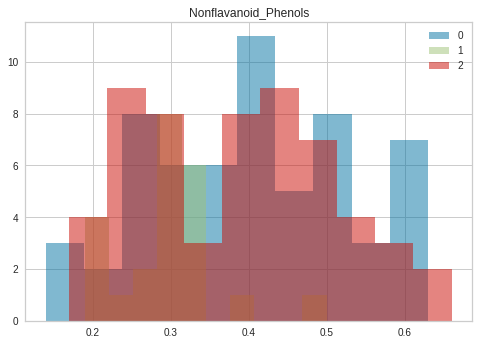

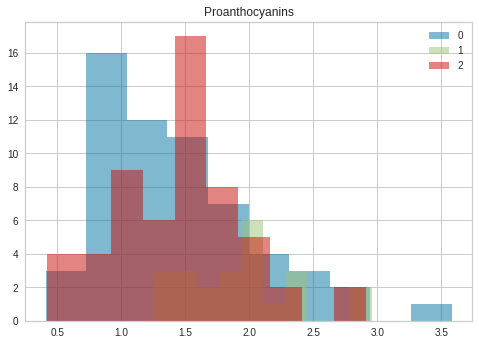

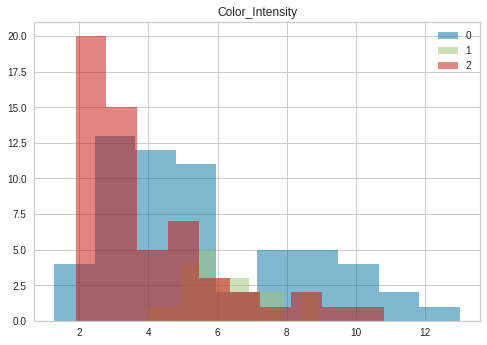

In [ ]:
for feature in labels_df.columns:
  for cluster in [0,1,2]:
    cond = labels_df['labels']==cluster
    new_df = labels_df[cond].copy()

    new_df[feature].hist(label=cluster, alpha=0.5)
  plt.legend()
  plt.title(feature)
  plt.show()

###DBSCAN

E' un algoritmo di clustering basato sulla densità, che si muove sulla distribuzione facendo un filtro. Ci sono due parametri da settare:

- numero di punti minimo (min samples)
- raggio del cerchio stesso (epsilon)

Prende il cerchio e si muove lungo i dati, delinea i punti in cui i samples possono appartenere ad un cluster oppure ad un altro.

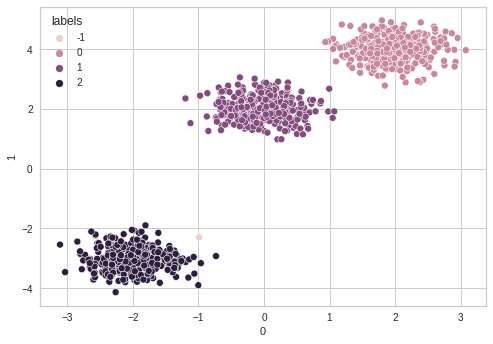

In [ ]:
from sklearn.cluster import DBSCAN

model = DBSCAN() #inizializzo
model.fit(X)
labels = model.labels_

labels = pd.Series(labels, index = X.index, name='labels') #faccio una serie con le labels

labeled_df = X.join(labels) #la unisco con le features per poter fare lo scatterplot
sns.scatterplot(x=X[0], y=X[1], data=labeled_df, hue='labels')
plt.show()

In [ ]:
labels[labels==-1] #per trovare dov'è il label nella colonna label con -1

128   -1
Name: labels, dtype: int64

In [ ]:
(labels==-1).sum() #per vedere quante ce ne sono 

1

In [ ]:
model.get_params() #per vedere i parametri

{'algorithm': 'auto',
 'eps': 0.5,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 5,
 'n_jobs': None,
 'p': None}

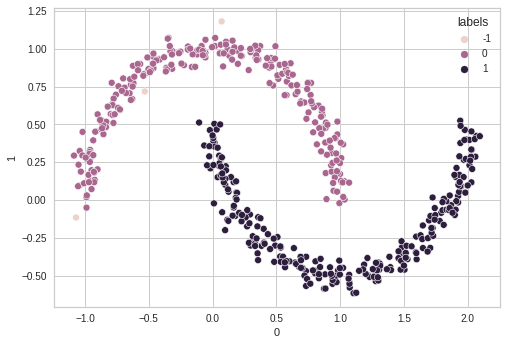

In [ ]:
#modificando i parametri:
model = DBSCAN(eps=0.1, min_samples=5)
model.fit(X)

labels = model.labels_

labels = pd.Series(labels, index = X.index, name='labels')

labeled_df = X.join(labels)
sns.scatterplot(x=X[0], y=X[1], data=labeled_df, hue='labels')
plt.show()

Minimum Samples (min_samples)
There is no automatic way to determine the MinPts value for DBSCAN. Ultimately, the MinPts value should be set using domain knowledge and familiarity with the data set. Here are a few rules of thumb for selecting the MinPts value:
- The larger the data set, the larger the value of MinPts should be
- If the data set is noisier, choose a larger value of MinPts
- Generally, MinPts should be greater than or equal to the dimensionality of the data set
- For 2-dimensional data, use DBSCAN’s default value of MinPts = 4 (Ester et al., 1996).
- If your data has more than 2 dimensions, choose MinPts = 2*dim, where dim= the dimensions of your data set (Sander et al., 1998).

Epsilon (ε)
After you select your MinPts value, you can move on to determining ε. One technique to automatically determine the optimal ε value is described in similar to the elbow method. This technique calculates the average distance between each point and its k nearest neighbors, where k = the min_samples value you selected. The average k-distances are then plotted in ascending order on a k-distance graph. You’ll find the optimal value for ε at the point of maximum curvature (i.e. where the graph has the greatest slope).

In questo caso lasciamo min_samples=4. Per trovare espilon invece usiamo la tecnica appena descritta, calcolando la distanza media con NearestNeighbors.

Text(0, 0.5, 'Distance')

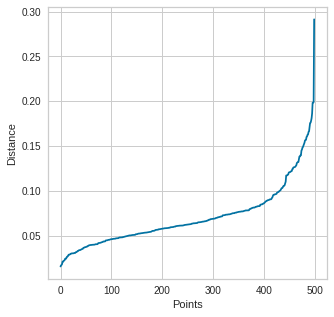

In [ ]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=4)
neighbors = nearest_neighbors.fit(X)

distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances[:,3], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

Possiamo scegliere un epsilon intorno a 0.15, dove sembra esserci un 'elbow' appunto

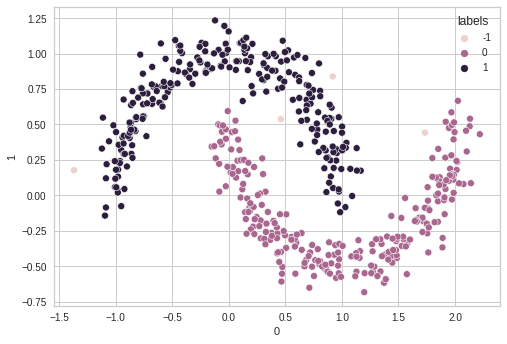

In [ ]:
model = DBSCAN(eps=0.15, min_samples=4)
model.fit(X)

labels = model.labels_

labels = pd.Series(labels, index = X.index, name='labels')

labeled_df = X.join(labels)
sns.scatterplot(x=X[0], y=X[1], data=labeled_df, hue='labels')
plt.show()

Si noti che le label -1 sono identificate da DBSCAN come rumore

In [ ]:
print('Punti identificati come rumore: ', (labels==-1).sum())

Punti identificati come rumore:  4


##GERARCHICO

*  alberi di cluster
*  sono molto intuitivi
*  funzionano con dataset piccoli
*  Esempi: agglomerative, divisive


##DENSITA'

*  generano cluster con forme di tutti i tipi
*  funzionano meglio quando i dati hanno poco "rumore" (ci sono pochi outlier)
*  esempi: DBSCAN, OPTICS